In [22]:
import pandas as pd
import json

import os
import sys
import json
import torch
import xml.etree.ElementTree as ET

from tqdm import tqdm
from torch.utils.data import Dataset
from transformers import AutoTokenizer
from dataclasses import dataclass

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

import datetime

from analyze_functions import *

로그 디렉토리

In [9]:
qwen2_5_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias/20250219_145141/result_4400.csv"
mistral_small_24b_it_log_dir = "../../logs/allsides/mistralai/Mistral-Small-24B-Instruct-2501/random_medias/20250221_124715/result_4499.csv"
phi_4_it_log_dir = "../../logs/allsides/microsoft/phi-4/random_medias/20250219_145326/result_4400.csv"
llama_3_3_70b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.3-70B-Instruct/random_medias/20250219_145234/result_4400.csv"
gemma_2_27b_it_log_dir = "../../logs/allsides/google/gemma-2-27b-it/random_medias/20250410_003055/result_4499.csv"

# hyperpartisan 
qwen2_5_72b_it_hp_log_dir = "../../logs/hyperpartisan/Qwen/Qwen2.5-72B-Instruct/hyperpartisan/20250408_232523/result_1272.csv"
mistral_small_24b_it_hp_log_dir = "../../logs/hyperpartisan/mistralai/Mistral-Small-24B-Instruct-2501/hyperpartisan/20250408_232519/result_1272.csv"
phi_4_it_hp_log_dir = "../../logs/hyperpartisan/microsoft/phi-4/hyperpartisan/20250408_232529/result_1272.csv"
llama_3_3_70b_it_hp_log_dir = "../../logs/hyperpartisan/meta-llama/Llama-3.3-70B-Instruct/hyperpartisan/20250409_033417/result_1272.csv"
gemma_2_27b_it_hp_log_dir = "../../logs/hyperpartisan/google/gemma-2-27b-it/hyperpartisan/20250411_200354/result_1272.csv"

# qwen_size    
qwen2_5_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias/20250219_145141/result_4400.csv"
qwen2_5_32b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-32B-Instruct/random_medias/20250225_190144/result_4499.csv"
qwen2_5_14b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-14B-Instruct/random_medias/20250225_190224/result_4499.csv"
qwen2_5_7b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-7B-Instruct/random_medias/20250225_194956/result_4499.csv"
qwen2_5_3b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-3B-Instruct/random_medias/20250226_175204/result_4499.csv"
qwen2_5_15b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-1.5B-Instruct/random_medias/20250226_175241/result_4499.csv"
qwen2_5_05b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-0.5B-Instruct/random_medias/20250226_232257/result_4499.csv"

# llama_size
llama_3_1_70b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.1-70B-Instruct/random_medias/20250310_223517/result_4499.csv"
llama_3_1_8b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.1-8B-Instruct/random_medias/20250411_195339/result_4499.csv"
llama_3_70b_it_log_dir = "../../logs/allsides/meta-llama/Meta-Llama-3-70B-Instruct/random_medias/20250311_150159/result_4499.csv"
llama_3_8b_it_log_dir = "../../logs/allsides/meta-llama/Meta-Llama-3-8B-Instruct/random_medias/20250412_134400/result_4499.csv"

# qwen series
qwen2_5_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias/20250219_145141/result_4400.csv"
qwen2_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen2-72B-Instruct/random_medias/20250309_025048/result_4499.csv"
qwen1_5_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen1.5-72B-Chat/random_medias/20250310_124421/result_4499.csv"
qwen_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen-72B-Chat/random_medias/20250410_015336/result_4499.csv"

# llama series
llama_3_3_70b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.3-70B-Instruct/random_medias/20250219_145234/result_4400.csv"
llama_3_1_70b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.1-70B-Instruct/random_medias/20250310_223517/result_4499.csv"
llama_3_70b_it_log_dir = "../../logs/allsides/meta-llama/Meta-Llama-3-70B-Instruct/random_medias/20250311_150159/result_4499.csv"

# it vs non it
qwen2_5_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias/20250219_145141/result_4400.csv"
qwen2_5_72b_non_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B/random_medias/20250227_115730/result_4499.csv"
qwen2_5_32b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-32B-Instruct/random_medias/20250225_190144/result_4499.csv"
qwen2_5_32b_non_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-32B/random_medias/20250228_000829/result_4499.csv"
qwen2_5_14b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-14B-Instruct/random_medias/20250225_190224/result_4499.csv"
qwen2_5_14b_non_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-14B/random_medias/20250228_000843/result_4499.csv"
qwen2_5_7b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-7B-Instruct/random_medias/20250225_194956/result_4499.csv"
qwen2_5_7b_non_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-7B/random_medias/20250304_163144/result_4499.csv"
qwen2_5_3b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-3B-Instruct/random_medias/20250226_175204/result_4499.csv"
qwen2_5_3b_non_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-3B/random_medias/20250304_163155/result_4499.csv"
qwen2_5_15b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-1.5B-Instruct/random_medias/20250226_175241/result_4499.csv"
qwen2_5_15b_non_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-1.5B/random_medias/20250304_163208/result_4499.csv"
qwen2_5_05b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-0.5B-Instruct/random_medias/20250226_232257/result_4499.csv"
qwen2_5_05b_non_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-0.5B/random_medias/20250309_024522/result_4499.csv"

llama_3_1_70b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.1-70B-Instruct/random_medias/20250310_223517/result_4499.csv"
llama_3_1_70b_non_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.1-70B/random_medias/allsides/20250504_142806/result_2550.csv"
llama_3_1_8b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.1-8B-Instruct/random_medias/20250411_195339/result_4499.csv"
llama_3_1_8b_non_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.1-8B/random_medias/allsides/20250511_151624/result_4499.csv"
mistral_small_24b_it_log_dir = "../../logs/allsides/mistralai/Mistral-Small-24B-Instruct-2501/random_medias/20250221_124715/result_4499.csv"
mistral_small_24b_non_it_log_dir = "../../logs/allsides/mistralai/Mistral-Small-24B-Base-2501/random_medias/20250309_024825/result_4499.csv"

# reasoning
qwen2_5_32b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-32B-Instruct/random_medias/20250225_190144/result_4499.csv"
qwq_32b_it_log_dir = "../../logs/allsides/Qwen/QwQ-32B/random_medias_for_summarization/20250421_003803/result_449.csv"

# synthetic
qwen2_5_72b_it_syn_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias/generated/20250429_093118/result_4499.csv"
mistral_small_24b_it_syn_log_dir = "../../logs/allsides/mistralai/Mistral-Small-24B-Instruct-2501/random_medias/generated/20250429_093221/result_4499.csv"
phi_4_it_syn_log_dir = "../../logs/allsides/microsoft/phi-4/random_medias/generated/20250502_151251/result_4499.csv"
llama_3_3_70b_it_syn_log_dir = "../../logs/allsides/meta-llama/Llama-3.3-70B-Instruct/random_medias/generated/20250430_155555/result_4499.csv"
gemma_2_27b_it_syn_log_dir = "../../logs/allsides/google/gemma-2-27b-it/random_medias/generated/20250429_093511/result_4499.csv"

In [10]:
gpt_4_1_it_log_dir = "../../logs/allsides/gpt-4.1/random_medias/allsides/20250512_160756/result_4499.csv"
gpt_4_1_mini_it_log_dir = "../../logs/allsides/gpt-4.1-mini/random_medias/allsides/20250512_160909/result_4499.csv"
gpt_4_1_nano_it_log_dir = "../../logs/allsides/gpt-4.1-nano/random_medias/allsides/20250512_160924/result_4499.csv"

gpt_4_1_it_hp_log_dir = "../../logs/hyperpartisan/gpt-4.1/hyperpartisan/allsides/20250513_090710/result_1272.csv"
gpt_4_1_mini_it_hp_log_dir = "../../logs/hyperpartisan/gpt-4.1-mini/hyperpartisan/allsides/20250513_090747/result_1272.csv"
gpt_4_1_nano_it_hp_log_dir = "../../logs/hyperpartisan/gpt-4.1-nano/hyperpartisan/allsides/20250513_090803/result_1272.csv"

In [2]:
qwen_2_5_72b_it_prompt_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias_for_summarization/allsides/20250519_055459/result_449.csv"

로그 파일 로드

In [11]:
qwen_2_5_72b_it_result_dict = load_log_file("../" + qwen2_5_72b_it_log_dir)
print("qwen_2_5_72b_it_result_dict")
mistral_small_24b_it_result_dict = load_log_file("../" + mistral_small_24b_it_log_dir)
print("mistral_small_24b_it_result_dict")
phi_4_it_result_dict = load_log_file("../" + phi_4_it_log_dir)
print("phi_4_it_result_dict")
llama_3_3_70b_it_result_dict = load_log_file("../" + llama_3_3_70b_it_log_dir)
print("llama_3_3_70b_it_result_dict")
gemma_2_27b_it_result_dict = load_log_file("../" + gemma_2_27b_it_log_dir)
print("gemma_2_27b_it_result_dict")

qwen_2_5_72b_it_hp_result_dict = load_log_file("../" + qwen2_5_72b_it_hp_log_dir)
print("qwen_2_5_72b_it_hp_result_dict")
mistral_small_24b_it_hp_result_dict = load_log_file("../" + mistral_small_24b_it_hp_log_dir)
print("mistral_small_24b_it_hp_result_dict")
phi_4_it_hp_result_dict = load_log_file("../" + phi_4_it_hp_log_dir)
print("phi_4_it_hp_result_dict")
llama_3_3_70b_it_hp_result_dict = load_log_file("../" + llama_3_3_70b_it_hp_log_dir)
print("llama_3_3_70b_it_hp_result_dict")
gemma_2_27b_it_hp_result_dict = load_log_file("../" + gemma_2_27b_it_hp_log_dir)
print("gemma_2_27b_it_hp_result_dict")

qwen_2_5_32b_it_result_dict = load_log_file("../" + qwen2_5_32b_it_log_dir)
print("qwen_2_5_32b_it_result_dict")
qwen_2_5_14b_it_result_dict = load_log_file("../" + qwen2_5_14b_it_log_dir)
print("qwen_2_5_14b_it_result_dict")
qwen_2_5_7b_it_result_dict = load_log_file("../" + qwen2_5_7b_it_log_dir)
print("qwen_2_5_7b_it_result_dict")
qwen_2_5_3b_it_result_dict = load_log_file("../" + qwen2_5_3b_it_log_dir)
print("qwen_2_5_3b_it_result_dict")
qwen_2_5_15b_it_result_dict = load_log_file("../" + qwen2_5_15b_it_log_dir)
print("qwen_2_5_15b_it_result_dict")
qwen_2_5_05b_it_result_dict = load_log_file("../" + qwen2_5_05b_it_log_dir)
print("qwen_2_5_05b_it_result_dict")

llama_3_1_70b_it_result_dict = load_log_file("../" + llama_3_1_70b_it_log_dir)
print("llama_3_1_70b_it_result_dict")
llama_3_1_8b_it_result_dict = load_log_file("../" + llama_3_1_8b_it_log_dir)
print("llama_3_1_8b_it_result_dict")
llama_3_70b_it_result_dict = load_log_file("../" + llama_3_70b_it_log_dir)
print("llama_3_70b_it_result_dict")
llama_3_8b_it_result_dict = load_log_file("../" + llama_3_8b_it_log_dir)
print("llama_3_8b_it_result_dict")

qwen_2_72b_it_result_dict = load_log_file("../" + qwen2_72b_it_log_dir)
print("qwen_2_72b_it_result_dict")
qwen_1_5_72b_it_result_dict = load_log_file("../" + qwen1_5_72b_it_log_dir)
print("qwen_1_5_72b_it_result_dict")
qwen_72b_it_result_dict = load_log_file("../" + qwen_72b_it_log_dir)
print("qwen_72b_it_result_dict")

qwen_2_5_72b_non_it_result_dict = load_log_file("../" + qwen2_5_72b_non_it_log_dir)
print("qwen_2_5_72b_non_it_result_dict")
qwen_2_5_32b_non_it_result_dict = load_log_file("../" + qwen2_5_32b_non_it_log_dir)
print("qwen_2_5_32b_non_it_result_dict")
qwen_2_5_14b_non_it_result_dict = load_log_file("../" + qwen2_5_14b_non_it_log_dir)
print("qwen_2_5_14b_non_it_result_dict")
qwen_2_5_7b_non_it_result_dict = load_log_file("../" + qwen2_5_7b_non_it_log_dir)
print("qwen_2_5_7b_non_it_result_dict")
qwen_2_5_3b_non_it_result_dict = load_log_file("../" + qwen2_5_3b_non_it_log_dir)
print("qwen_2_5_3b_non_it_result_dict")
qwen_2_5_15b_non_it_result_dict = load_log_file("../" + qwen2_5_15b_non_it_log_dir)
print("qwen_2_5_15b_non_it_result_dict")
qwen_2_5_05b_non_it_result_dict = load_log_file("../" + qwen2_5_05b_non_it_log_dir)
print("qwen_2_5_05b_non_it_result_dict")

llama_3_1_70b_non_it_result_dict = load_log_file("../" + llama_3_1_70b_non_it_log_dir)
print("llama_3_1_70b_non_it_result_dict")
llama_3_1_8b_non_it_result_dict = load_log_file("../" + llama_3_1_8b_non_it_log_dir)
print("llama_3_1_8b_non_it_result_dict")
mistral_small_24b_non_it_result_dict = load_log_file("../" + mistral_small_24b_non_it_log_dir)
print("mistral_small_24b_non_it_result_dict")

qwq_32b_it_result_dict = load_log_file("../" + qwq_32b_it_log_dir)
print("qwq_32b_it_result_dict")


qwen_2_5_72b_it_result_dict
mistral_small_24b_it_result_dict
phi_4_it_result_dict
llama_3_3_70b_it_result_dict
gemma_2_27b_it_result_dict
qwen_2_5_72b_it_hp_result_dict
mistral_small_24b_it_hp_result_dict
phi_4_it_hp_result_dict
llama_3_3_70b_it_hp_result_dict
gemma_2_27b_it_hp_result_dict
qwen_2_5_32b_it_result_dict
qwen_2_5_14b_it_result_dict
qwen_2_5_7b_it_result_dict
qwen_2_5_3b_it_result_dict
qwen_2_5_15b_it_result_dict
qwen_2_5_05b_it_result_dict
llama_3_1_70b_it_result_dict
llama_3_1_8b_it_result_dict
llama_3_70b_it_result_dict
llama_3_8b_it_result_dict
qwen_2_72b_it_result_dict
qwen_1_5_72b_it_result_dict
qwen_72b_it_result_dict
qwen_2_5_72b_non_it_result_dict
qwen_2_5_32b_non_it_result_dict
qwen_2_5_14b_non_it_result_dict
qwen_2_5_7b_non_it_result_dict
qwen_2_5_3b_non_it_result_dict
qwen_2_5_15b_non_it_result_dict
qwen_2_5_05b_non_it_result_dict
llama_3_1_70b_non_it_result_dict
llama_3_1_8b_non_it_result_dict
mistral_small_24b_non_it_result_dict
qwq_32b_it_result_dict


In [12]:
gpt_4_1_it_result_dict = load_log_file("../" + gpt_4_1_it_log_dir)
print("gpt_4_1_it_result_dict")
gpt_4_1_mini_it_result_dict = load_log_file("../" + gpt_4_1_mini_it_log_dir)
print("gpt_4_1_mini_it_result_dict")
gpt_4_1_nano_it_result_dict = load_log_file("../" + gpt_4_1_nano_it_log_dir)
print("gpt_4_1_nano_it_result_dict")

gpt_4_1_it_hp_result_dict = load_log_file("../" + gpt_4_1_it_hp_log_dir)
print("gpt_4_1_it_hp_result_dict")
gpt_4_1_mini_it_hp_result_dict = load_log_file("../" + gpt_4_1_mini_it_hp_log_dir)
print("gpt_4_1_mini_it_hp_result_dict")
gpt_4_1_nano_it_hp_result_dict = load_log_file("../" + gpt_4_1_nano_it_hp_log_dir)
print("gpt_4_1_nano_it_hp_result_dict")

gpt_4_1_it_result_dict
gpt_4_1_mini_it_result_dict
gpt_4_1_nano_it_result_dict
gpt_4_1_it_hp_result_dict
gpt_4_1_mini_it_hp_result_dict
gpt_4_1_nano_it_hp_result_dict


In [ ]:
qwen_2_5_72b_it_prompt_result_dict = load_log_file("../" + qwen_2_5_72b_it_prompt_log_dir)
print("qwen_2_5_72b_it_prompt_result_dict")

qwen_2_5_72b_it_prompt_result_dict


In [13]:
all_models = {
    "Qwen2.5-72B-IT": qwen_2_5_72b_it_result_dict,
    "Mistral-Small-24B-IT": mistral_small_24b_it_result_dict,
    "Phi-4-IT": phi_4_it_result_dict,
    "Llama-3.3-70B-IT": llama_3_3_70b_it_result_dict,
    "Gemma-2-27B-IT": gemma_2_27b_it_result_dict,
    "GPT-4.1-IT": gpt_4_1_it_result_dict,
    
    "Qwen2.5-72B-IT-HP": qwen_2_5_72b_it_hp_result_dict,
    "Mistral-Small-24B-IT-HP": mistral_small_24b_it_hp_result_dict,
    "Phi-4-IT-HP": phi_4_it_hp_result_dict,
    "Llama-3.3-70B-IT-HP": llama_3_3_70b_it_hp_result_dict,
    "Gemma-2-27B-IT-HP": gemma_2_27b_it_hp_result_dict,
    "GPT-4.1-IT-HP": gpt_4_1_it_hp_result_dict,
    
    "Qwen2.5-72B-IT": qwen_2_5_72b_it_result_dict,
    "Qwen2.5-32B-IT": qwen_2_5_32b_it_result_dict,
    "Qwen2.5-14B-IT": qwen_2_5_14b_it_result_dict,
    "Qwen2.5-7B-IT": qwen_2_5_7b_it_result_dict,
    "Qwen2.5-3B-IT": qwen_2_5_3b_it_result_dict,
    "Qwen2.5-1.5B-IT": qwen_2_5_15b_it_result_dict,
    "Qwen2.5-0.5B-IT": qwen_2_5_05b_it_result_dict,
    
    "Llama-3.1-70B-IT": llama_3_1_70b_it_result_dict,
    "Llama-3.1-8B-IT": llama_3_1_8b_it_result_dict,
    "Llama-3-70B-IT": llama_3_70b_it_result_dict,
    "Llama-3-8B-IT": llama_3_8b_it_result_dict,
    
    "GPT-4.1-IT": gpt_4_1_it_result_dict,
    "GPT-4.1-mini-IT": gpt_4_1_mini_it_result_dict,
    "GPT-4.1-nano-IT": gpt_4_1_nano_it_result_dict,
    
    "Qwen2.5-72B-IT": qwen_2_5_72b_it_result_dict,
    "Qwen2-72B-IT": qwen_2_72b_it_result_dict,
    "Qwen1.5-72B-IT": qwen_1_5_72b_it_result_dict,
    "Qwen1-72B-IT": qwen_72b_it_result_dict,
    
    "Llama-3.3-70B-IT": llama_3_3_70b_it_result_dict,
    "Llama-3.1-70B-IT": llama_3_1_70b_it_result_dict,
    "Llama-3-70B-IT": llama_3_70b_it_result_dict,
    
    "Qwen2.5-72B-Base": qwen_2_5_72b_non_it_result_dict,
    "Qwen2.5-32B-Base": qwen_2_5_32b_non_it_result_dict,
    "Qwen2.5-14B-Base": qwen_2_5_14b_non_it_result_dict,
    "Qwen2.5-7B-Base": qwen_2_5_7b_non_it_result_dict,
    "Qwen2.5-3B-Base": qwen_2_5_3b_non_it_result_dict,
    "Qwen2.5-1.5B-Base": qwen_2_5_15b_non_it_result_dict,
    "Qwen2.5-0.5B-Base": qwen_2_5_05b_non_it_result_dict,
    
    "Llama-3.1-70B-Base": llama_3_1_70b_non_it_result_dict,
    "Llama-3.1-8B-Base": llama_3_1_8b_non_it_result_dict,
    "Mistral-Small-24B-Base": mistral_small_24b_non_it_result_dict,
    
    "QwQ-32B-IT": qwq_32b_it_result_dict,
}

In [4]:
all_models = {
    "Qwen2.5-72B-IT": qwen_2_5_72b_it_prompt_result_dict,
}

In [14]:
allsides_dataset_dir = "../../../data/allsides/Article-Bias-Prediction/data/custom-split/random_medias.json"
hyperpartisan_dataset_dir = "../../../data/hyperpartisan"

# ------------------------------------------------------
# AllSides
# ------------------------------------------------------

allsides_dataset = json.load(open(allsides_dataset_dir, "r"))
allsides_dataset_dict = {}
for data in tqdm(allsides_dataset, desc="Processing allsides dataset"):
    topic = data['topic']
    source = data['source']
    bias_text = data['bias_text']
    title = data['title']
    date = data['date']
    content = data['content']
    id = data['ID']
    
    allsides_dataset_dict[str(id)] = {
        'topic': topic,
        'source': source,
        'bias_text': bias_text,
        'title': title,
        'date': date,
        'content': content
    }
    
# ------------------------------------------------------
# Hyperpartisan
# ------------------------------------------------------

def load_xml_articles(path):
    tree = ET.parse(path)
    root = tree.getroot()

    articles = []
    for article in root.findall('article'):
        article_id = article.get('id')
        published_at = article.get('published-at')
        title = article.get('title')
        content = ''.join(article.itertext()).strip()   
        
        articles.append({
            'id': article_id,
            'published_at': published_at,
            'title': title,
            'content': content
        })
    return articles

def load_xml_labels(path):
    # XML 파일 로드
    tree = ET.parse(path)  # 파일 경로에 맞게 수정
    root = tree.getroot()

    articles = []
    for article in root.findall('article'):
        articles.append({
            'id': article.get('id'),
            'url': article.get('url'),
            'hyperpartisan': article.get('hyperpartisan'),
            'labeled_by': article.get('labeled-by')
        })
    return articles

hyperpartisan_articles_training_path = os.path.join(hyperpartisan_dataset_dir, "articles-training-byarticle-20181122.xml")
hyperpartisan_articles_test_path = os.path.join(hyperpartisan_dataset_dir, "articles-test-byarticle-20181207.xml")
hyperpartisan_labels_training_path = os.path.join(hyperpartisan_dataset_dir, "ground-truth-training-byarticle-20181122.xml")
hyperpartisan_labels_test_path = os.path.join(hyperpartisan_dataset_dir, "ground-truth-test-byarticle-20181207.xml")

hyperpartisan_articles_training = load_xml_articles(hyperpartisan_articles_training_path)
hyperpartisan_articles_test = load_xml_articles(hyperpartisan_articles_test_path)
hyperpartisan_labels_training = load_xml_labels(hyperpartisan_labels_training_path)
hyperpartisan_labels_test = load_xml_labels(hyperpartisan_labels_test_path)

hyperpartisan_dataset_dict = {}
    
for article in tqdm(hyperpartisan_articles_training, desc="Preprocessing training data"):
    id = article['id']
    published_at = article['published_at']
    title = article['title']
    content = article['content']
    
    corresponding_label = next((label for label in hyperpartisan_labels_training if label['id'] == id), None)
    if corresponding_label is None:
        print(f"No corresponding label found for article {id}")
        continue
    
    url = corresponding_label['url']
    news_name = url.replace("https://", "").replace("http://", "").replace("www.", "").split("/")[0]
    hyperpartisan = corresponding_label['hyperpartisan']
    
    hyperpartisan_dataset_dict[str(id)] = {
        'topic': "hyperpartisan",
        'source': news_name,
        'bias_text': "Hyperpartisan" if hyperpartisan == "true" else "Non-hyperpartisan",
        'title': title,
        'date': published_at,
        'content': content
    }

for article in tqdm(hyperpartisan_articles_test, desc="Preprocessing test data"):
    id = article['id']
    published_at = article['published_at']
    title = article['title']
    content = article['content']
    
    corresponding_label = next((label for label in hyperpartisan_labels_test if label['id'] == id), None)
    if corresponding_label is None:
        print(f"No corresponding label found for article {id}")
        continue
    
    url = corresponding_label['url']    
    news_name = url.replace("https://", "").replace("http://", "").replace("www.", "").split("/")[0]
    hyperpartisan = corresponding_label['hyperpartisan']
    
    if title is None:
        print(f"No title found for article {id}")
        title = ""
        
    if content is None:
        print(f"No content found for article {id}")
        continue
    
    if published_at is None:
        print(f"No date found for article {id}")
        published_at = ""
    
    hyperpartisan_dataset_dict[str(id)] = {
        'topic': "hyperpartisan",
        'source': news_name,
        'bias_text': "Hyperpartisan" if hyperpartisan == "true" else "Non-hyperpartisan",
        'title': title,
        'date': published_at,
        'content': content
    }

Preprocessing test data: 100%|██████████| 628/628 [00:00<00:00, 61952.23it/s]

No date found for article 0000739
No date found for article 0000767
No date found for article 0000768
No date found for article 0000769
No date found for article 0000770
No date found for article 0000772
No date found for article 0000773
No date found for article 0000774
No date found for article 0000777
No date found for article 0000778
No date found for article 0000780
No date found for article 0000781
No date found for article 0000782
No date found for article 0000784
No date found for article 0000789
No date found for article 0000790
No date found for article 0000791
No date found for article 0000794
No date found for article 0000876
No date found for article 0000888
No date found for article 0000924
No date found for article 0000962
No date found for article 0000976
No date found for article 0000987
No date found for article 0001040
No date found for article 0001089
No date found for article 0001101
No date found for article 0001102
No date found for article 0001107
No date found 

In [15]:
# left ~ right 가면서 영향을 안받은 케이스, 받은 케이스 id 추출하기

bias_list = ["left", "center", "right", "all"]

bias_unaffected_id_dict = {}
bias_affected_id_dict = {}
bias_reversly_affected_id_dict = {}

for model_name, model_result_dict in all_models.items():
    print(f"Processing {model_name}...")
    bias_unaffected_id_dict[model_name] = {}
    bias_affected_id_dict[model_name] = {}
    bias_reversly_affected_id_dict[model_name] = {}
    for bias in bias_list:
        bias_unaffected_id_dict[model_name][bias] = []
        bias_affected_id_dict[model_name][bias] = []
        bias_reversly_affected_id_dict[model_name][bias] = []
        for id, result in model_result_dict.items():
            if bias == "all":
                if result["left_diff"] == 0 and result["lean_left_diff"] == 0 and result["center_diff"] == 0 and result["lean_right_diff"] == 0 and result["right_diff"] == 0:
                    bias_unaffected_id_dict[model_name][bias].append(id)
                if result["left_diff"] < 0 and result["lean_left_diff"] < 0 and result["lean_right_diff"] > 0 and result["right_diff"] > 0:
                    bias_affected_id_dict[model_name][bias].append(id)
                if result["left_diff"] > 0 and result["lean_left_diff"] > 0 and result["lean_right_diff"] < 0 and result["right_diff"] < 0:
                    bias_reversly_affected_id_dict[model_name][bias].append(id)
            else:
                if result[bias + "_diff"] == 0:
                    bias_unaffected_id_dict[model_name][bias].append(id)
                else:
                    if bias in ['left', 'lean_left']:
                        if result[bias + "_diff"] < 0:
                            bias_affected_id_dict[model_name][bias].append(id)
                        elif result[bias + "_diff"] > 0:
                            bias_reversly_affected_id_dict[model_name][bias].append(id)
                    if bias in ['right', 'lean_right']:
                        if result[bias + "_diff"] > 0:
                            bias_affected_id_dict[model_name][bias].append(id)
                        elif result[bias + "_diff"] < 0:
                            bias_reversly_affected_id_dict[model_name][bias].append(id)
                    if bias == "center":
                        if (result["center_diff"] > 0 and result["none_value"] < 0) or (result["center_diff"] < 0 and result["none_value"] > 0):
                            bias_affected_id_dict[model_name][bias].append(id)
                        elif (result["center_diff"] > 0 and result["none_value"] > 0) or (result["center_diff"] < 0 and result["none_value"] < 0):
                            bias_reversly_affected_id_dict[model_name][bias].append(id)
                        elif result["none_value"] == 0:
                            if result["center_diff"] > 0 or result["center_diff"] < 0:
                                bias_reversly_affected_id_dict[model_name][bias].append(id)
                        else:
                            print(result["center_diff"], result["none_value"])
                            print("*" * 100)

Processing Qwen2.5-72B-IT...
Processing Mistral-Small-24B-IT...
Processing Phi-4-IT...
Processing Llama-3.3-70B-IT...
Processing Gemma-2-27B-IT...
nan nan
****************************************************************************************************
nan nan
****************************************************************************************************
nan nan
****************************************************************************************************
nan nan
****************************************************************************************************
nan 2.0
****************************************************************************************************
Processing GPT-4.1-IT...
Processing Qwen2.5-72B-IT-HP...
Processing Mistral-Small-24B-IT-HP...
Processing Phi-4-IT-HP...
Processing Llama-3.3-70B-IT-HP...
Processing Gemma-2-27B-IT-HP...
Processing GPT-4.1-IT-HP...
Processing Qwen2.5-32B-IT...
Processing Qwen2.5-14B-IT...
Processing Qwen2.5-7B-IT...
Process

In [16]:
result_list = []

for model_name, model_result_dict in all_models.items():
    for bias in bias_list:
        result_list.append({
            "model": model_name,
            "bias": bias,
            "affected": len(bias_affected_id_dict[model_name][bias]),
            "unaffected": len(bias_unaffected_id_dict[model_name][bias]),
            "reversly_affected": len(bias_reversly_affected_id_dict[model_name][bias])
        })
        
result_df = pd.DataFrame(result_list)
        
# result_df.to_csv("../analyze_result/affected_result_df.csv", index=False)

In [17]:
result_list_article = []
for model_name, model_result_dict in all_models.items():
    print(model_name)
    if "-HP" in model_name:
        hp_affected_id_list = []
        non_hp_affected_id_list = []
        hp_unaffected_id_list = []
        non_hp_unaffected_id_list = []
        hp_reversly_affected_id_list = []
        non_hp_reversly_affected_id_list = []
        
        for bias in bias_list:
            for id in bias_affected_id_dict[model_name][bias]:
                if hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'] == "Hyperpartisan":
                    hp_affected_id_list.append(id)
                elif hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'] == "Non-hyperpartisan":
                    non_hp_affected_id_list.append(id)
                else:
                    print(hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'])
                    print("*" * 100)
            for id in bias_unaffected_id_dict[model_name][bias]:
                if hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'] == "Hyperpartisan":
                    hp_unaffected_id_list.append(id)
                elif hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'] == "Non-hyperpartisan":
                    non_hp_unaffected_id_list.append(id)
                else:
                    print(hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'])
                    print("*" * 100)
            for id in bias_reversly_affected_id_dict[model_name][bias]:
                if hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'] == "Hyperpartisan":
                    hp_reversly_affected_id_list.append(id)
                elif hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'] == "Non-hyperpartisan":
                    non_hp_reversly_affected_id_list.append(id)
                else:
                    print(hyperpartisan_dataset_dict[str(id).zfill(7)]['bias_text'])
                    print("*" * 100)
        
        result_list_article.append({
            "model": model_name,
            "is_hp": True,
            "hp_affected": len(hp_affected_id_list),
            "non_hp_affected": len(non_hp_affected_id_list),
            "hp_unaffected": len(hp_unaffected_id_list),
            "non_hp_unaffected": len(non_hp_unaffected_id_list),
            "hp_reversly_affected": len(hp_reversly_affected_id_list),
            "non_hp_reversly_affected": len(non_hp_reversly_affected_id_list)
        })
        
    else:
        left_affected_id_list = []
        right_affected_id_list = []
        center_affected_id_list = []
        left_unaffected_id_list = []
        right_unaffected_id_list = []
        center_unaffected_id_list = []
        left_reversly_affected_id_list = []
        right_reversly_affected_id_list = []
        center_reversly_affected_id_list = []
        
        for bias in bias_list:
            try:
                for id in bias_affected_id_dict[model_name][bias]:
                    if allsides_dataset_dict[id]['bias_text'] == "left":
                        left_affected_id_list.append(id)
                    elif allsides_dataset_dict[id]['bias_text'] == "right":
                        right_affected_id_list.append(id)
                    elif allsides_dataset_dict[id]['bias_text'] == "center":
                        center_affected_id_list.append(id)
                
                for id in bias_unaffected_id_dict[model_name][bias]:
                    if allsides_dataset_dict[id]['bias_text'] == "left":
                        left_unaffected_id_list.append(id)
                    elif allsides_dataset_dict[id]['bias_text'] == "right":
                        right_unaffected_id_list.append(id)
                    elif allsides_dataset_dict[id]['bias_text'] == "center":
                        center_unaffected_id_list.append(id)
                        
                for id in bias_reversly_affected_id_dict[model_name][bias]:
                    if allsides_dataset_dict[id]['bias_text'] == "left":
                        left_reversly_affected_id_list.append(id)
                    elif allsides_dataset_dict[id]['bias_text'] == "right":
                        right_reversly_affected_id_list.append(id)
                    elif allsides_dataset_dict[id]['bias_text'] == "center":
                        center_reversly_affected_id_list.append(id)
            except Exception as e:
                print(e)
                print("*" * 100)
        
        result_list_article.append({
            "model": model_name,
            "is_hp": False,
            "left_affected": len(left_affected_id_list),
            "right_affected": len(right_affected_id_list),
            "center_affected": len(center_affected_id_list),
            "left_unaffected": len(left_unaffected_id_list),
            "right_unaffected": len(right_unaffected_id_list),
            "center_unaffected": len(center_unaffected_id_list),
            "left_reversly_affected": len(left_reversly_affected_id_list),
            "right_reversly_affected": len(right_reversly_affected_id_list),
            "center_reversly_affected": len(center_reversly_affected_id_list)
        })
        
print(result_list_article)
# with open("../analyze_result/affected_result_by_article_df.json", "w") as f:
#     json.dump(result_list_article, f)

Qwen2.5-72B-IT
Mistral-Small-24B-IT
Phi-4-IT
Llama-3.3-70B-IT
Gemma-2-27B-IT
GPT-4.1-IT
Qwen2.5-72B-IT-HP
Mistral-Small-24B-IT-HP
Phi-4-IT-HP
Llama-3.3-70B-IT-HP
Gemma-2-27B-IT-HP
GPT-4.1-IT-HP
Qwen2.5-32B-IT
Qwen2.5-14B-IT
Qwen2.5-7B-IT
Qwen2.5-3B-IT
Qwen2.5-1.5B-IT
Qwen2.5-0.5B-IT
Llama-3.1-70B-IT
Llama-3.1-8B-IT
Llama-3-70B-IT
Llama-3-8B-IT
GPT-4.1-mini-IT
GPT-4.1-nano-IT
Qwen2-72B-IT
Qwen1.5-72B-IT
Qwen1-72B-IT
Qwen2.5-72B-Base
Qwen2.5-32B-Base
Qwen2.5-14B-Base
Qwen2.5-7B-Base
Qwen2.5-3B-Base
Qwen2.5-1.5B-Base
Qwen2.5-0.5B-Base
Llama-3.1-70B-Base
Llama-3.1-8B-Base
Mistral-Small-24B-Base
QwQ-32B-IT
'tdXT0gn9PPilyDDW'
****************************************************************************************************
'n7UTuX2xrCTjQjbQ'
****************************************************************************************************
'tdXT0gn9PPilyDDW'
****************************************************************************************************
'FqV7AsQg9lSLovua'
************

### 한번 끊기

Model parsing results:
                     model   family     series  size  is_it  is_hp      sips
0           Qwen2.5-72B-IT     Qwen   Qwen-2.5    72   True  False  0.528883
1     Mistral-Small-24B-IT  Mistral    Mistral    24   True  False  0.477855
2                 Phi-4-IT      Phi      Phi-4    14   True  False  0.474917
3         Llama-3.3-70B-IT    Llama  Llama-3.3    70   True  False  0.386971
4           Gemma-2-27B-IT    Gemma    Gemma-2    27   True  False  0.525836
5               GPT-4.1-IT      GPT    GPT-4.1    72   True  False  0.420403
6          GPT-4.1-Mini-IT      GPT    GPT-4.1    32   True  False  0.452251
7          GPT-4.1-Nano-IT      GPT    GPT-4.1     7   True  False  0.362231
8           Qwen2.5-32B-IT     Qwen   Qwen-2.5    32   True  False  0.433503
9           Qwen2.5-14B-IT     Qwen   Qwen-2.5    14   True  False  0.428434
10           Qwen2.5-7B-IT     Qwen   Qwen-2.5     7   True  False  0.402375
11        Llama-3.1-70B-IT    Llama  Llama-3.1    70 

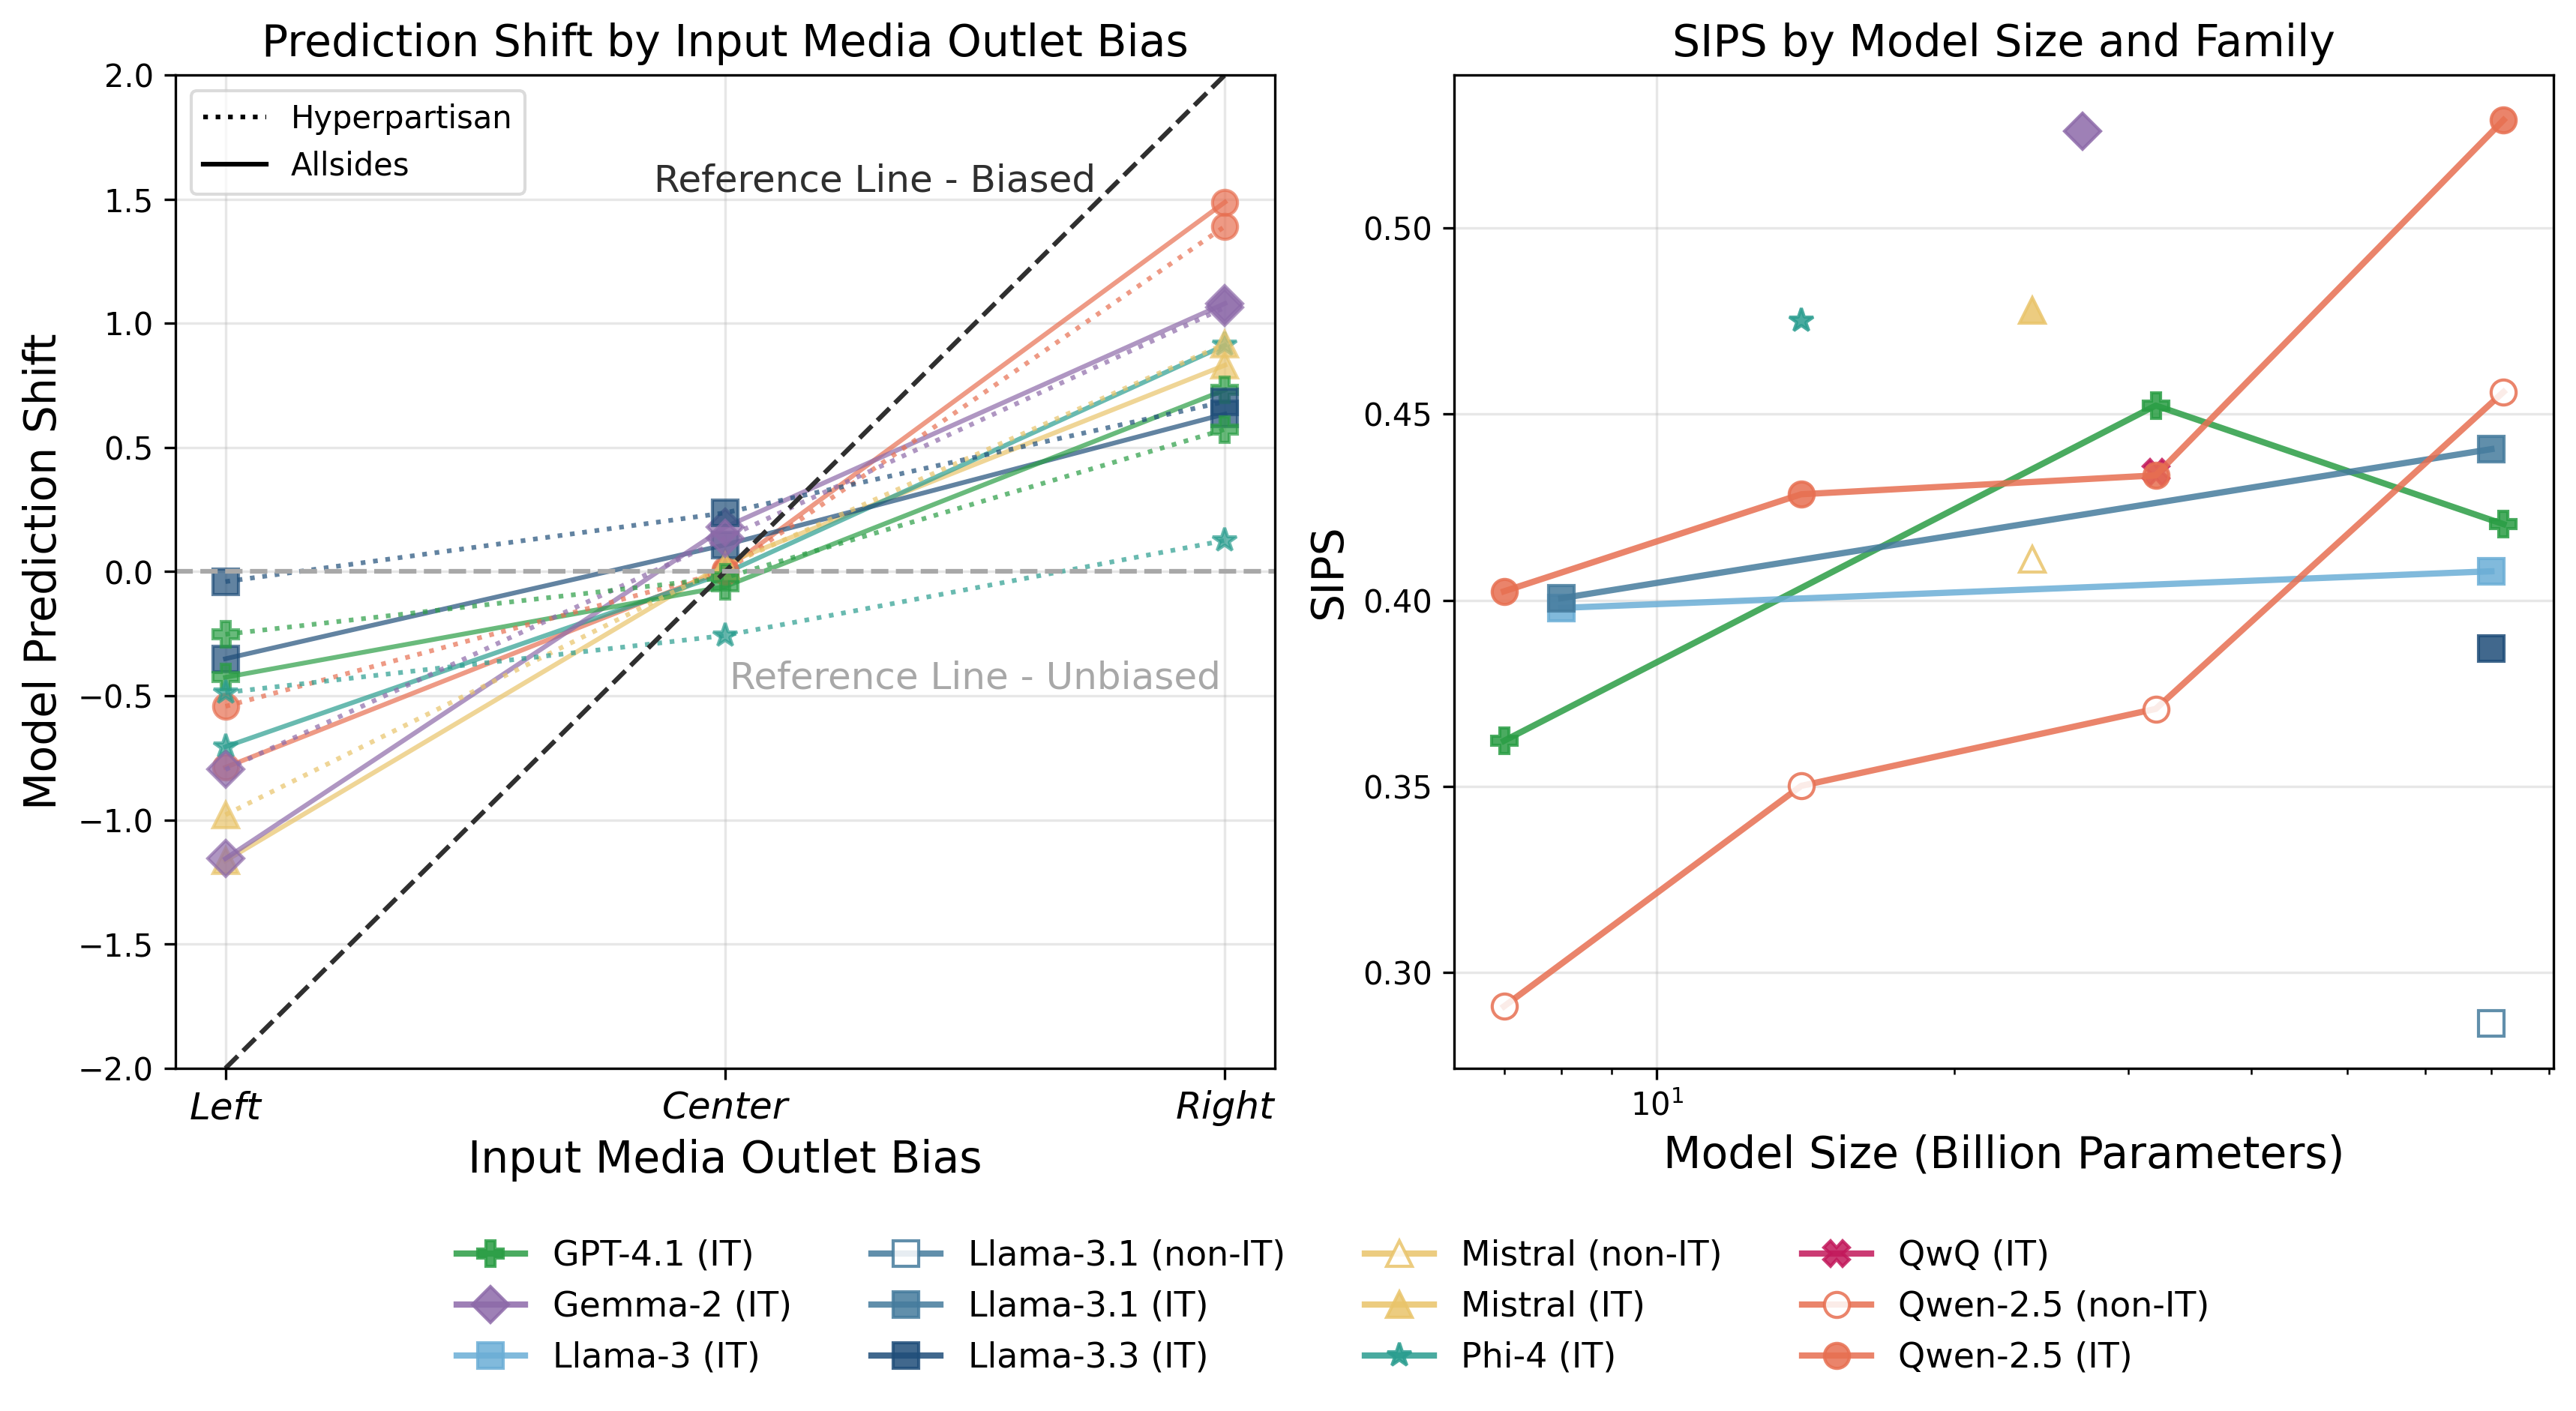

In [67]:
# SIPS 데이터 읽기
sips_df = pd.read_csv("../analyze_result/sips_all_for_figure.csv")

# 모델명에서 필요한 정보 추출: 모델 계열(family), 크기(size), instruction tuning 여부
model_info = []

for idx, row in sips_df.iterrows():
    model_name = row['model']
    sips = row['SIPS']
    
    # 기본값 설정
    family = "Unknown"
    series = "Unknown"
    size = 0
    is_it = True
    is_hp = False  # HP(Hyperpartisan) 여부
    
    # non-IT 여부 확인
    if "Base" in model_name:
        is_it = False
        # model_name = model_name.replace("-non-IT", "")
        
    # HP(Hyperpartisan) 모델 확인
    if "-HP" in model_name:
        is_hp = True
        continue
        # model_name = model_name.replace("-HP", "")
        
    # 모델명 파싱
    parts = model_name.split("-")
    
    # 모델 계열 및 시리즈 추출
    if "Qwen" in model_name:
        family = "Qwen"
        if "Qwen2.5" in model_name:
            series = "Qwen-2.5"
        elif "Qwen1.5" in model_name:
            series = "Qwen-1.5"
        elif "Qwen2" in model_name:
            series = "Qwen-2"
        else:
            series = "Qwen"
    elif "Llama" in model_name or (parts[0] == "Meta" and "Llama" in model_name):
        family = "Llama"
        if "3.3" in model_name:
            series = "Llama-3.3"
        elif "3.1" in model_name:
            series = "Llama-3.1"
        elif "3" in model_name:
            series = "Llama-3"
        else:
            series = "Llama"
    elif "Mistral" in model_name:
        family = "Mistral"
        series = "Mistral"
    elif "Phi" in model_name:
        family = "Phi"
        if "4" in model_name:
            series = "Phi-4"
        else:
            series = "Phi"
    elif "Gemma" in model_name:
        family = "Gemma"
        if "2" in model_name:
            series = "Gemma-2"
        else:
            series = "Gemma"
    elif "QwQ" in model_name:
        family = "QwQ"
        series = "QwQ"
    elif "GPT" in model_name:
        family = "GPT"
        if "4.1" in model_name:
            series = "GPT-4.1"
        elif "4" in model_name:
            series = "GPT-4"
        else:
            series = "GPT"
        
    # 모델 크기 추출
    for part in parts:
        if part.endswith("B"):
            try:
                size = int(part.replace("B", ""))
                break
            except ValueError:
                pass
    
    # 특수 케이스 처리
    if size == 0:
        if model_name == "GPT-4.1-IT" or model_name == "GPT-4.1-IT-HP":
            size = 72
        elif model_name == "GPT-4.1-Mini-IT" or model_name == "GPT-4.1-Mini-IT-HP":
            size = 32
        elif model_name == "GPT-4.1-Nano-IT" or model_name == "GPT-4.1-Nano-IT-HP":
            size = 7
        elif "Phi-4" in model_name:
            size = 14
        else:
            # 모델명에서 숫자+B 패턴 찾기
            import re
            size_match = re.search(r'(\d+\.?\d*)B', model_name)
            if size_match:
                try:
                    size = float(size_match.group(1))
                except ValueError:
                    pass
    
    model_info.append({
        'model': model_name,
        'family': family,
        'series': series,
        'size': size,
        'is_it': is_it,
        'is_hp': is_hp,
        'sips': sips
    })

# 디버깅: 파싱 결과 확인
model_df = pd.DataFrame(model_info)
print("Model parsing results:")
print(model_df[['model', 'family', 'series', 'size', 'is_it', 'is_hp', 'sips']])

# 유효한 크기 정보가 있는 모델만 선택
model_df = model_df[model_df['size'] > 0]

# --- 두 개의 subplot 생성 (동일한 크기) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=300, gridspec_kw={'width_ratios': [1, 1]})
ax = axes[1]  # 왼쪽: SIPS by Model Size
ax2 = axes[0] # 오른쪽: Allsides 그래프

# --- SIPS 그래프 (왼쪽) ---
family_markers = {
    'Qwen': 'o',       # 원
    'Llama': 's',      # 사각형
    'Mistral': '^',    # 삼각형
    'Phi': '*',        # 별
    'Gemma': 'D',      # 다이아몬드
    'QwQ': 'X',         # X
    'GPT': 'P'
}

series_colors = {
    'Qwen-2.5': '#E76F51',
    'Qwen-2': '#CF6149',
    'Qwen-1.5': '#B55540',
    'Qwen': '#994637',
    'Llama-3.3': '#1F4E79',
    'Llama-3.1': '#457B9D',
    'Llama-3': '#6BAED6',
    'Mistral': '#E9C46A',
    'Phi-4': '#2A9D8F',
    'Gemma-2': '#8D6AA9',
    'QwQ': '#C2185B',
    'GPT': '#2A9D44',
}

# 추가된 데이터 그룹화 및 정렬
grouped = model_df.groupby(['series', 'is_it', 'is_hp'])

# 범례를 위한 항목 추적
legend_items = {}

# 범례 항목을 모으기 위한 리스트
combined_handles = []
combined_labels = []

# 각 시리즈 및 IT 여부별로 그래프 그리기
for (series, is_it, is_hp), group in grouped:
    # 색상 및 마커 결정
    family = group['family'].iloc[0]
    color = next((v for k, v in series_colors.items() if series.startswith(k)), '#333333')
    marker = family_markers.get(family, 'o')
    
    # 라인 스타일 결정 (HP 여부에 따라)
    linestyle = '--' if is_hp else '-'
    
    # Non-IT 모델을 위한 빈 마커 설정
    if is_it:
        markerfacecolor = color  # IT 모델은 채워진 마커
    else:
        markerfacecolor = 'white'  # Non-IT 모델은 빈 마커
    
    # 크기 순으로 정렬
    group = group.sort_values('size')
    
    # 그래프 그리기
    line, = ax.plot(group['size'], group['sips'], 
                marker=marker, linestyle=linestyle, color=color, 
                markerfacecolor=markerfacecolor, markeredgecolor=color,
                markersize=8, linewidth=2, alpha=0.85)
    
    # # 각 포인트에 모델 크기 라벨 추가
    # for i, row in group.iterrows():    
    #     if row['model'] == "GPT-4.1-Mini-IT":
    #         ax.annotate("Mini", 
    #                (row['size'], row['sips']),
    #                ha='right',
    #                fontsize=12,
    #                color=color,
    #                xytext=(0, 0),
    #                textcoords='offset points',
    #                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))
    #     elif row['model'] == "GPT-4.1-Nano-IT":
    #         ax.annotate("Nano", 
    #                (row['size'], row['sips']),
    #                ha='left',
    #                fontsize=12,
    #                color=color,
    #                xytext=(0, 0),
    #                textcoords='offset points',
    #                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))
    #     elif row['model'] == "GPT-4.1-IT":
    #         ax.annotate("Base", 
    #                (row['size'], row['sips']),
    #                ha='left',
    #                fontsize=12,
    #                color=color,
    #                xytext=(0, 0),
    #                textcoords='offset points',
    #                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))
    #     else:
    #         label_text = f"{row['size']}B"
    #         pos = (row['size'], row['sips'])
    #         ha = 'left'
                
    #         ax.annotate(label_text, 
    #             pos,
    #             ha=ha,
    #             fontsize=12,
    #             color=color,
    #             xytext=(0, 0),
    #             textcoords='offset points',
    #             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3'))
    # 범례 아이템 저장
    label = f"{series} {'(IT)' if is_it else '(non-IT)'} {'(HP)' if is_hp else ''}"
    legend_items[label] = line

ax.set_xscale('log')
ax.set_xlabel('Model Size (Billion Parameters)', fontsize=14)
ax.set_ylabel('SIPS', fontsize=14)
ax.set_title('SIPS by Model Size and Family', fontsize=14)
ax.grid(True, alpha=0.3)

# --- 오른쪽 그래프: Allsides 결과 ---
# 모델 데이터 로드
main_model_list = [
    "Qwen2.5-72B-IT",
    "Mistral-Small-24B-IT",
    "Phi-4-IT",
    "Llama-3.3-70B-IT",
    "Gemma-2-27B-IT",
    "GPT-4.1-IT",
]

hp_model_list = [
    "Qwen2.5-72B-IT-HP",
    "Mistral-Small-24B-IT-HP",
    "Phi-4-IT-HP",
    "Llama-3.3-70B-IT-HP",
    "Gemma-2-27B-IT-HP",
    "GPT-4.1-IT-HP",
]

qwen_result_dict = all_models["Qwen2.5-72B-IT"]
mistral_result_dict = all_models["Mistral-Small-24B-IT"]
phi_result_dict = all_models["Phi-4-IT"]
llama_result_dict = all_models["Llama-3.3-70B-IT"]
gemma_result_dict = all_models["Gemma-2-27B-IT"]
gpt_result_dict = all_models["GPT-4.1-IT"]

qwen_hp_result_dict = all_models["Qwen2.5-72B-IT-HP"]
mistral_hp_result_dict = all_models["Mistral-Small-24B-IT-HP"]
phi_hp_result_dict = all_models["Phi-4-IT-HP"]
llama_hp_result_dict = all_models["Llama-3.3-70B-IT-HP"]
gemma_hp_result_dict = all_models["Gemma-2-27B-IT-HP"]
gpt_hp_result_dict = all_models["GPT-4.1-IT-HP"]

# 데이터 준비
x_labels = ['left', 'center', 'right']
x_positions = np.arange(len(x_labels))

# 각 result_dict에 대한 평균, 최소, 최대값
qwen_values = calculate_mean_values_graph(qwen_result_dict)
mistral_values = calculate_mean_values_graph(mistral_result_dict)
phi_values = calculate_mean_values_graph(phi_result_dict)
llama_values = calculate_mean_values_graph(llama_result_dict)
gemma_values = calculate_mean_values_graph(gemma_result_dict)
gpt_values = calculate_mean_values_graph(gpt_result_dict)

qwen_hp_values = calculate_mean_values_graph(qwen_hp_result_dict)
mistral_hp_values = calculate_mean_values_graph(mistral_hp_result_dict)
phi_hp_values = calculate_mean_values_graph(phi_hp_result_dict)
llama_hp_values = calculate_mean_values_graph(llama_hp_result_dict)
gemma_hp_values = calculate_mean_values_graph(gemma_hp_result_dict)
gpt_hp_values = calculate_mean_values_graph(gpt_hp_result_dict)

# 모델별 색상과 마커 (왼쪽 그래프와 일치)
model_info = [
    {'name': 'Qwen', 'values': qwen_values, 'family': 'Qwen', 'series': 'Qwen-2.5', 'is_hp': False},
    {'name': 'Mistral', 'values': mistral_values, 'family': 'Mistral', 'series': 'Mistral', 'is_hp': False},
    {'name': 'Phi', 'values': phi_values, 'family': 'Phi', 'series': 'Phi-4', 'is_hp': False},
    {'name': 'Llama', 'values': llama_values, 'family': 'Llama', 'series': 'Llama-3.3', 'is_hp': False},
    {'name': 'Gemma', 'values': gemma_values, 'family': 'Gemma', 'series': 'Gemma-2', 'is_hp': False},
    {'name': 'GPT', 'values': gpt_values, 'family': 'GPT', 'series': 'GPT-4.1', 'is_hp': False},
    {'name': 'Qwen-HP', 'values': qwen_hp_values, 'family': 'Qwen', 'series': 'Qwen-2.5', 'is_hp': True},
    {'name': 'Mistral-HP', 'values': mistral_hp_values, 'family': 'Mistral', 'series': 'Mistral', 'is_hp': True},
    {'name': 'Phi-HP', 'values': phi_hp_values, 'family': 'Phi', 'series': 'Phi-4', 'is_hp': True},
    {'name': 'Llama-HP', 'values': llama_hp_values, 'family': 'Llama', 'series': 'Llama-3.3', 'is_hp': True},
    {'name': 'Gemma-HP', 'values': gemma_hp_values, 'family': 'Gemma', 'series': 'Gemma-2', 'is_hp': True},
    {'name': 'GPT-HP', 'values': gpt_hp_values, 'family': 'GPT', 'series': 'GPT-4.1', 'is_hp': True},
]

# 각 모델의 none 값 출력
# print("\n=== None values and SIPS for each model ===")

# 각 모델 플롯
for model in model_info:
    family = model['family']
    series = model['series']
    is_hp = model['is_hp']
    color = next((v for k, v in series_colors.items() if series.startswith(k)), '#333333')
    marker = family_markers.get(family, 'o')
    linestyle = ':' if is_hp else '-'  # HP 모델은 점선, 일반 모델은 실선
    
    # 평균값 그리기 - 선 두께를 1.5로 줄임 (원래 2)
    linewidth = 1.5
    markersize = 8
    line, = ax2.plot(x_positions, [model['values']['mean'][label] for label in x_labels], 
            marker=marker, markersize=markersize, linewidth=linewidth, color=color, linestyle=linestyle, label=model['name'], alpha=0.7)
    
    # 모델 이름 결정
    model_label = ""
    if model['name'] == 'Qwen':
        model_label = "Qwen-2.5-72B"
    elif model['name'] == 'Llama':
        model_label = "Llama-3.3-70B"
    elif model['name'] == 'Phi':
        model_label = "Phi-4-14B"
    elif model['name'] == 'Gemma':
        model_label = "Gemma-2-27B"
    elif model['name'] == 'Mistral':
        model_label = "Mistral-small-24B"
    
    # none 값 터미널에 출력
    none_val = model['values']['none']
    # print(f"{model_label} - none: {none_val:.2f}")
    
    # SIPS 값 터미널에 출력
    model_sips_row = model_df[model_df['model']==model_label]
    if not model_sips_row.empty:
        model_sips = model_sips_row['sips'].iloc[0]
        # print(f"{model_label} - SIPS: {model_sips:.2f}")

# Reference Line: Bias Class가 left -> right일 때 -2 -> 2
biased_line = np.linspace(-2, 2, len(x_labels))
ax2.plot(x_positions, biased_line, linestyle='--', color='#2F2F2F', linewidth=1.5, label='Biased Reference')
ax2.text(x_positions[1] + 0.3, biased_line[1] + 1.5, "Reference Line - Biased", ha='center', va='bottom', fontsize=12, color='#2F2F2F')

# Reference Line: 모든 값이 0
ax2.axhline(0, color='#A8A8A8', linestyle='--', linewidth=1.5, label='Unbiased Reference')
ax2.text(x_positions[2] - 0.5, -0.5, "Reference Line - Unbiased", ha='center', va='bottom', fontsize=12, color='#A8A8A8')

# Reference Line 텍스트 제거 (더 이상 필요 없음)

ax2.set_xticks(x_positions)
ax2.set_xticklabels(["Left", "Center", "Right"], fontsize=12, rotation=0, fontstyle='italic')
ax2.set_xlabel('Input Media Outlet Bias', fontsize=14)
ax2.set_ylabel('Model Prediction Shift', fontsize=14)
ax2.set_title('Prediction Shift by Input Media Outlet Bias', fontsize=14)
ax2.set_ylim(-2, 2)
ax2.grid(True, alpha=0.3)

# 우측 그림의 범례 제거

# 왼쪽 그래프의 범례 항목 추가
for label, line in legend_items.items():
    combined_handles.append({'handle': line, 'label': f"{label}"})

# 오른쪽 그래프의 모델 라인에 대한 범례도 추가
for model in model_info:
    model_name = model['name']
    color = next((v for k, v in series_colors.items() if model['series'].startswith(k)), '#333333')
    marker = family_markers.get(model['family'], 'o')
    linestyle = ':' if model['is_hp'] else '-'  # HP 모델은 점선(sparse), 일반 모델은 실선
    
    # combined_handles.append({'handle': plt.Line2D([0], [0], color=color, marker=marker, 
    #                                         linestyle=linestyle, markersize=10),
    #                         'label': f"{model_name} (Right Graph)"})

# 우측 그림 좌상단에 Hyperpartisan/Allsides 범례 추가
legend_elements = [
    plt.Line2D([0], [0], color='black', linestyle=':', lw=1.5, label='Hyperpartisan'),
    plt.Line2D([0], [0], color='black', linestyle='-', lw=1.5, label='Allsides')
]
ax2.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.7)

# 범례를 figure 하단에 배치 (공유)
handles = [item['handle'] for item in combined_handles]
labels = [item['label'] for item in combined_handles]
fig.legend(handles, labels, fontsize=11, loc='lower center',  
            bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False)

# 더 큰 하단 여백 확보
plt.tight_layout()
plt.subplots_adjust(bottom=0.2, right=0.95)  # 하단 여백 증가
# plt.show()
plt.savefig("../analyze_result/final/sips_by_model_size_double.png", dpi=300, bbox_inches='tight')

print("Combined figure saved to './analyze_result/sips_by_model_size_double.png'")

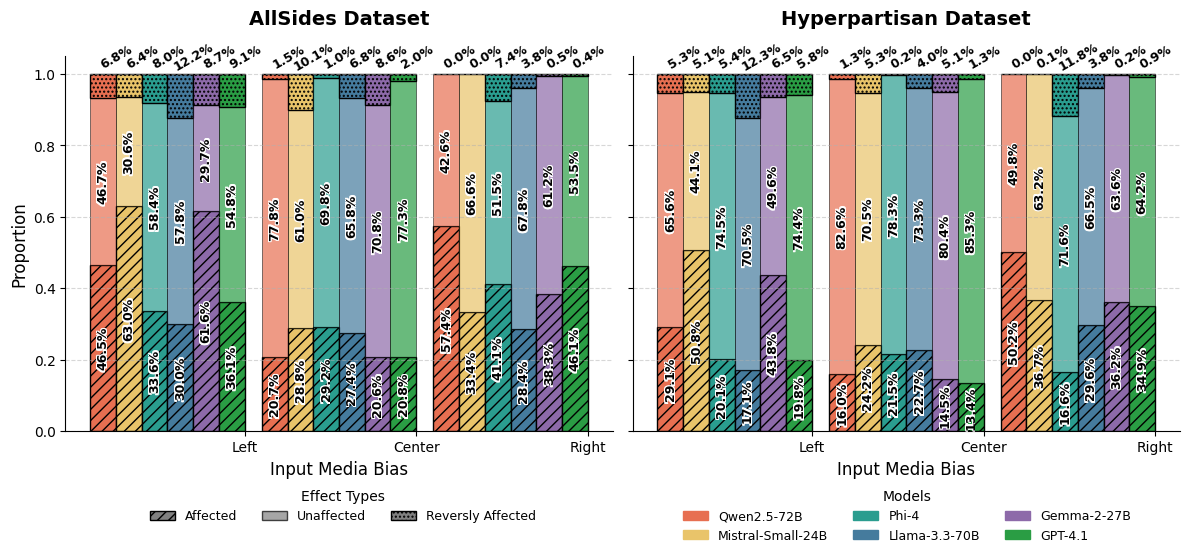

In [139]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ——————————————
# 1. 데이터 불러오기
# ——————————————
# 로컬 환경에 맞게 경로를 수정하세요.
df = pd.read_csv('../analyze_result/affected_result_df.csv')

# 'all' 카테고리 제외
biases = [b for b in df['bias'].unique() if b != 'all' and b != 'lean_left' and b != 'lean_right']

# ——————————————
# 2. 그래프 함수 정의
# ——————————————
def plot_model_bias_ratios(models_to_include, save_path=None, figsize=(12, 5), titles=None):
    # 데이터 전처리
    sub = df[df['model'].isin(models_to_include) & (df['bias'] != 'all')].copy()
    sub['total'] = sub['affected'] + sub['unaffected'] + sub['reversly_affected']
    sub['affected_ratio'] = sub['affected'] / sub['total']
    sub['unaffected_ratio'] = sub['unaffected'] / sub['total']
    sub['reversly_affected_ratio'] = sub['reversly_affected'] / sub['total']
    
    # 기본 설정
    x = np.arange(len(biases))
    bar_w = 0.15
    offsets = np.linspace(
        -((len(models_to_include) - 1) / 2) * bar_w,
         ((len(models_to_include) - 1) / 2) * bar_w,
         len(models_to_include)
    )
    
    model_colors = {
        # IT 모델
        'Qwen2.5-72B-IT': '#E76F51',
        'Mistral-Small-24B-IT': '#E9C46A',
        'Phi-4-IT': '#2A9D8F',
        'Llama-3.3-70B-IT': '#457B9D',
        'Gemma-2-27B-IT': '#8D6AA9',
        'GPT-4.1-IT': '#2A9D44',
        
        # HP(Hyperpartisan) 모델
        'Qwen2.5-72B-IT-HP': '#E76F51',
        'Mistral-Small-24B-IT-HP': '#E9C46A',
        'Phi-4-IT-HP': '#2A9D8F',
        'Llama-3.3-70B-IT-HP': '#457B9D',
        'Gemma-2-27B-IT-HP': '#8D6AA9',
        'GPT-4.1-IT-HP': '#2A9D44',
        
        # 크기별 Qwen 모델
        'Qwen2.5-32B-IT': '#EA8D6E',
        'Qwen2.5-14B-IT': '#EDAA8C',
        'Qwen2.5-7B-IT': '#F0C6AA',
        'Qwen2.5-3B-IT': '#F4E3C8',
        'Qwen2.5-1.5B-IT': '#F7F0E6',
        'Qwen2.5-0.5B-IT': '#FAFDFF',
        
        # Non-IT 모델
        'Qwen2.5-72B-Base': '#E76F51',
        'Qwen2.5-32B-Base': '#EA8D6E',
        'Qwen2.5-14B-Base': '#EDAA8C',
        'Qwen2.5-7B-Base': '#F0C6AA',
        'Qwen2.5-3B-Base': '#F4E3C8',
        'Qwen2.5-1.5B-Base': '#F7F0E6',
        'Qwen2.5-0.5B-Base': '#FAFDFF',
        
        'Llama-3.1-70B-IT': '#1F4E79',
        'Llama-3.1-8B-IT': '#6BAED6',
        'Llama-3-70B-IT': '#142F43',
        'Llama-3-8B-IT': '#BDD7E7',
        
        'GPT-4.1-IT': '#2A9D44',
        'GPT-4.1-mini-IT': '#55B069',
        'GPT-4.1-nano-IT': '#7FC48F',
        
        'Llama-3.1-70B-Base': '#1F4E79',
        'Llama-3.1-8B-Base': '#6BAED6',
        'Mistral-Small-24B-Base': '#E9C46A',
        
        'QwQ-32B-IT': '#C2185B',
    }
    
    hatch_aff = '///'
    hatch_rev = '....'
    
    # 두 개의 서브플롯 생성
    fig, axs = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    # 모델 색상 범례 생성
    model_patches = [
        plt.Rectangle((0,0),1,1, color=model_colors.get(m, '#333333'))
        for m in models_to_include[:6]  # 첫 6개 모델만 사용 (두 그래프에 동일한 모델 사용 가정)
    ]
    
    # Effect 유형 범례 생성
    eff_handles = [
        plt.Rectangle((0,0),1,1, facecolor='gray', hatch=hatch_aff, edgecolor='black'),
        plt.Rectangle((0,0),1,1, facecolor='gray', alpha=0.7, edgecolor='black'),
        plt.Rectangle((0,0),1,1, facecolor='gray', hatch=hatch_rev, edgecolor='black'),
    ]
    
    # 두 개의 서브플롯에 대한 반복
    for plot_idx, (ax, title) in enumerate(zip(axs, titles if titles else ["", ""])):
        # 모델 목록 선택 (첫 번째 그래프는 첫 6개, 두 번째 그래프는 나머지 6개)
        current_models = models_to_include[plot_idx*6:(plot_idx+1)*6]
        
        for i, model in enumerate(current_models):
            d = sub[sub['model'] == model]
            aff = [ d[d['bias']==b]['affected_ratio'].iloc[0]   if b in d['bias'].values else 0 for b in biases ]
            una = [ d[d['bias']==b]['unaffected_ratio'].iloc[0] if b in d['bias'].values else 1 for b in biases ]
            rev = [ d[d['bias']==b]['reversly_affected_ratio'].iloc[0] if b in d['bias'].values else 0 for b in biases ]
            pos = x + offsets[i]
            col = model_colors.get(model, '#333333')
            
            # Affected
            bars_aff = ax.bar(
                pos, aff, bar_w,
                color=col,
                hatch=hatch_aff,
                edgecolor='black',
                linewidth=1.0
            )
            # Unaffected (더 진하게)
            bars_una = ax.bar(
                pos, una, bar_w,
                bottom=aff,
                color=col,
                alpha=0.7,
                edgecolor='black',
                linewidth=0.5
            )
            # Reversly Affected
            bottom_rev = np.array(aff) + np.array(una)
            bars_rev = ax.bar(
                pos, rev, bar_w,
                bottom=bottom_rev,
                color=col,
                hatch=hatch_rev,
                edgecolor='black',
                linewidth=1.0
            )
            
            # — 각 구간에 퍼센트 텍스트 추가 —
            for j in range(len(biases)):
                # affected 라벨
                if aff[j]:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    # 먼저 흰색으로 약간 더 크게 그리고, 그 위에 검은색 텍스트 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, aff[j]/2+dy*0.005,
                            f"{aff[j]*100:.1f}%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j]/2,
                        f"{aff[j]*100:.1f}%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                else:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, (aff[j]/2 + 0.07)+dy*0.005,
                            "0.0%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j]/2 + 0.07,
                        "0.0%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                # unaffected 라벨
                if una[j]:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, (aff[j] + una[j]/2)+dy*0.005,
                            f"{una[j]*100:.1f}%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j] + una[j]/2,
                        f"{una[j]*100:.1f}%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                else:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, (aff[j] + una[j]/2)+dy*0.005,
                            "0.0%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j] + una[j]/2,
                        "0.0%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                # reversly_affected 라벨
                if rev[j]:
                    ax.text(
                        pos[j] + 0.08, 1.05,
                        f"{rev[j]*100:.1f}%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=30
                    )
                else:
                    ax.text(
                        pos[j] + 0.08, 1.05,
                        "0.0%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=30
                    )
        
        # 축 & 타이틀
        ax.set_xticks(x)  
        ax.set_xticklabels(["Left","Center","Right"], ha='center')
        ax.set_ylim(0, 1.05)
        ax.set_xlabel('Input Media Bias', fontsize=12)
        if plot_idx == 0:  # 첫 번째 그래프에만 y축 레이블 추가
            ax.set_ylabel('Proportion', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # 데이터셋 제목 추가
        ax.text(0.5, 1.1, title, 
                ha='center', va='center', 
                transform=ax.transAxes, 
                fontsize=14, fontweight='bold')
    
    # 공통 범례 추가 (그림 하단)
    # 모델 범례
    first_legend = fig.legend(
        model_patches, [m.replace('-IT', '').replace('-HP', '') for m in models_to_include[:6]],
        title='Models',
        loc='upper center', 
        bbox_to_anchor=(0.76, 0.03),
        ncol=min(3, len(models_to_include[:6])),
        frameon=False,
        fontsize=9
    )
    
    # Effect 유형 범례
    fig.legend(
        eff_handles,
        ['Affected', 'Unaffected', 'Reversly Affected'],
        title='Effect Types',
        loc='upper center',
        bbox_to_anchor=(0.29, 0.03),
        ncol=3,
        frameon=False,
        fontsize=9
    )
    
    plt.tight_layout()
    plt.rcParams['font.family'] = 'sans-serif'
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        # plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


# ——————————————
# 3. 예시 실행
# ——————————————
if __name__ == '__main__':
    main_models = [
        'Qwen2.5-72B-IT',
        'Mistral-Small-24B-IT',
        'Phi-4-IT',
        'Llama-3.3-70B-IT',
        'Gemma-2-27B-IT',
        'GPT-4.1-IT',
        'Qwen2.5-72B-IT-HP',
        'Mistral-Small-24B-IT-HP',
        'Phi-4-IT-HP',
        'Llama-3.3-70B-IT-HP',
        'Gemma-2-27B-IT-HP',
        'GPT-4.1-IT-HP',
    ]
    
    plot_model_bias_ratios(
        main_models,
        save_path='../analyze_result/final/combined_models_bias_ratios.png',
        titles=["AllSides Dataset", "Hyperpartisan Dataset"]
    )

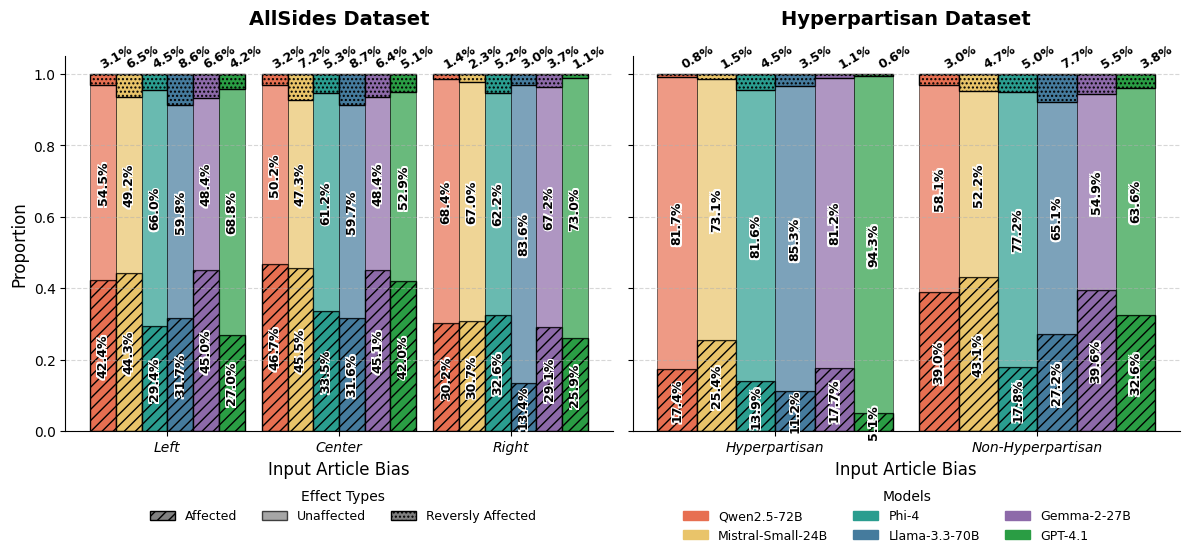

In [138]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ——————————————
# 1. 데이터 불러오기 (JSON에서 직접)
# ——————————————
data = [
    {"model": "Qwen2.5-72B-IT", "is_hp": False, "left_affected": 2015, "right_affected": 1418, "center_affected": 2205,
     "left_unaffected": 2588, "right_unaffected": 3213, "center_unaffected": 2369,
     "left_reversly_affected": 149, "right_reversly_affected": 67, "center_reversly_affected": 149},
    {"model": "Mistral-Small-24B-IT", "is_hp": False, "left_affected": 2060, "right_affected": 1504, "center_affected": 2112,
     "left_unaffected": 2289, "right_unaffected": 3284, "center_unaffected": 2194,
     "left_reversly_affected": 300, "right_reversly_affected": 111, "center_reversly_affected": 332},
    {"model": "Phi-4-IT", "is_hp": False, "left_affected": 1465, "right_affected": 1490, "center_affected": 1638,
     "left_unaffected": 3286, "right_unaffected": 2843, "center_unaffected": 2987,
     "left_reversly_affected": 225, "right_reversly_affected": 238, "center_reversly_affected": 258},
    {"model": "Llama-3.3-70B-IT", "is_hp": False, "left_affected": 1557, "right_affected": 686, "center_affected": 1549,
     "left_unaffected": 2937, "right_unaffected": 4267, "center_unaffected": 2925,
     "left_reversly_affected": 421, "right_reversly_affected": 154, "center_reversly_affected": 429},
    {"model": "Gemma-2-27B-IT", "is_hp": False, "left_affected": 2114, "right_affected": 1462, "center_affected": 2121,
     "left_unaffected": 2273, "right_unaffected": 3372, "center_unaffected": 2275,
     "left_reversly_affected": 311, "right_reversly_affected": 187, "center_reversly_affected": 303},
    {"model": "GPT-4.1-IT", "is_hp": False, "left_affected": 1383, "right_affected": 1349, "center_affected": 2023,
     "left_unaffected": 3525, "right_unaffected": 3794, "center_unaffected": 2548,
     "left_reversly_affected": 213, "right_reversly_affected": 56,  "center_reversly_affected": 246},
    {"model": "Qwen2.5-72B-IT-HP", "is_hp": True,  "hp_affected": 337,  "non_hp_affected": 894,
     "hp_unaffected": 1579, "non_hp_unaffected": 1332,
     "hp_reversly_affected": 16,  "non_hp_reversly_affected": 68},
    {"model": "Mistral-Small-24B-IT-HP", "is_hp": True,  "hp_affected": 467,  "non_hp_affected": 961,
     "hp_unaffected": 1342, "non_hp_unaffected": 1165,
     "hp_reversly_affected": 27,  "non_hp_reversly_affected": 106},
    {"model": "Phi-4-IT-HP", "is_hp": True,  "hp_affected": 281,  "non_hp_affected": 461,
     "hp_unaffected": 1655, "non_hp_unaffected": 1998,
     "hp_reversly_affected": 91,  "non_hp_reversly_affected": 130},
    {"model": "Llama-3.3-70B-IT-HP", "is_hp": True,  "hp_affected": 229,  "non_hp_affected": 655,
     "hp_unaffected": 1746, "non_hp_unaffected": 1571,
     "hp_reversly_affected": 71,  "non_hp_reversly_affected": 186},
    {"model": "Gemma-2-27B-IT-HP", "is_hp": True,  "hp_affected": 341,  "non_hp_affected": 920,
     "hp_unaffected": 1565, "non_hp_unaffected": 1277,
     "hp_reversly_affected": 22,  "non_hp_reversly_affected": 128},
    {"model": "GPT-4.1-IT-HP", "is_hp": True,  "hp_affected": 109,  "non_hp_affected": 776,
     "hp_unaffected": 2006, "non_hp_unaffected": 1512,
     "hp_reversly_affected": 13,  "non_hp_reversly_affected": 90},
]

# ——————————————
# 2. JSON → DataFrame로 변환
# ——————————————
records = []
for rec in data:
    if not rec["is_hp"]:
        for bias in ["left", "center", "right"]:
            records.append({
                "model": rec["model"],
                "bias": bias,
                "affected": rec[f"{bias}_affected"],
                "unaffected": rec[f"{bias}_unaffected"],
                "reversly_affected": rec[f"{bias}_reversly_affected"],
            })
    else:
        for bias in ["hp", "non_hp"]:
            records.append({
                "model": rec["model"],
                "bias": bias,
                "affected": rec[f"{bias}_affected"],
                "unaffected": rec[f"{bias}_unaffected"],
                "reversly_affected": rec[f"{bias}_reversly_affected"],
            })

df = pd.DataFrame(records)

# ——————————————
# 3. plot_model_bias_ratios 함수 수정
# ——————————————
biases_nonhp = ["left", "center", "right"]
biases_hp    = ["hp", "non_hp"]

def plot_model_bias_ratios(models_to_include, save_path=None, figsize=(12, 5), titles=None):
    # 공통 스타일 및 컬러
    model_colors = {
        'Qwen2.5-72B-IT': '#E76F51','Mistral-Small-24B-IT': '#E9C46A',
        'Phi-4-IT': '#2A9D8F','Llama-3.3-70B-IT': '#457B9D','Gemma-2-27B-IT': '#8D6AA9',
        'GPT-4.1-IT': '#2A9D44','Qwen2.5-72B-IT-HP': '#E76F51','Mistral-Small-24B-IT-HP': '#E9C46A',
        'Phi-4-IT-HP': '#2A9D8F','Llama-3.3-70B-IT-HP': '#457B9D','Gemma-2-27B-IT-HP': '#8D6AA9',
        'GPT-4.1-IT-HP': '#2A9D44'
    }
    hatch_aff = '///'
    hatch_rev = '....'

    fig, axs = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    # 모델 색상 범례 생성
    model_patches = [
        plt.Rectangle((0,0),1,1, color=model_colors.get(m, '#333333'))
        for m in models_to_include[:6]  # 첫 6개 모델만 사용 (두 그래프에 동일한 모델 사용 가정)
    ]
    
    # Effect 유형 범례 생성
    eff_handles = [
        plt.Rectangle((0,0),1,1, facecolor='gray', hatch=hatch_aff, edgecolor='black'),
        plt.Rectangle((0,0),1,1, facecolor='gray', alpha=0.7, edgecolor='black'),
        plt.Rectangle((0,0),1,1, facecolor='gray', hatch=hatch_rev, edgecolor='black'),
    ]

    for plot_idx, ax in enumerate(axs):
        # 첫 번째: non-HP 모델, 두 번째: HP 모델
        if plot_idx == 0:
            current_models = models_to_include[:6]
            current_biases = biases_nonhp
        else:
            current_models = models_to_include[6:]
            current_biases = biases_hp

        # 비율 계산
        subset = df[df["model"].isin(current_models) & df["bias"].isin(current_biases)].copy()
        subset["total"] = subset["affected"] + subset["unaffected"] + subset["reversly_affected"]
        subset["affected_ratio"] = subset["affected"] / subset["total"]
        subset["unaffected_ratio"] = subset["unaffected"] / subset["total"]
        subset["reversly_affected_ratio"] = subset["reversly_affected"] / subset["total"]

        x = np.arange(len(current_biases))
        bar_w = 0.15
        offsets = np.linspace(-((len(current_models)-1)/2)*bar_w,
                               ((len(current_models)-1)/2)*bar_w,
                               len(current_models))

        for i, model in enumerate(current_models):
            d = subset[subset["model"] == model]
            aff = [d[d["bias"]==b]["affected_ratio"].iloc[0]   for b in current_biases]
            una = [d[d["bias"]==b]["unaffected_ratio"].iloc[0] for b in current_biases]
            rev = [d[d["bias"]==b]["reversly_affected_ratio"].iloc[0] for b in current_biases]
            pos = x + offsets[i]
            col = model_colors.get(model, '#777777')

            # Affected
            bars_aff = ax.bar(
                pos, aff, bar_w,
                color=col,
                hatch=hatch_aff,
                edgecolor='black',
                linewidth=1.0
            )
            # Unaffected (더 진하게)
            bars_una = ax.bar(
                pos, una, bar_w,
                bottom=aff,
                color=col,
                alpha=0.7,
                edgecolor='black',
                linewidth=0.5
            )
            # Reversly Affected
            bottom_rev = np.array(aff) + np.array(una)
            bars_rev = ax.bar(
                pos, rev, bar_w,
                bottom=bottom_rev,
                color=col,
                hatch=hatch_rev,
                edgecolor='black',
                linewidth=1.0
            )
            
            # — 각 구간에 퍼센트 텍스트 추가 —
            for j in range(len(current_biases)):
                # affected 라벨
                if aff[j]:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, aff[j]/2+dy*0.005,
                            f"{aff[j]*100:.1f}%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j]/2,
                        f"{aff[j]*100:.1f}%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                else:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, (aff[j]/2 + 0.07)+dy*0.005,
                            "0.0%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j]/2 + 0.07,
                        "0.0%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                # unaffected 라벨
                if una[j]:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, (aff[j] + una[j]/2)+dy*0.005,
                            f"{una[j]*100:.1f}%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j] + una[j]/2,
                        f"{una[j]*100:.1f}%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                else:
                    # 흰색 테두리를 위해 같은 텍스트를 여러 번 그리기
                    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1), (1,1)]:
                        ax.text(
                            pos[j]+dx*0.005, (aff[j] + una[j]/2)+dy*0.005,
                            "0.0%",
                            ha='center', va='center', fontsize=9, color='white', weight='bold',
                            rotation=90
                        )
                    # 실제 텍스트
                    ax.text(
                        pos[j], aff[j] + una[j]/2,
                        "0.0%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=90
                    )
                # reversly_affected 라벨
                if rev[j]:
                    ax.text(
                        pos[j] + 0.08, 1.05,
                        f"{rev[j]*100:.1f}%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=30
                    )
                else:
                    ax.text(
                        pos[j] + 0.08, 1.05,
                        "0.0%",
                        ha='center', va='center', fontsize=9, color='black', weight='bold',
                        rotation=30
                    )

        ax.set_xticks(x)
        if current_biases == ['left', 'center', 'right']:
            ax.set_xticklabels([b.capitalize() for b in current_biases], ha='center', fontstyle='italic')
        else:
            ax.set_xticklabels(["Hyperpartisan", "Non-Hyperpartisan"], ha='center', fontstyle='italic')
        ax.set_ylim(0, 1.05)
        ax.set_xlabel('Input Article Bias', fontsize=12)
        if plot_idx == 0:
            ax.set_ylabel('Proportion', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # 데이터셋 제목 추가
        ax.text(0.5, 1.1, titles[plot_idx] if titles else "", 
                ha='center', va='center', 
                transform=ax.transAxes, 
                fontsize=14, fontweight='bold')
    
    # 공통 범례 추가 (그림 하단)
    # 모델 범례
    first_legend = fig.legend(
        model_patches, [m.replace('-IT', '').replace('-HP', '') for m in models_to_include[:6]],
        title='Models',
        loc='upper center', 
        bbox_to_anchor=(0.76, 0.03),
        ncol=min(3, len(models_to_include[:6])),
        frameon=False,
        fontsize=9
    )
    
    # Effect 유형 범례
    fig.legend(
        eff_handles,
        ['Affected', 'Unaffected', 'Reversly Affected'],
        title='Effect Types',
        loc='upper center',
        bbox_to_anchor=(0.29, 0.03),
        ncol=3,
        frameon=False,
        fontsize=9
    )

    plt.tight_layout()
    plt.rcParams['font.family'] = 'sans-serif'
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


# ——————————————
# 4. 실행 예시
# ——————————————
if __name__ == '__main__':
    main_models = [
        'Qwen2.5-72B-IT','Mistral-Small-24B-IT','Phi-4-IT',
        'Llama-3.3-70B-IT','Gemma-2-27B-IT','GPT-4.1-IT',
        'Qwen2.5-72B-IT-HP','Mistral-Small-24B-IT-HP','Phi-4-IT-HP',
        'Llama-3.3-70B-IT-HP','Gemma-2-27B-IT-HP','GPT-4.1-IT-HP'
    ]
    plot_model_bias_ratios(
        main_models,
        save_path="../analyze_result/final/model_bias_ratios_by_article.png",
        titles=['AllSides Dataset', 'Hyperpartisan Dataset']
    )

/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_99078/3983056950.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cm_pct, annot=cm_pct.applymap(lambda v:f"{v:.1f}%"), fmt='',
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_99078/3983056950.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cm_pct, annot=cm_pct.applymap(lambda v:f"{v:.1f}%"), fmt='',
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_99078/3983056950.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cm_pct, annot=cm_pct.applymap(lambda v:f"{v:.1f}%"), fmt='',
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_99078/3983056950.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(cm_pct, annot=cm_pct.applymap(lambda v:f"{v:.1f}%"), fmt='',
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc

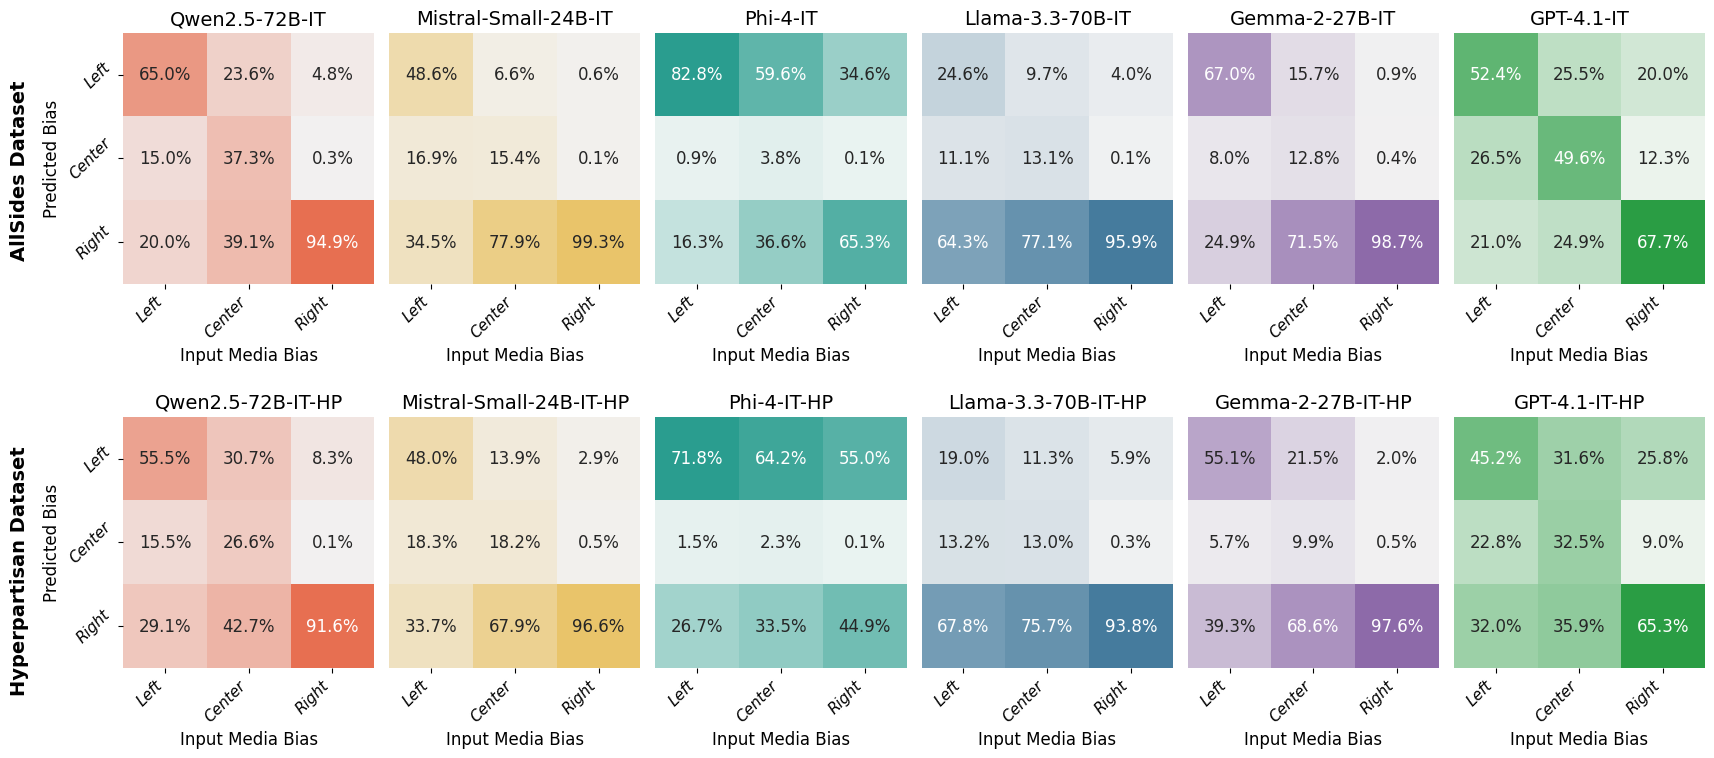

In [140]:
import os
import itertools
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable

# -------------------------------------------------
# 0. 환경 설정
# -------------------------------------------------
BIAS_LIST = ['left', 'center', 'right']
ORDER = {'left': -2, 'center': 0, 'right': 2}

model_colors = {
    'Qwen2.5-72B-IT':        '#E76F51',
    'Mistral-Small-24B-IT':  '#E9C46A',
    'Phi-4-IT':              '#2A9D8F',
    'Llama-3.3-70B-IT':      '#457B9D',
    'Gemma-2-27B-IT':        '#8D6AA9',
    'GPT-4.1-IT':            '#2A9D44',
    'Qwen2.5-72B-IT-HP':     '#E76F51',
    'Mistral-Small-24B-IT-HP':  '#E9C46A',
    'Phi-4-IT-HP':              '#2A9D8F',
    'Llama-3.3-70B-IT-HP':      '#457B9D',
    'Gemma-2-27B-IT-HP':        '#8D6AA9',
    'GPT-4.1-IT-HP':            '#2A9D44',
}

# 출력 디렉토리
out_dir = '../analyze_result/bias_case_analysis'
os.makedirs(out_dir, exist_ok=True)

# -------------------------------------------------
# 1. 히트맵 그리는 함수 정의 (cbar=False)
# -------------------------------------------------
def plot_confusion_heatmap(result_dict, ax, model_name, idx):
    # DataFrame 변환
    df = pd.DataFrame.from_dict(result_dict, orient='index').reset_index().rename(columns={'index':'ArticleID'})
    # melt to long
    df_long = df.melt(id_vars='ArticleID',
                      value_vars=[b+'_value' for b in BIAS_LIST],
                      var_name='MediaBias', value_name='PredValue')
    df_long['MediaBias'] = df_long['MediaBias'].str.replace('_value','')
    # binning
    bins   = [-2.5, -0.3, 0.3, 2.5]
    labels = BIAS_LIST
    df_long['PredCategory'] = pd.cut(df_long['PredValue'], bins=bins,
                                     labels=labels, include_lowest=True)
    # confusion counts + normalize by column
    cm = pd.crosstab(df_long['PredCategory'], df_long['MediaBias']) \
           .reindex(index=labels, columns=labels, fill_value=0)
    cm_pct = cm.div(cm.sum(axis=0), axis=1) * 100
    # palette per model
    base_color = model_colors.get(model_name, '#333333')
    cmap = sns.light_palette(base_color, as_cmap=True)
    # plot heatmap without colorbar
    sns.heatmap(cm_pct, annot=cm_pct.applymap(lambda v:f"{v:.1f}%"), fmt='',
                cmap=cmap, square=True, cbar=False, ax=ax, 
                annot_kws={"size": 12}, 
                linewidths=0, linecolor='white',
                xticklabels=True, yticklabels=True)
    # 박스 제거 (열 단위 박스 그리기 코드 삭제)
    ax.set_title(model_name, fontsize=14)
    ax.set_xlabel('Input Media Bias', fontsize=12)
    if idx == 0:
        ax.set_ylabel('Predicted Bias', fontsize=12)
    else:
        ax.set_ylabel('')
    labels = ['Left', 'Center', 'Right']
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=11, fontstyle='italic')
    ax.set_yticklabels(labels, rotation=45, fontsize=11, fontstyle='italic')

# -------------------------------------------------
# 2. 모델별 히트맵 - AllSides와 HP 데이터셋 한 그림에 표시
# -------------------------------------------------
# AllSides 모델
allsides_models = [
    'Qwen2.5-72B-IT',
    'Mistral-Small-24B-IT',
    'Phi-4-IT',
    'Llama-3.3-70B-IT',
    'Gemma-2-27B-IT',
    'GPT-4.1-IT',
]

# HP 모델
hp_models = [
    'Qwen2.5-72B-IT-HP',
    'Mistral-Small-24B-IT-HP',
    'Phi-4-IT-HP',
    'Llama-3.3-70B-IT-HP',
    'Gemma-2-27B-IT-HP',
    'GPT-4.1-IT-HP',
]

# AllSides와 HP 모델 그래프 한 번에 표시
fig, axs = plt.subplots(2, len(allsides_models), figsize=(3*len(allsides_models), 8), sharey='row')

# AllSides 모델 그래프 (첫 번째 행)
for i, (ax, model) in enumerate(zip(axs[0], allsides_models)):
    plot_confusion_heatmap(all_models[model], ax, model, i)
    # 두 번째 이후 매트릭스는 y축 눈금(labelleft) 숨기기
    if i > 0:
        ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# 첫 번째 행 왼쪽에 "AllSides Dataset" 레이블 추가
fig.text(0.02, 0.75, 'AllSides Dataset', fontsize=14, fontweight='bold', rotation=90, va='center')

# HP 모델 그래프 (두 번째 행)
for i, (ax, model) in enumerate(zip(axs[1], hp_models)):
    plot_confusion_heatmap(all_models[model], ax, model, i)
    # 두 번째 이후 매트릭스는 y축 눈금(labelleft) 숨기기
    if i > 0:
        ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# 두 번째 행 왼쪽에 "Hyperpartisan Dataset" 레이블 추가
fig.text(0.02, 0.25, 'Hyperpartisan Dataset', fontsize=14, fontweight='bold', rotation=90, va='center')
        
plt.rcParams['font.family'] = 'sans-serif'
plt.tight_layout(rect=[0.03, 0, 0.97, 1])
plt.savefig("../analyze_result/final/model_bias_heatmap_by_input_media_class.png", dpi=300, bbox_inches='tight')
plt.show()

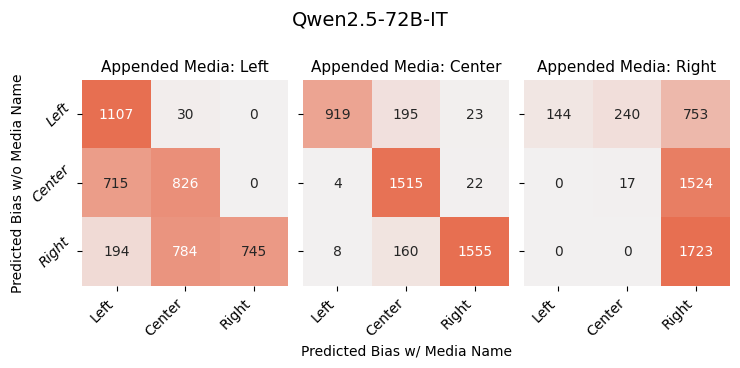

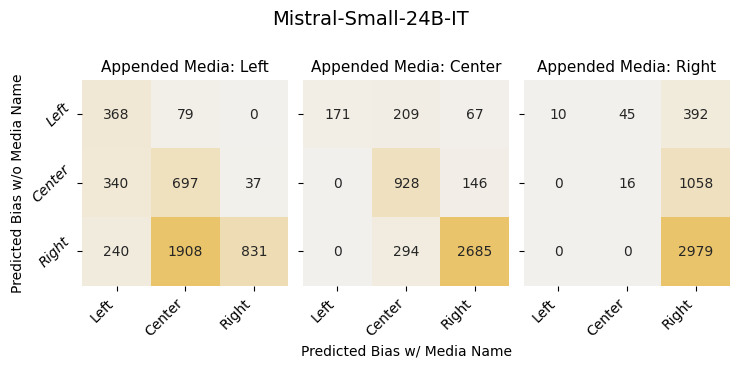

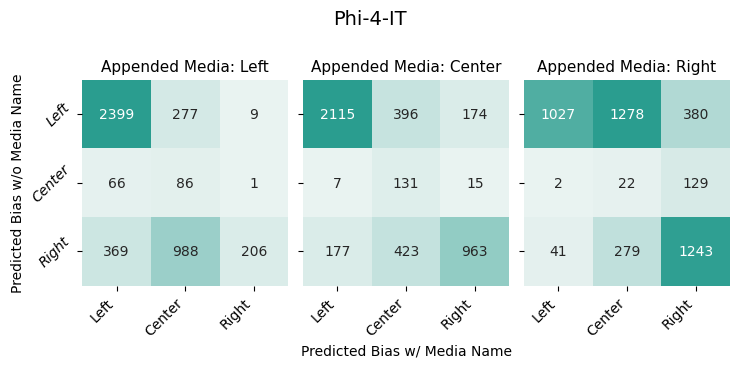

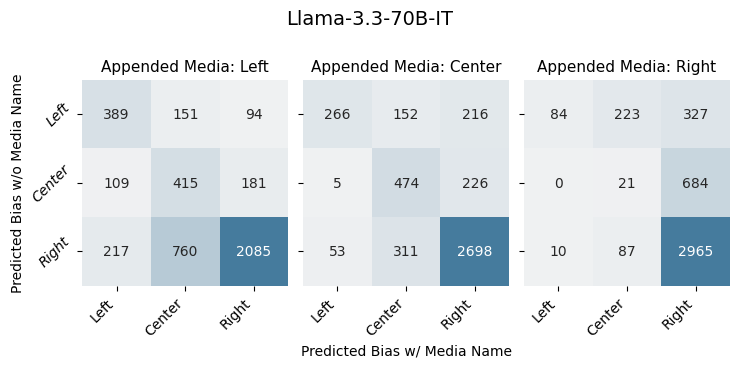

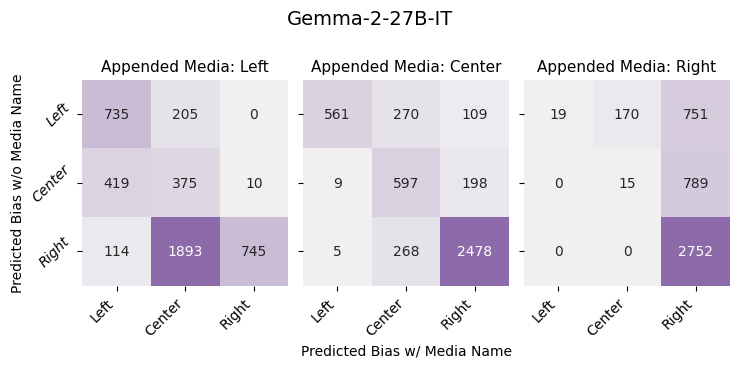

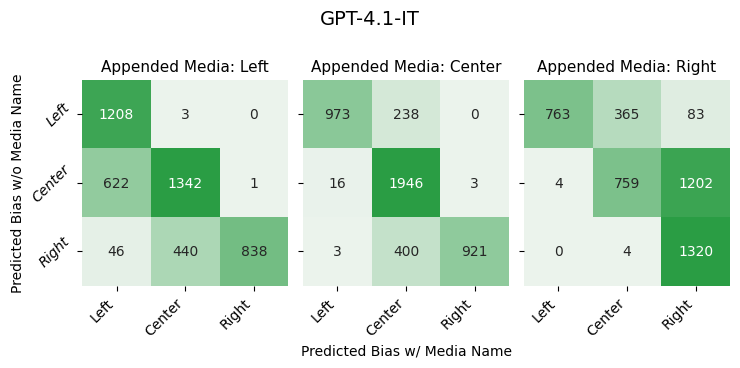

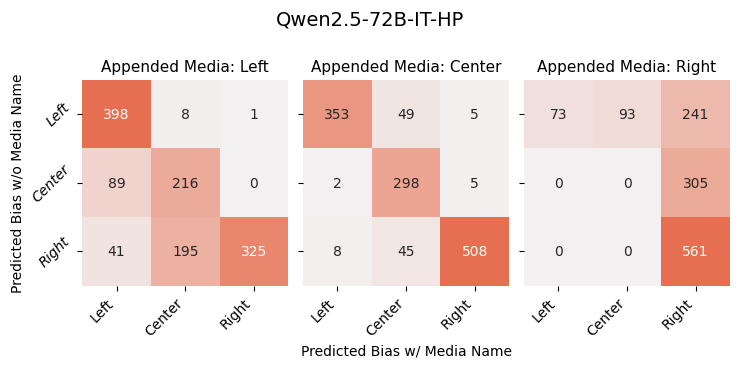

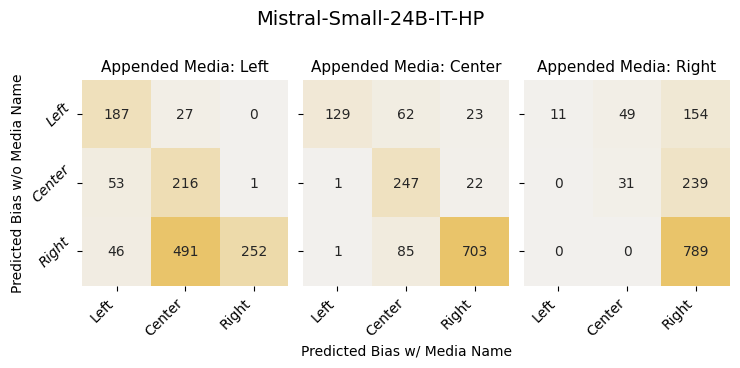

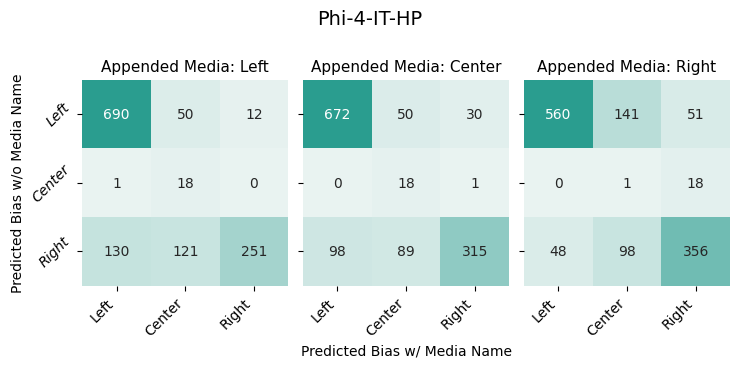

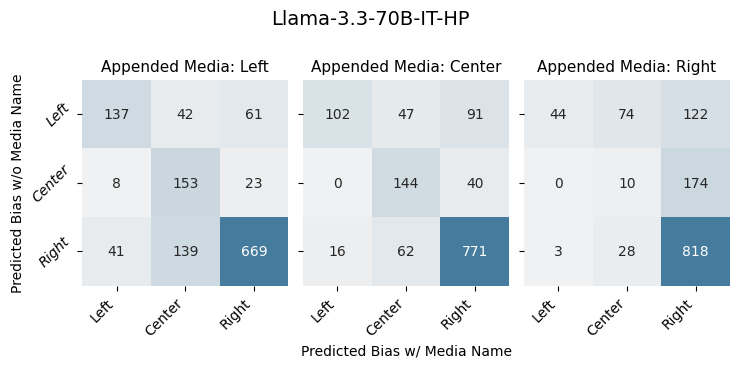

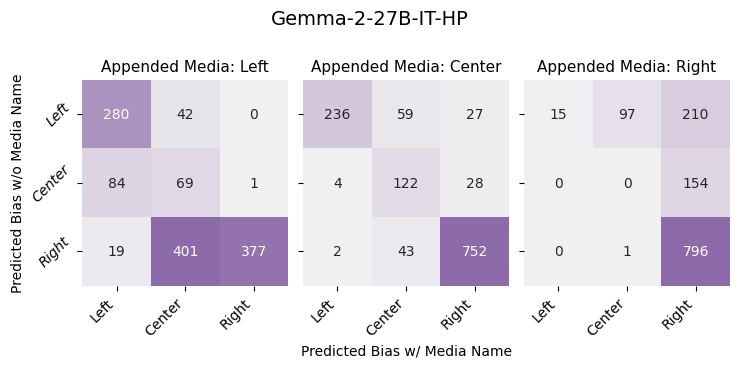

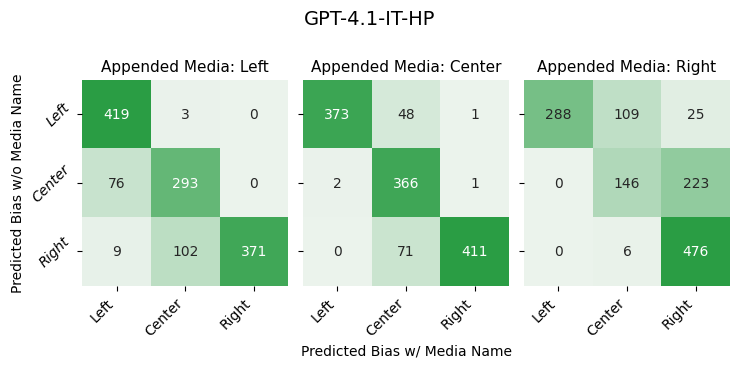

In [141]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# 설정
# -------------------------------------------------
BIAS_LIST = ['left', 'center', 'right']
ORDER = {'left': -2, 'center': 0, 'right': 2}
INV = {-2: 'left', 0: 'center', 2: 'right'}

model_colors = {
    'Qwen2.5-72B-IT':       '#E76F51',
    'Mistral-Small-24B-IT': '#E9C46A',
    'Phi-4-IT':             '#2A9D8F',
    'Llama-3.3-70B-IT':     '#457B9D',
    'Gemma-2-27B-IT':       '#8D6AA9',
    'GPT-4.1-IT':           '#2A9D44',
    'Qwen2.5-72B-IT-HP':    '#E76F51',
    'Mistral-Small-24B-IT-HP': '#E9C46A',
    'Phi-4-IT-HP':          '#2A9D8F',
    'Llama-3.3-70B-IT-HP':  '#457B9D',
    'Gemma-2-27B-IT-HP':    '#8D6AA9',
    'GPT-4.1-IT-HP':        '#2A9D44',
}

# 숫자 → 가장 가까운 bias 라벨
def num2label(v):
    if pd.isna(v):
        return None
    
    # 기준점들과의 거리 계산
    distances = {
        -2: abs(v - (-2)),  # left와의 거리
        0: abs(v - 0),      # center와의 거리
        2: abs(v - 2)       # right와의 거리
    }
    
    # 가장 가까운 기준점 찾기
    closest = min(distances, key=distances.get)
    
    # 해당 기준점에 맞는 라벨 반환
    return INV[closest]

# 출력 경로
out_dir = '../analyze_result/final/appendix_bias_case_analysis/'
os.makedirs(out_dir, exist_ok=True)

# -------------------------------------------------
# 히트맵 플롯 함수
# -------------------------------------------------
def plot_media_vs_none(result_dict, model_name):
    # dict → DataFrame
    df = pd.DataFrame.from_dict(result_dict, orient='index')
    df.index.name = 'ArticleID'
    df = df.reset_index()

    # baseline none_value 라벨
    df['none_label'] = df['none_value'].map(num2label)

    # 1×5 subplot
    fig, axs = plt.subplots(1, len(BIAS_LIST), figsize=(2.5*len(BIAS_LIST), 3.5), sharey=True)
    for i, media in enumerate(BIAS_LIST):
        # media별 예측 라벨
        col = f'{media}_value'
        df['new_label'] = df[col].map(num2label)

        # drop NaNs
        sub = df.dropna(subset=['none_label', 'new_label'])

        # confusion count
        cm = pd.crosstab(
            sub['none_label'],
            sub['new_label']
        ).reindex(index=BIAS_LIST, columns=BIAS_LIST, fill_value=0)

        # palette
        base_color = model_colors.get(model_name, '#333333')
        cmap = sns.light_palette(base_color, as_cmap=True)

        # plot absolute counts
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap=cmap,
            square=True,
            cbar=False,
            ax=axs[i]
        )
        axs[i].set_title("Appended Media: " + media.replace('_',' ').title(), fontsize=11)
        if i == 1:
            axs[i].set_xlabel('Predicted Bias w/ Media Name')
        else:
            axs[i].set_xlabel('')
        if i == 0:
            axs[i].set_ylabel('Predicted Bias w/o Media Name')
        else:
            axs[i].set_ylabel('')
        axs[i].set_xticklabels([l.replace('_',' ').title() for l in BIAS_LIST], rotation=45, ha='right')
        axs[i].set_yticklabels([l.replace('_',' ').title() for l in BIAS_LIST], rotation=45, fontstyle='italic')

    fig.suptitle(f'{model_name}', fontsize=14)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.tight_layout() # rect=[0,0,1,0.95]
    plt.savefig(f'{out_dir}/{model_name}_media_vs_none_counts.png', dpi=300, bbox_inches='tight')
    plt.show()

# -------------------------------------------------
# 실행: 각 모델별
# -------------------------------------------------
main_models = [
    'Qwen2.5-72B-IT',
    'Mistral-Small-24B-IT',
    'Phi-4-IT',
    'Llama-3.3-70B-IT',
    'Gemma-2-27B-IT',
    'GPT-4.1-IT',
    'Qwen2.5-72B-IT-HP',
    'Mistral-Small-24B-IT-HP',
    'Phi-4-IT-HP',
    'Llama-3.3-70B-IT-HP',
    'Gemma-2-27B-IT-HP',
    'GPT-4.1-IT-HP',
]

for model in main_models:
    plot_media_vs_none(all_models[model], model)

In [142]:
import os
import pandas as pd
from collections import Counter

# -------------------------------------------------
# 설정
# -------------------------------------------------
bias_list = ['left', 'center', 'right']
hp_bias_list = ['Hyperpartisan', 'Non-hyperpartisan']

main_models = [
    'Qwen2.5-72B-IT', 'Mistral-Small-24B-IT', 'Phi-4-IT',
    'Llama-3.3-70B-IT', 'Gemma-2-27B-IT', 'GPT-4.1-IT',
]

hp_main_models = [
    'Qwen2.5-72B-IT-HP', 'Mistral-Small-24B-IT-HP', 'Phi-4-IT-HP',
    'Llama-3.3-70B-IT-HP', 'Gemma-2-27B-IT-HP', 'GPT-4.1-IT-HP',
]

keys = ['affected', 'unaffected', 'reversely_affected']

result_dict = {}
counter_dfs = {}

for model in main_models:
    dataset = allsides_dataset_dict
    model_affected_result_dict = bias_affected_id_dict[model]
    model_unaffected_result_dict = bias_unaffected_id_dict[model]
    model_reversely_affected_result_dict = bias_reversly_affected_id_dict[model]
    
    affected_text_bias_list = []
    unaffected_text_bias_list = []
    reversely_affected_text_bias_list = []
    
    model_counter_data = {}
    
    for bias in bias_list:
        bias_affcted_text_bias_list = []
        bias_unaffected_text_bias_list = []
        bias_reversely_affected_text_bias_list = []
        
        for id in model_affected_result_dict[bias]:
            affected_text_bias_list.append(dataset[id]['bias_text'])
            bias_affcted_text_bias_list.append(dataset[id]['bias_text'])
        for id in model_unaffected_result_dict[bias]:
            unaffected_text_bias_list.append(dataset[id]['bias_text'])
            bias_unaffected_text_bias_list.append(dataset[id]['bias_text'])
        for id in model_reversely_affected_result_dict[bias]:
            reversely_affected_text_bias_list.append(dataset[id]['bias_text'])
            bias_reversely_affected_text_bias_list.append(dataset[id]['bias_text'])
            
        affected_counter = Counter(bias_affcted_text_bias_list)
        model_counter_data[f'{bias}_affected'] = affected_counter
        
        unaffected_counter = Counter(bias_unaffected_text_bias_list)
        model_counter_data[f'{bias}_unaffected'] = unaffected_counter
        
        reversely_affected_counter = Counter(bias_reversely_affected_text_bias_list)
        model_counter_data[f'{bias}_reversely_affected'] = reversely_affected_counter
            
    total_affected_counter = Counter(affected_text_bias_list)
    total_unaffected_counter = Counter(unaffected_text_bias_list)
    total_reversely_affected_counter = Counter(reversely_affected_text_bias_list)
    
    model_counter_data['total_affected'] = total_affected_counter
    model_counter_data['total_unaffected'] = total_unaffected_counter
    model_counter_data['total_reversely_affected'] = total_reversely_affected_counter
    
    # 카운터 데이터를 DataFrame으로 변환
    counter_df_dict = {}
    for key, counter in model_counter_data.items():
        counter_df_dict[key] = pd.DataFrame.from_dict(counter, orient='index', columns=['count'])
    
    counter_dfs[model] = counter_df_dict
        
for model in hp_main_models:
    dataset = hyperpartisan_dataset_dict
    model_affected_result_dict = bias_affected_id_dict[model]
    model_unaffected_result_dict = bias_unaffected_id_dict[model]
    model_reversely_affected_result_dict = bias_reversly_affected_id_dict[model]
        
    affected_text_bias_list = []
    unaffected_text_bias_list = []
    reversely_affected_text_bias_list = []
    
    model_counter_data = {}
    
    for bias in bias_list:
        bias_affcted_text_bias_list = []
        bias_unaffected_text_bias_list = []
        bias_reversely_affected_text_bias_list = []
        
        for id in model_affected_result_dict[bias]:
            id_str = str(id).zfill(7)
            affected_text_bias_list.append(dataset[id_str]['bias_text'])
            bias_affcted_text_bias_list.append(dataset[id_str]['bias_text'])
        for id in model_unaffected_result_dict[bias]:
            id_str = str(id).zfill(7)
            unaffected_text_bias_list.append(dataset[id_str]['bias_text'])
            bias_unaffected_text_bias_list.append(dataset[id_str]['bias_text'])
        for id in model_reversely_affected_result_dict[bias]:
            id_str = str(id).zfill(7)
            reversely_affected_text_bias_list.append(dataset[id_str]['bias_text'])
            bias_reversely_affected_text_bias_list.append(dataset[id_str]['bias_text'])
        
        affected_counter = Counter(bias_affcted_text_bias_list)
        model_counter_data[f'{bias}_affected'] = affected_counter
        
        unaffected_counter = Counter(bias_unaffected_text_bias_list)
        model_counter_data[f'{bias}_unaffected'] = unaffected_counter
        
        reversely_affected_counter = Counter(bias_reversely_affected_text_bias_list)
        model_counter_data[f'{bias}_reversely_affected'] = reversely_affected_counter
        
    
    total_affected_counter = Counter(affected_text_bias_list)
    total_unaffected_counter = Counter(unaffected_text_bias_list)
    total_reversely_affected_counter = Counter(reversely_affected_text_bias_list)

    
    model_counter_data['total_affected'] = total_affected_counter
    model_counter_data['total_unaffected'] = total_unaffected_counter
    model_counter_data['total_reversely_affected'] = total_reversely_affected_counter
    
    # 카운터 데이터를 DataFrame으로 변환
    counter_df_dict = {}
    for key, counter in model_counter_data.items():
        counter_df_dict[key] = pd.DataFrame.from_dict(counter, orient='index', columns=['count'])
    
    counter_dfs[model] = counter_df_dict
    
# -------------------------------------------------
# 4. 요약 DataFrame 생성 (count, ratio, rank)
# -------------------------------------------------
summary_reports = {}

for model, dfs in counter_dfs.items():
    rows = []
    # bias_list 와 effect 키를 순회
    for bias in bias_list:
        for effect in keys:  # keys = ['affected','unaffected','reversely_affected']
            key = f"{bias}_{effect}"
            if key not in dfs:
                continue
            # 기존 counter_df 복사
            df = dfs[key].copy().reset_index().rename(columns={'index':'bias_text'})
            total = df['count'].sum()
            # 비율, 순위 컬럼 추가
            df['ratio'] = df['count'] / total
            df['rank']  = df['count'].rank(method='dense', ascending=False).astype(int)
            # bias, effect 정보 컬럼
            df['input_media_bias']   = bias
            df['effect'] = effect
            rows.append(df)
    # 하나의 DataFrame으로 합치기
    if rows:
        summary_df = pd.concat(rows, ignore_index=True)
        # 보기 좋게 정렬
        summary_df = summary_df.sort_values(
            ['input_media_bias','effect','rank'], 
            ascending=[True, True, True]
        ).reset_index(drop=True)
        summary_reports[model] = summary_df

# 예시: Qwen2.5-72B-IT 모델의 결과 확인
print(summary_reports['Qwen2.5-72B-IT'])

out_dir = "/Volumes/data/user04/workspace/1.Project/llm-ppd/code/main/analyze_result/bias_case_analysis/bias_effect_summary"
# 만약 CSV로도 내보내고 싶다면:
for model, df in summary_reports.items():
    df.to_csv(os.path.join(out_dir, f"{model}_bias_effect_summary.csv"), index=False)

/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_99078/3064866680.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_df = pd.concat(rows, ignore_index=True)
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_99078/3064866680.py:158: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_df = pd.concat(rows, ignore_index=True)
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_99078/3064866680.py:158: FutureWarning: The behavior of DataFrame concatenation with 

   bias_text count     ratio  rank input_media_bias              effect
0     center   318  0.348684     1           center            affected
1       left   301  0.330044     2           center            affected
2      right   293  0.321272     3           center            affected
3     center    31  0.476923     1           center  reversely_affected
4       left    24  0.369231     2           center  reversely_affected
5      right    10  0.153846     3           center  reversely_affected
6       left  1175  0.343166     1           center          unaffected
7     center  1151  0.336157     2           center          unaffected
8      right  1098  0.320678     3           center          unaffected
9     center   788  0.385330     1             left            affected
10     right   645  0.315403     2             left            affected
11      left   612  0.299267     3             left            affected
12      left   125  0.416667     1             left  reversely_a

In [24]:
# input media 측면에서 결과 분석
# allsides
qwen2_5_72b_it_log_dir = "../../logs/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias/20250219_145141/result_4400.csv"
mistral_small_24b_it_log_dir = "../../logs/allsides/mistralai/Mistral-Small-24B-Instruct-2501/random_medias/20250221_124715/result_4499.csv"
phi_4_it_log_dir = "../../logs/allsides/microsoft/phi-4/random_medias/20250219_145326/result_4400.csv"
llama_3_3_70b_it_log_dir = "../../logs/allsides/meta-llama/Llama-3.3-70B-Instruct/random_medias/20250219_145234/result_4400.csv"
gemma_2_27b_it_log_dir = "../../logs/allsides/google/gemma-2-27b-it/random_medias/20250410_003055/result_4499.csv"
gpt_4_1_it_log_dir = "../../logs/allsides/gpt-4.1/random_medias/allsides/20250512_160756/result_4499.csv"
gpt_4_1_mini_it_log_dir = "../../logs/allsides/gpt-4.1-mini/random_medias/allsides/20250512_160909/result_4499.csv"
gpt_4_1_nano_it_log_dir = "../../logs/allsides/gpt-4.1-nano/random_medias/allsides/20250512_160924/result_4499.csv"

# hyperpartisan 
qwen2_5_72b_it_hp_log_dir = "../../logs/hyperpartisan/Qwen/Qwen2.5-72B-Instruct/hyperpartisan/20250408_232523/result_1272.csv"
mistral_small_24b_it_hp_log_dir = "../../logs/hyperpartisan/mistralai/Mistral-Small-24B-Instruct-2501/hyperpartisan/20250408_232519/result_1272.csv"
phi_4_it_hp_log_dir = "../../logs/hyperpartisan/microsoft/phi-4/hyperpartisan/20250408_232529/result_1272.csv"
llama_3_3_70b_it_hp_log_dir = "../../logs/hyperpartisan/meta-llama/Llama-3.3-70B-Instruct/hyperpartisan/20250409_033417/result_1272.csv"
gemma_2_27b_it_hp_log_dir = "../../logs/hyperpartisan/google/gemma-2-27b-it/hyperpartisan/20250411_200354/result_1272.csv"
gpt_4_1_it_hp_log_dir = "../../logs/hyperpartisan/gpt-4.1/hyperpartisan/allsides/20250513_090710/result_1272.csv"
gpt_4_1_mini_it_hp_log_dir = "../../logs/hyperpartisan/gpt-4.1-mini/hyperpartisan/allsides/20250513_090747/result_1272.csv"
gpt_4_1_nano_it_hp_log_dir = "../../logs/hyperpartisan/gpt-4.1-nano/hyperpartisan/allsides/20250513_090803/result_1272.csv"

media_qwen_2_5_72b_it_result_dict =  load_log_file_media("../" + qwen2_5_72b_it_log_dir)
media_mistral_small_24b_it_result_dict =  load_log_file_media("../" + mistral_small_24b_it_log_dir)
media_phi_4_it_result_dict =  load_log_file_media("../" + phi_4_it_log_dir)
media_llama_3_3_70b_it_result_dict =  load_log_file_media("../" + llama_3_3_70b_it_log_dir)
media_gemma_2_27b_it_result_dict =  load_log_file_media("../" + gemma_2_27b_it_log_dir)
media_gpt_4_1_it_result_dict =  load_log_file_media("../" + gpt_4_1_it_log_dir)
# media_gpt_4_1_mini_it_result_dict =  load_log_file_media("../" + gpt_4_1_mini_it_log_dir)
# media_gpt_4_1_nano_it_result_dict =  load_log_file_media("../" + gpt_4_1_nano_it_log_dir)

media_qwen_2_5_72b_it_hp_result_dict =  load_log_file_media("../" + qwen2_5_72b_it_hp_log_dir)
media_mistral_small_24b_it_hp_result_dict =  load_log_file_media("../" + mistral_small_24b_it_hp_log_dir)
media_phi_4_it_hp_result_dict =  load_log_file_media("../" + phi_4_it_hp_log_dir)
media_llama_3_3_70b_it_hp_result_dict =  load_log_file_media("../" + llama_3_3_70b_it_hp_log_dir)
media_gemma_2_27b_it_hp_result_dict =  load_log_file_media("../" + gemma_2_27b_it_hp_log_dir)
media_gpt_4_1_it_hp_result_dict =  load_log_file_media("../" + gpt_4_1_it_hp_log_dir)
# media_gpt_4_1_mini_it_hp_result_dict =  load_log_file_media("../" + gpt_4_1_mini_it_hp_log_dir)
# media_gpt_4_1_nano_it_hp_result_dict =  load_log_file_media("../" + gpt_4_1_nano_it_hp_log_dir)

media_model_result_dict = {
    'Qwen2.5-72B-IT': media_qwen_2_5_72b_it_result_dict,
    'Mistral-Small-24B-IT': media_mistral_small_24b_it_result_dict,
    'Phi-4-IT': media_phi_4_it_result_dict,
    'Llama-3.3-70B-IT': media_llama_3_3_70b_it_result_dict,
    'Gemma-2-27B-IT': media_gemma_2_27b_it_result_dict,
    'GPT-4.1-IT': media_gpt_4_1_it_result_dict,
    # 'GPT-4.1-mini-IT': media_gpt_4_1_mini_it_result_dict,
    # 'GPT-4.1-nano-IT': media_gpt_4_1_nano_it_result_dict,
    
    'Qwen2.5-72B-IT-HP': media_qwen_2_5_72b_it_hp_result_dict,
    'Mistral-Small-24B-IT-HP': media_mistral_small_24b_it_hp_result_dict,
    'Phi-4-IT-HP': media_phi_4_it_hp_result_dict,
    'Llama-3.3-70B-IT-HP': media_llama_3_3_70b_it_hp_result_dict,
    'Gemma-2-27B-IT-HP': media_gemma_2_27b_it_hp_result_dict,
    'GPT-4.1-IT-HP': media_gpt_4_1_it_hp_result_dict,
    # 'GPT-4.1-mini-IT-HP': media_gpt_4_1_mini_it_hp_result_dict,
    # 'GPT-4.1-nano-IT-HP': media_gpt_4_1_nano_it_hp_result_dict,
}

media_impact_dict = {}

for model, result_dict in tqdm(media_model_result_dict.items()):
    media_impact_dict[model] = {"ap": [], "guardian": [], "huffpost": [], "bbc": [], "forbes": [], "cnbc": [], "fox": [], "daily_mail": [], "breitbart": []}
    for id in result_dict.keys():
        ap_diff = result_dict[id]['ap_diff']
        guardian_diff = result_dict[id]['guardian_diff']
        huffpost_diff = result_dict[id]['huffpost_diff']
        
        bbc_diff = result_dict[id]['bbc_diff']
        forbes_diff = result_dict[id]['forbes_diff']
        cnbc_diff = result_dict[id]['cnbc_diff']
        
        fox_diff = result_dict[id]['fox_diff']
        daily_mail_diff = result_dict[id]['daily_mail_diff']
        breitbart_diff = result_dict[id]['breitbart_diff']
        
        media_impact_dict[model]['ap'].append(ap_diff)
        media_impact_dict[model]['guardian'].append(guardian_diff)
        media_impact_dict[model]['huffpost'].append(huffpost_diff)
        
        media_impact_dict[model]['bbc'].append(bbc_diff)
        media_impact_dict[model]['forbes'].append(forbes_diff)
        media_impact_dict[model]['cnbc'].append(cnbc_diff)
        
        media_impact_dict[model]['fox'].append(fox_diff)
        media_impact_dict[model]['daily_mail'].append(daily_mail_diff)
        media_impact_dict[model]['breitbart'].append(breitbart_diff)
        
    media_impact_dict[model]["avg_ap"] = np.nanmean(media_impact_dict[model]["ap"])
    media_impact_dict[model]["std_ap"] = np.nanstd(media_impact_dict[model]["ap"])
    media_impact_dict[model]["avg_guardian"] = np.nanmean(media_impact_dict[model]["guardian"])
    media_impact_dict[model]["std_guardian"] = np.nanstd(media_impact_dict[model]["guardian"])
    media_impact_dict[model]["avg_huffpost"] = np.nanmean(media_impact_dict[model]["huffpost"])
    media_impact_dict[model]["std_huffpost"] = np.nanstd(media_impact_dict[model]["huffpost"])
    
    media_impact_dict[model]["avg_bbc"] = np.nanmean(media_impact_dict[model]["bbc"])
    media_impact_dict[model]["std_bbc"] = np.nanstd(media_impact_dict[model]["bbc"])
    media_impact_dict[model]["avg_forbes"] = np.nanmean(media_impact_dict[model]["forbes"])
    media_impact_dict[model]["std_forbes"] = np.nanstd(media_impact_dict[model]["forbes"])
    media_impact_dict[model]["avg_cnbc"] = np.nanmean(media_impact_dict[model]["cnbc"])
    media_impact_dict[model]["std_cnbc"] = np.nanstd(media_impact_dict[model]["cnbc"])
    
    media_impact_dict[model]["avg_fox"] = np.nanmean(media_impact_dict[model]["fox"])
    media_impact_dict[model]["std_fox"] = np.nanstd(media_impact_dict[model]["fox"])
    media_impact_dict[model]["avg_daily_mail"] = np.nanmean(media_impact_dict[model]["daily_mail"])
    media_impact_dict[model]["std_daily_mail"] = np.nanstd(media_impact_dict[model]["daily_mail"])
    media_impact_dict[model]["avg_breitbart"] = np.nanmean(media_impact_dict[model]["breitbart"])
    media_impact_dict[model]["std_breitbart"] = np.nanstd(media_impact_dict[model]["breitbart"])
    
result_df = pd.DataFrame(media_impact_dict)
result_df = result_df.T
media_impact_df = result_df.drop(columns=['ap', 'guardian', 'huffpost', 'bbc', 'forbes', 'cnbc', 'fox', 'daily_mail', 'breitbart'])
media_impact_df.to_csv("../analyze_result/bias_case_analysis/media_impact_df.csv")

100%|██████████| 12/12 [00:00<00:00, 198.42it/s]


In [27]:
for k, v in media_qwen_2_5_72b_it_result_dict.items():
    print(k)
    print(v)
    break


,avg_ap,std_ap,avg_guardian,std_guardian,avg_huffpost,std_huffpost,avg_bbc,std_bbc,avg_forbes,std_forbes,avg_cnbc,std_cnbc,avg_fox,std_fox,avg_daily_mail,std_daily_mail,avg_breitbart,std_breitbart
Unnamed: 0,,,,,,,,,,,,,,,,,,
Qwen2.5-72B-IT,-0.001818,0.843056,-1.112474,1.514103,-1.250170,1.554696,-0.079527,0.944755,0.106339,0.719488,-0.004544,0.657730,1.581459,1.559619,1.339241,1.486019,1.542831,1.549617
Mistral-Small-24B-IT,-0.172889,1.009014,-1.316000,1.699323,-2.004889,1.847755,-0.344444,1.075599,0.409333,1.040727,0.032444,0.896321,0.834667,1.303755,0.797333,1.290234,0.861778,1.324473
Phi-4-IT,-0.049989,1.551143,-1.282436,1.852179,-0.783458,1.676565,-0.381277,1.633843,0.280391,1.557356,0.082708,1.593121,1.502840,1.987476,0.102249,1.607610,1.129289,1.967206
Llama-3.3-70B-IT,-0.075437,1.354212,-0.544545,1.755981,-0.432727,1.704545,-0.091364,1.417366,0.254033,1.318251,0.160418,1.320554,0.741195,1.411658,0.388548,1.345850,0.773915,1.410839
Gemma-2-27B-IT,0.284253,1.098438,-1.740601,1.711932,-2.011566,1.784136,0.065406,1.113850,0.379617,1.142727,0.092992,1.039929,1.143683,1.593692,0.923043,1.486398,1.172598,1.611380
GPT-4.1-IT,-0.038222,0.895597,-0.484889,0.915299,-0.753778,1.094145,-0.035556,0.891729,0.002222,0.714917,-0.146222,0.744130,0.793333,1.088506,0.417778,0.861856,0.983111,1.212043
Qwen2.5-72B-IT-HP,-0.003142,0.796688,-0.780833,1.458473,-0.843676,1.483582,-0.023566,0.880661,0.053417,0.766731,-0.028280,0.726008,1.478397,1.662312,1.228594,1.567161,1.464258,1.658756
Mistral-Small-24B-IT-HP,-0.056559,0.922754,-1.156324,1.651939,-1.725059,1.864998,-0.268657,1.048741,0.326787,1.075346,0.007855,0.888046,0.904949,1.432838,0.793401,1.405484,1.052632,1.507633
Phi-4-IT-HP,-0.235664,1.543631,-0.752553,1.663587,-0.472899,1.514350,-0.449332,1.587209,-0.142969,1.487835,-0.179104,1.491311,0.433621,1.696686,-0.284368,1.540513,0.227808,1.693279


In [25]:
media_impact_dict_only_center = {}

for model, result_dict in tqdm(media_model_result_dict.items()):
    if model.endswith('-HP'):
        data_dict = hyperpartisan_dataset_dict
    else:
        data_dict = allsides_dataset_dict
        
    media_impact_dict_only_center[model] = {"ap": [], "guardian": [], "huffpost": [], "bbc": [], "forbes": [], "cnbc": [], "fox": [], "daily_mail": [], "breitbart": []}
    for id in result_dict.keys():
        if model.endswith('-HP'):
            if data_dict[str(id).zfill(7)]['bias_text'] != "Non-hyperpartisan":
                continue
        else:
            if data_dict[id]['bias_text'] != "center":
                continue
        
        ap_diff = result_dict[id]['ap_diff']
        guardian_diff = result_dict[id]['guardian_diff']
        huffpost_diff = result_dict[id]['huffpost_diff']
        
        bbc_diff = result_dict[id]['bbc_diff']
        forbes_diff = result_dict[id]['forbes_diff']
        cnbc_diff = result_dict[id]['cnbc_diff']
        
        fox_diff = result_dict[id]['fox_diff']
        daily_mail_diff = result_dict[id]['daily_mail_diff']
        breitbart_diff = result_dict[id]['breitbart_diff']
        
        media_impact_dict_only_center[model]['ap'].append(ap_diff)
        media_impact_dict_only_center[model]['guardian'].append(guardian_diff)
        media_impact_dict_only_center[model]['huffpost'].append(huffpost_diff)
        
        media_impact_dict_only_center[model]['bbc'].append(bbc_diff)
        media_impact_dict_only_center[model]['forbes'].append(forbes_diff)
        media_impact_dict_only_center[model]['cnbc'].append(cnbc_diff)
        
        media_impact_dict_only_center[model]['fox'].append(fox_diff)
        media_impact_dict_only_center[model]['daily_mail'].append(daily_mail_diff)
        media_impact_dict_only_center[model]['breitbart'].append(breitbart_diff)
        
    media_impact_dict_only_center[model]["avg_ap"] = np.nanmean(media_impact_dict_only_center[model]["ap"])
    media_impact_dict_only_center[model]["std_ap"] = np.nanstd(media_impact_dict_only_center[model]["ap"])
    media_impact_dict_only_center[model]["avg_guardian"] = np.nanmean(media_impact_dict_only_center[model]["guardian"])
    media_impact_dict_only_center[model]["std_guardian"] = np.nanstd(media_impact_dict_only_center[model]["guardian"])
    media_impact_dict_only_center[model]["avg_huffpost"] = np.nanmean(media_impact_dict_only_center[model]["huffpost"])
    media_impact_dict_only_center[model]["std_huffpost"] = np.nanstd(media_impact_dict_only_center[model]["huffpost"])
    
    media_impact_dict_only_center[model]["avg_bbc"] = np.nanmean(media_impact_dict_only_center[model]["bbc"])
    media_impact_dict_only_center[model]["std_bbc"] = np.nanstd(media_impact_dict_only_center[model]["bbc"])
    media_impact_dict_only_center[model]["avg_forbes"] = np.nanmean(media_impact_dict_only_center[model]["forbes"])
    media_impact_dict_only_center[model]["std_forbes"] = np.nanstd(media_impact_dict_only_center[model]["forbes"])
    media_impact_dict_only_center[model]["avg_cnbc"] = np.nanmean(media_impact_dict_only_center[model]["cnbc"])
    media_impact_dict_only_center[model]["std_cnbc"] = np.nanstd(media_impact_dict_only_center[model]["cnbc"])
    
    media_impact_dict_only_center[model]["avg_fox"] = np.nanmean(media_impact_dict_only_center[model]["fox"])
    media_impact_dict_only_center[model]["std_fox"] = np.nanstd(media_impact_dict_only_center[model]["fox"])
    media_impact_dict_only_center[model]["avg_daily_mail"] = np.nanmean(media_impact_dict_only_center[model]["daily_mail"])
    media_impact_dict_only_center[model]["std_daily_mail"] = np.nanstd(media_impact_dict_only_center[model]["daily_mail"])
    media_impact_dict_only_center[model]["avg_breitbart"] = np.nanmean(media_impact_dict_only_center[model]["breitbart"])
    media_impact_dict_only_center[model]["std_breitbart"] = np.nanstd(media_impact_dict_only_center[model]["breitbart"])
    
result_df = pd.DataFrame(media_impact_dict_only_center)
result_df = result_df.T
media_impact_df = result_df.drop(columns=['ap', 'guardian', 'huffpost', 'bbc', 'forbes', 'cnbc', 'fox', 'daily_mail', 'breitbart'])
# media_impact_df.to_csv("../analyze_result/bias_case_analysis/media_impact_only_center_df.csv")

100%|██████████| 12/12 [00:00<00:00, 339.04it/s]


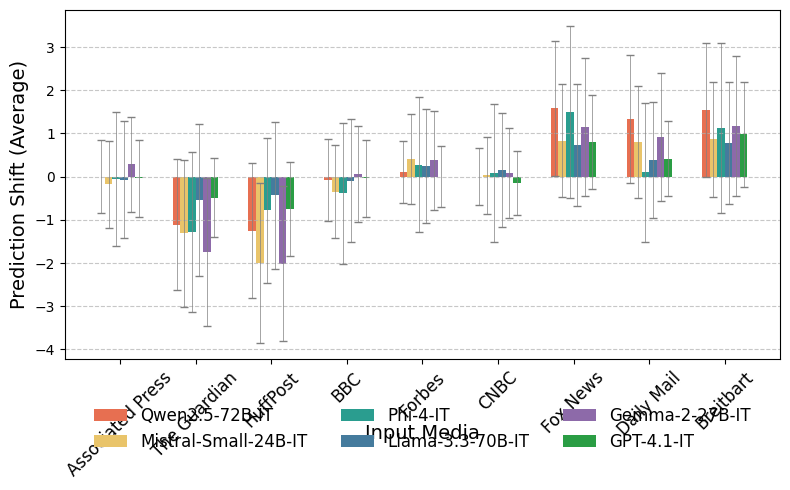

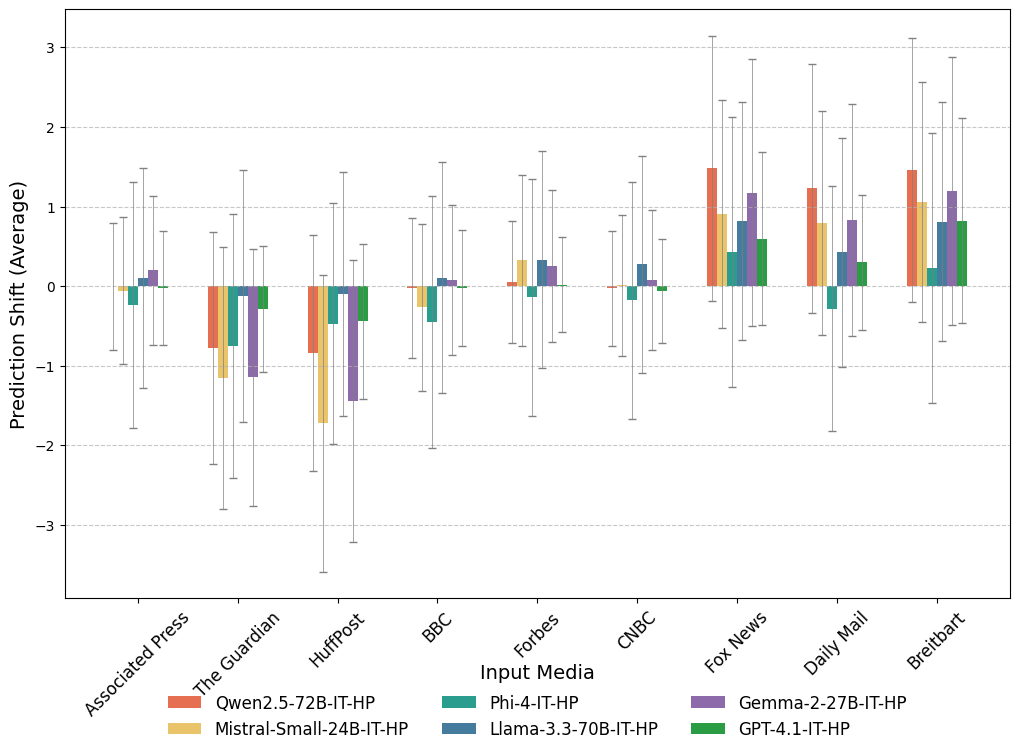

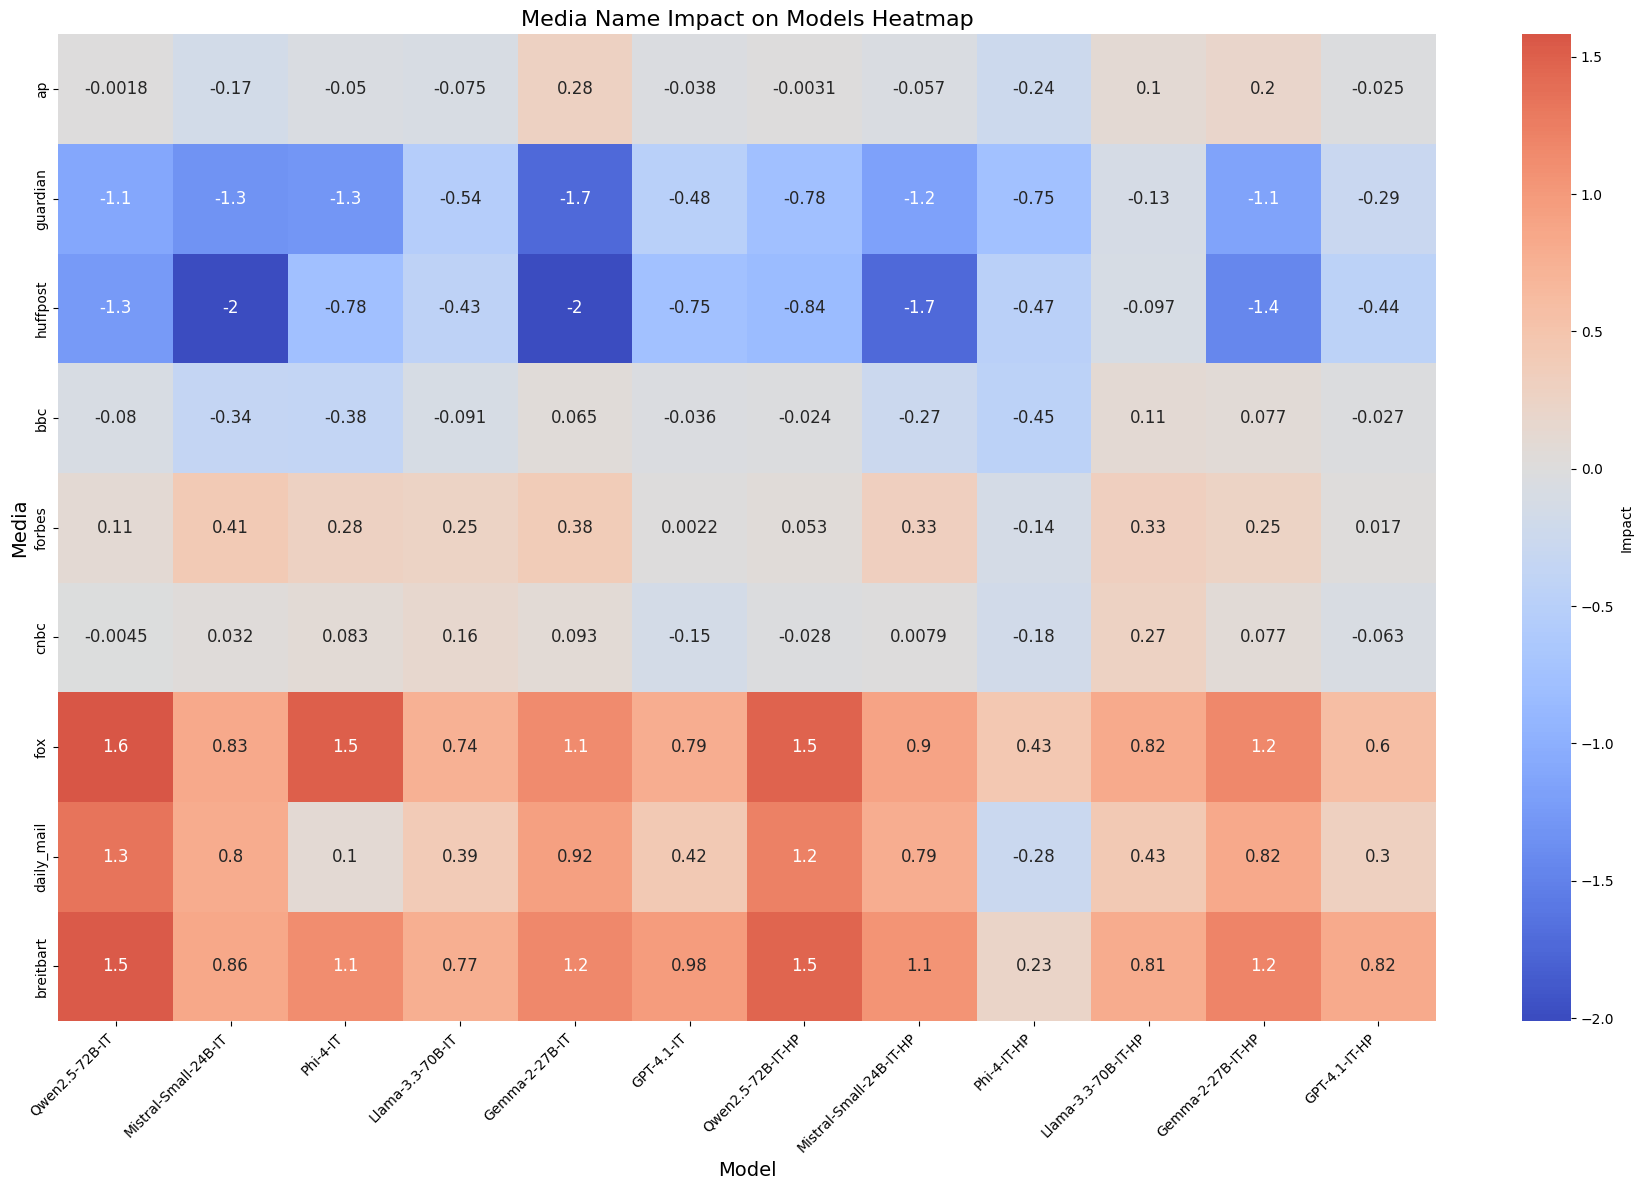

In [26]:
model_colors = {
    # IT 모델
    'Qwen2.5-72B-IT': '#E76F51',
    'Mistral-Small-24B-IT': '#E9C46A',
    'Phi-4-IT': '#2A9D8F',
    'Llama-3.3-70B-IT': '#457B9D',
    'Gemma-2-27B-IT': '#8D6AA9',
    'GPT-4.1-IT': '#2A9D44',
    
    # HP(Hyperpartisan) 모델
    'Qwen2.5-72B-IT-HP': '#E76F51',
    'Mistral-Small-24B-IT-HP': '#E9C46A',
    'Phi-4-IT-HP': '#2A9D8F',
    'Llama-3.3-70B-IT-HP': '#457B9D',
    'Gemma-2-27B-IT-HP': '#8D6AA9',
    'GPT-4.1-IT-HP': '#2A9D44',

    # 크기별 Qwen 모델
    'Qwen2.5-32B-IT': '#EA8D6E',
    'Qwen2.5-14B-IT': '#EDAA8C',
    'Qwen2.5-7B-IT': '#F0C6AA',
    'Qwen2.5-3B-IT': '#F4E3C8',
    'Qwen2.5-1.5B-IT': '#F7F0E6',
    'Qwen2.5-0.5B-IT': '#FAFDFF',
    
    # Non-IT 모델
    'Qwen2.5-72B-Base': '#E76F51',
    'Qwen2.5-32B-Base': '#EA8D6E',
    'Qwen2.5-14B-Base': '#EDAA8C',
    'Qwen2.5-7B-Base': '#F0C6AA',
    'Qwen2.5-3B-Base': '#F4E3C8',
    'Qwen2.5-1.5B-Base': '#F7F0E6',
    'Qwen2.5-0.5B-Base': '#FAFDFF',
    
    'Llama-3.1-70B-IT': '#1F4E79',
    'Llama-3.1-8B-IT': '#6BAED6',
    'Llama-3-70B-IT': '#142F43',
    'Llama-3-8B-IT': '#BDD7E7',
    
    'GPT-4.1-IT': '#2A9D44',
    'GPT-4.1-mini-IT': '#55B069',
    'GPT-4.1-nano-IT': '#7FC48F',
    
    'Llama-3.1-70B-Base': '#1F4E79',
    'Llama-3.1-8B-Base': '#6BAED6',
    'Mistral-Small-24B-Base': '#E9C46A',
    
    'QwQ-32B-IT': '#C2185B',
}

media_impact_df = pd.read_csv("../analyze_result/bias_case_analysis/media_impact_df.csv")
# 인덱스 설정 (첫 번째 열을 인덱스로 사용)
media_impact_df = media_impact_df.set_index('Unnamed: 0')

# 미디어 영향 시각화
# plt.figure(figsize=(10.3, 7.4))
plt.figure(figsize=((8, 5)))

# 미디어 목록
medias = ['ap', 'guardian', 'huffpost', 'bbc', 'forbes', 'cnbc', 'fox', 'daily_mail', 'breitbart']
# 모델 목록 (HP 모델 제외)
models = [m for m in media_impact_df.index if isinstance(m, str) and not m.endswith('-HP') and m != "GPT-4.1-mini-IT" and m != "GPT-4.1-nano-IT"]

# 바 차트 그리기
bar_width = 0.1
index = np.arange(len(medias))

for i, model in enumerate(models):
    avg_values = [media_impact_df.loc[model, f'avg_{media}'] for media in medias]
    color = model_colors.get(model, plt.cm.tab10(i % 10))  # 모델 색상 사용, 없으면 기본 색상
    plt.bar(index + i*bar_width, avg_values, bar_width, label=model, color=color)
    
    # 에러바 추가
    std_values = [media_impact_df.loc[model, f'std_{media}'] for media in medias]
    plt.errorbar(index + i*bar_width, avg_values, yerr=std_values, fmt='none', ecolor='gray', capsize=3, elinewidth=0.5)

# 미디어 이름을 원본으로 변경
media_original_names = ['Associated Press', 'The Guardian', 'HuffPost', 'BBC', 'Forbes', 'CNBC', 'Fox News', 'Daily Mail', 'Breitbart']

plt.xlabel('Input Media', fontsize=14, labelpad=-40)
plt.ylabel('Prediction Shift (Average)', fontsize=14)
# plt.title('Media Outlet Impact on Models', fontsize=16)
plt.xticks(index + bar_width * (len(models) / 2 - 0.5), media_original_names, rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12, frameon=False)
plt.savefig("../analyze_result/final/media_impact_models.png", dpi=300, bbox_inches='tight')

# HP 모델 시각화
plt.figure(figsize=(10.3, 7.4))

# HP 모델 목록
hp_models = [m for m in media_impact_df.index if isinstance(m, str) and m.endswith('-HP') and m != "GPT-4.1-mini-IT-HP" and m != "GPT-4.1-nano-IT-HP"]

# 바 차트 그리기
for i, model in enumerate(hp_models):
    avg_values = [media_impact_df.loc[model, f'avg_{media}'] for media in medias]
    color = model_colors.get(model, plt.cm.tab10(i % 10))  # 모델 색상 사용, 없으면 기본 색상
    plt.bar(index + i*bar_width, avg_values, bar_width, label=model, color=color)
    
    # 에러바 추가
    std_values = [media_impact_df.loc[model, f'std_{media}'] for media in medias]
    plt.errorbar(index + i*bar_width, avg_values, yerr=std_values, fmt='none', ecolor='gray', capsize=3, elinewidth=0.5)


plt.xlabel('Input Media', fontsize=14, labelpad=-40)
plt.ylabel('Prediction Shift (Average)', fontsize=14)
# plt.title('Media Outlet Impact on Models', fontsize=16)
plt.xticks(index + bar_width * (len(models) / 2 - 0.5), media_original_names, rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3, fontsize=12, frameon=False)
plt.savefig("../analyze_result/final/media_impact_hp_models.png", dpi=300, bbox_inches='tight')

# 히트맵으로 시각화
plt.figure(figsize=(18, 12))

# 데이터 준비
heatmap_data = []
for media in medias:
    row = []
    for model in media_impact_df.index:
        row.append(media_impact_df.loc[model, f'avg_{media}'])
    heatmap_data.append(row)

# 히트맵 그리기
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0,
            xticklabels=media_impact_df.index, yticklabels=medias,
            cbar_kws={'label': 'Impact'}, annot_kws={'fontsize': 12})
plt.title('Media Name Impact on Models Heatmap', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Media', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("../analyze_result/final/media_impact_heatmap.png", dpi=300, bbox_inches='tight')

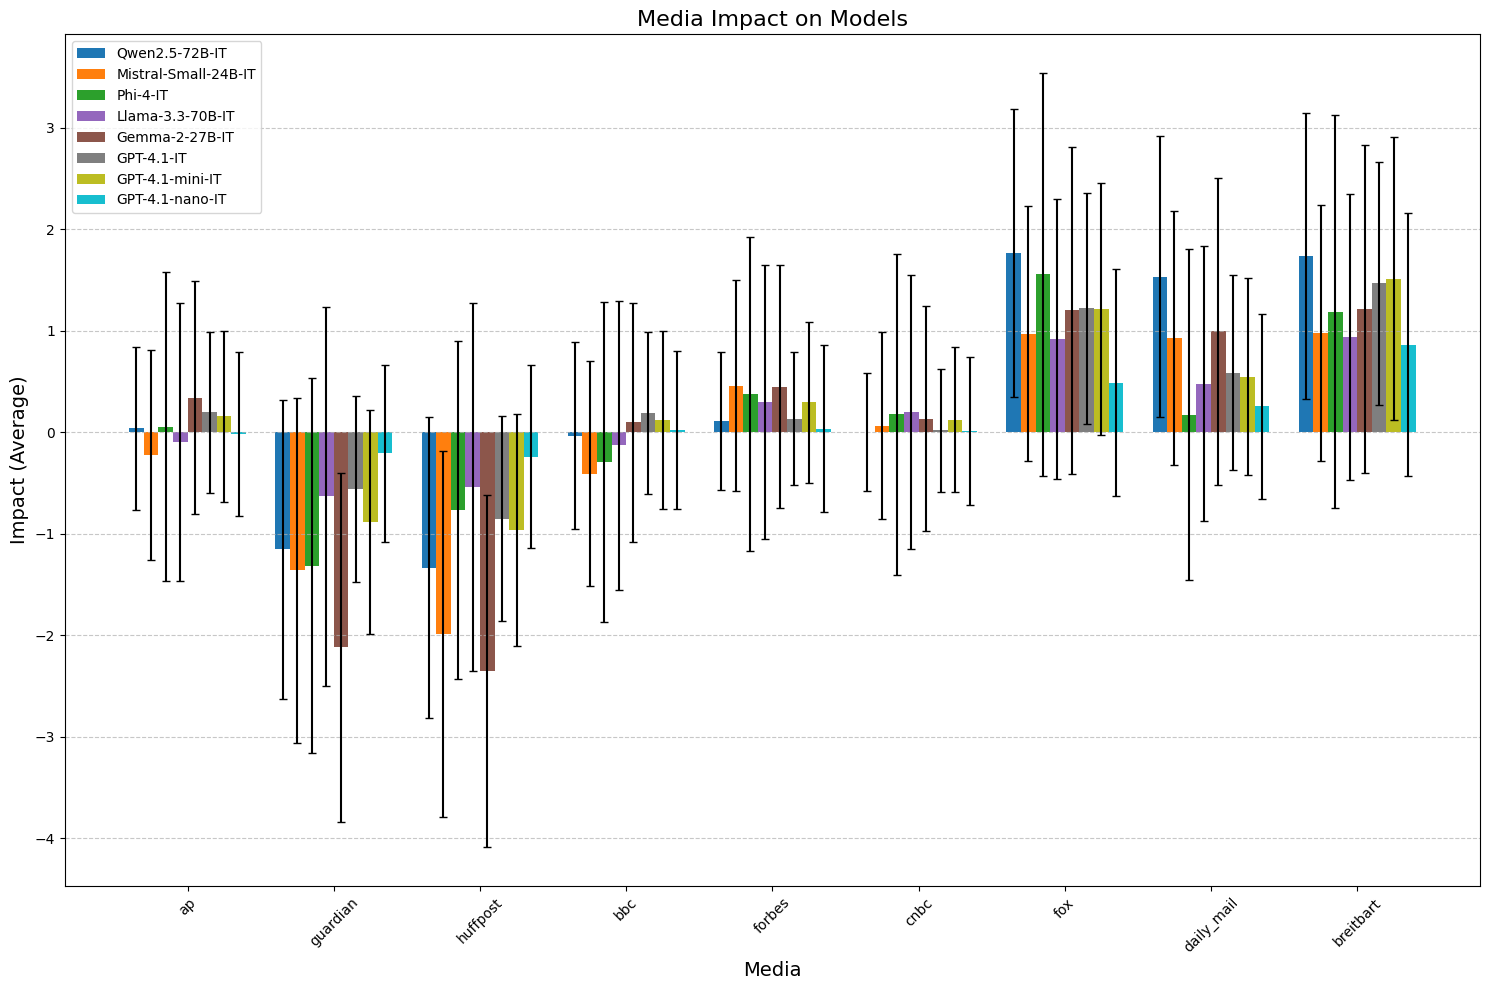

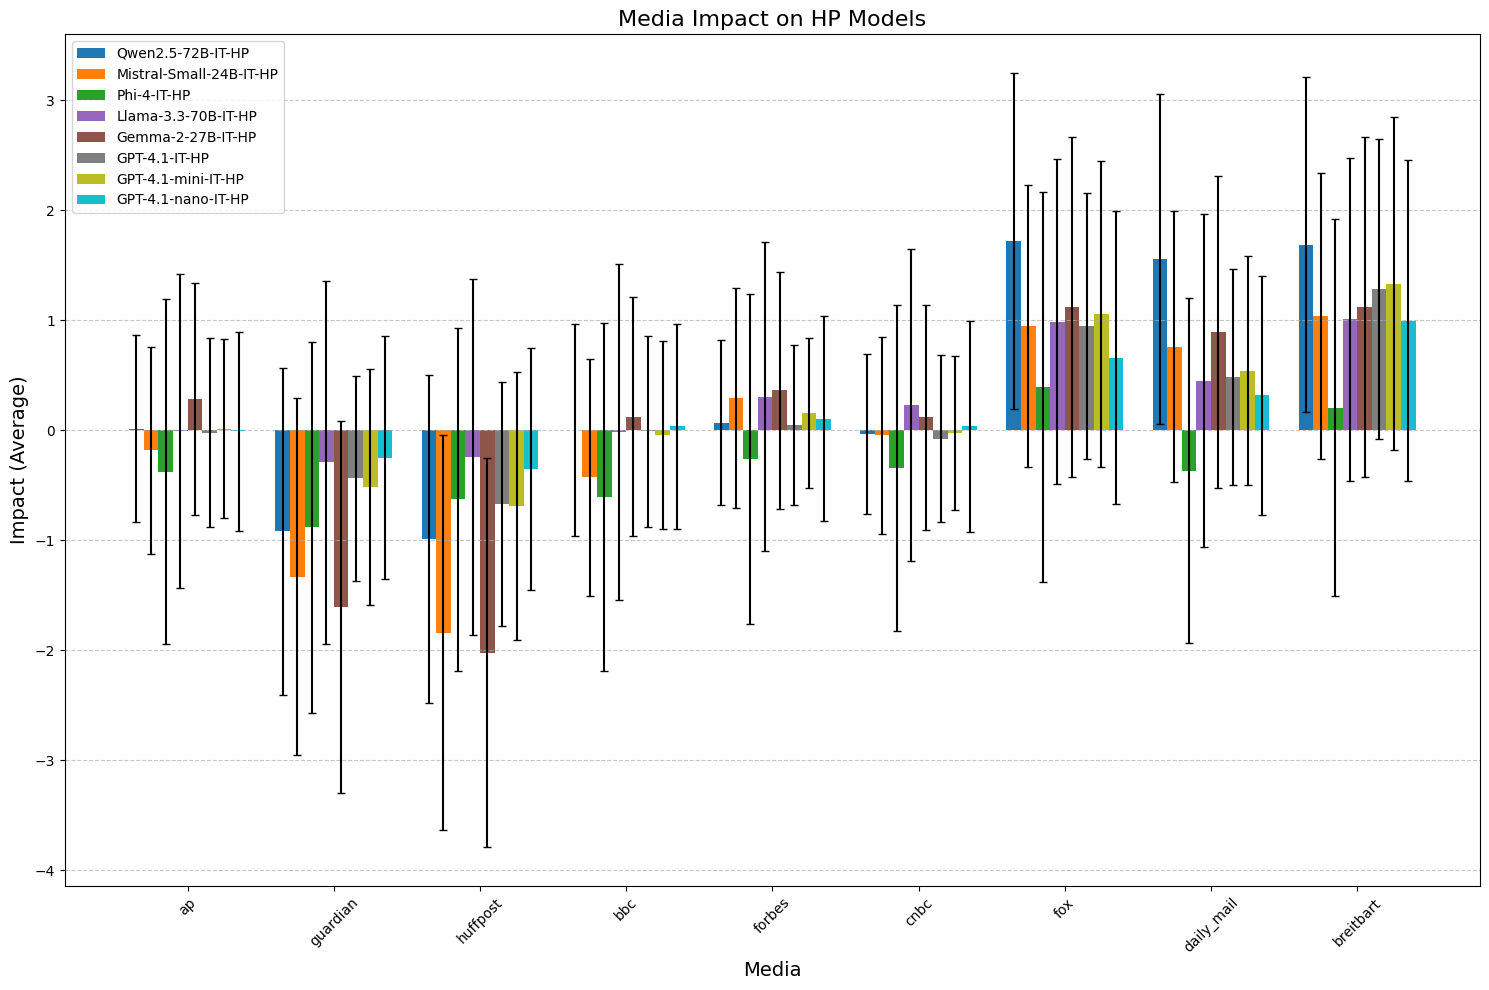

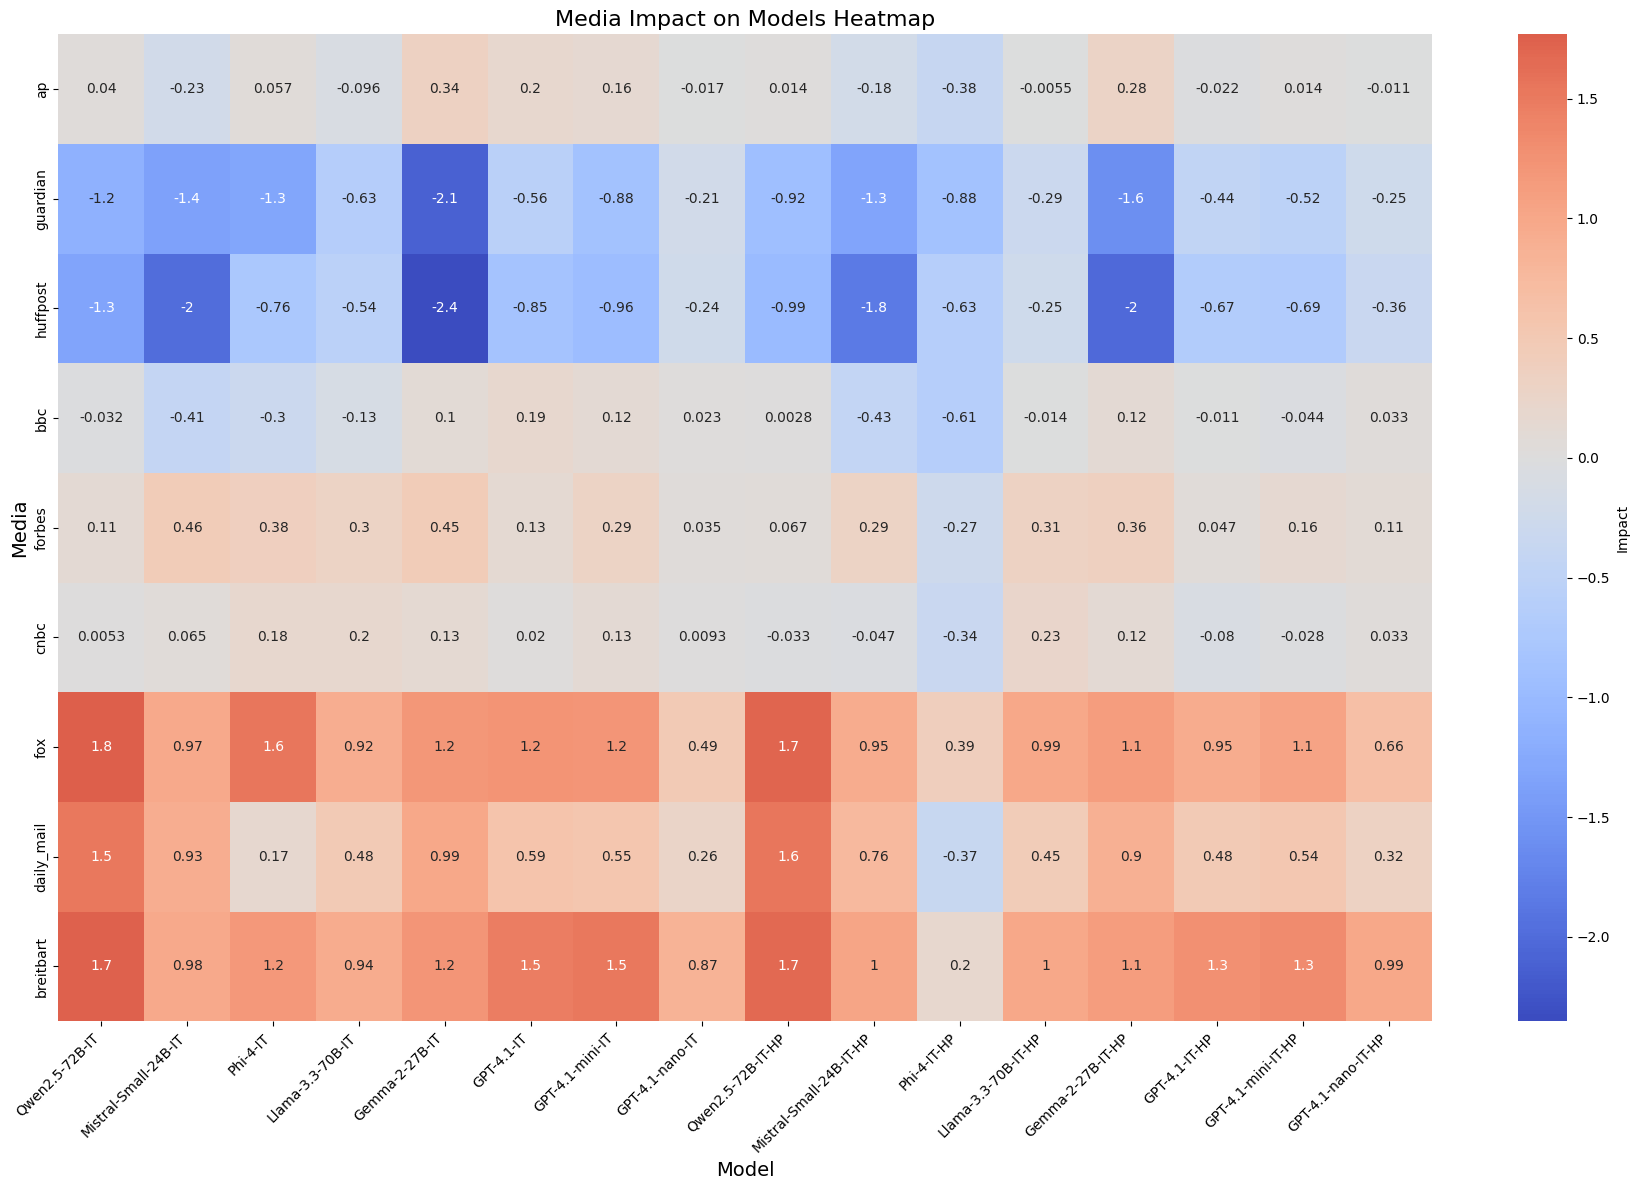

<Figure size 1500x1000 with 0 Axes>

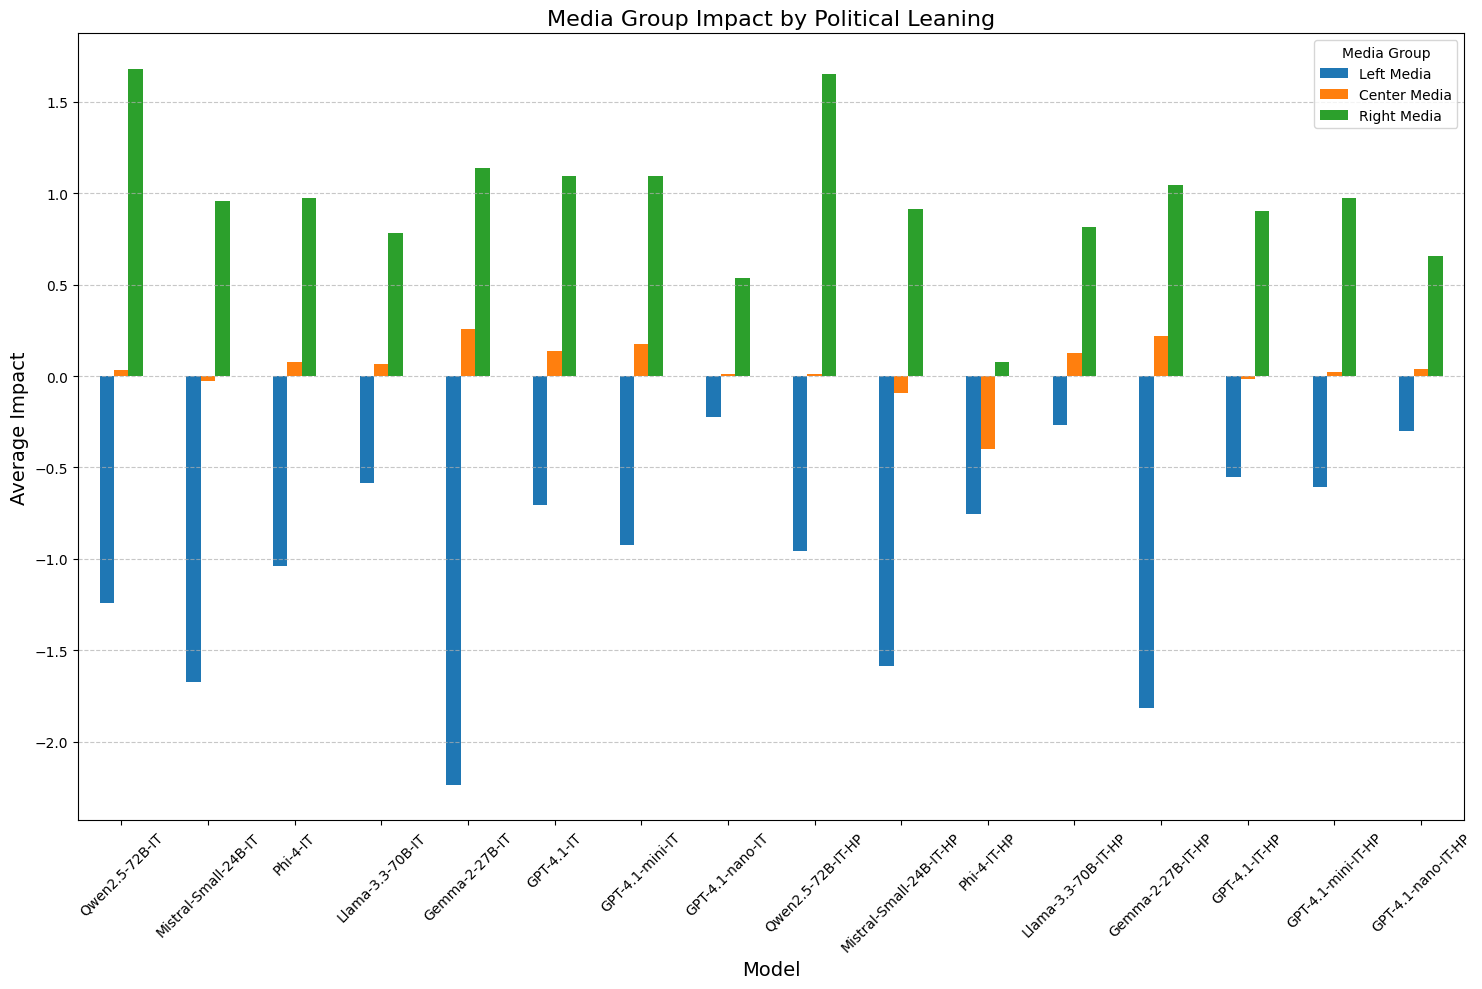

In [18]:
media_impact_df = pd.read_csv("../analyze_result/bias_case_analysis/media_impact_only_center_df.csv")
# 인덱스 설정 (첫 번째 열을 인덱스로 사용)
media_impact_df = media_impact_df.set_index('Unnamed: 0')


# 미디어 영향 시각화
plt.figure(figsize=(15, 10))

# 미디어 목록
medias = ['ap', 'guardian', 'huffpost', 'bbc', 'forbes', 'cnbc', 'fox', 'daily_mail', 'breitbart']
# 모델 목록 (HP 모델 제외)
models = [m for m in media_impact_df.index if isinstance(m, str) and not m.endswith('-HP')]
# 색상 설정
colors = plt.cm.tab10(np.linspace(0, 1, len(models)))

# 바 차트 그리기
bar_width = 0.1
index = np.arange(len(medias))

for i, model in enumerate(models):
    avg_values = [media_impact_df.loc[model, f'avg_{media}'] for media in medias]
    plt.bar(index + i*bar_width, avg_values, bar_width, label=model, color=colors[i])
    
    # 에러바 추가
    std_values = [media_impact_df.loc[model, f'std_{media}'] for media in medias]
    plt.errorbar(index + i*bar_width, avg_values, yerr=std_values, fmt='none', ecolor='black', capsize=3)

plt.xlabel('Media', fontsize=14)
plt.ylabel('Impact (Average)', fontsize=14)
plt.title('Media Impact on Models', fontsize=16)
plt.xticks(index + bar_width * (len(models) / 2 - 0.5), medias, rotation=45)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# HP 모델 시각화
plt.figure(figsize=(15, 10))

# HP 모델 목록
hp_models = [m for m in media_impact_df.index if isinstance(m, str) and m.endswith('-HP')]
# 색상 설정
hp_colors = plt.cm.tab10(np.linspace(0, 1, len(hp_models)))

# 바 차트 그리기
for i, model in enumerate(hp_models):
    avg_values = [media_impact_df.loc[model, f'avg_{media}'] for media in medias]
    plt.bar(index + i*bar_width, avg_values, bar_width, label=model, color=hp_colors[i])
    
    # 에러바 추가
    std_values = [media_impact_df.loc[model, f'std_{media}'] for media in medias]
    plt.errorbar(index + i*bar_width, avg_values, yerr=std_values, fmt='none', ecolor='black', capsize=3)

plt.xlabel('Media', fontsize=14)
plt.ylabel('Impact (Average)', fontsize=14)
plt.title('Media Impact on HP Models', fontsize=16)
plt.xticks(index + bar_width * (len(hp_models) / 2 - 0.5), medias, rotation=45)
plt.legend(loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 히트맵으로 시각화
plt.figure(figsize=(18, 12))

# 데이터 준비
heatmap_data = []
for media in medias:
    row = []
    for model in media_impact_df.index:
        row.append(media_impact_df.loc[model, f'avg_{media}'])
    heatmap_data.append(row)

# 히트맵 그리기
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0,
            xticklabels=media_impact_df.index, yticklabels=medias,
            cbar_kws={'label': 'Impact'})
plt.title('Media Impact on Models Heatmap', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Media', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Summarization

In [25]:
qwen_sum_log_dir_3 = "../../../logs/summarization/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias_for_summarization/3/20250418_204514/result_449_bias_batch_optimized.csv"
qwen_sum_log_dir_5 = "../../../logs/summarization/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias_for_summarization/5/20250421_003934/result_449_bias_batch_optimized.csv"
qwen_sum_log_dir_10 = "../../../logs/summarization/allsides/Qwen/Qwen2.5-72B-Instruct/random_medias_for_summarization/10/20250422_100037/result_449_bias_batch_optimized.csv"

mistral_sum_log_dir_3 = "../../../logs/summarization/allsides/mistralai/Mistral-Small-24B-Instruct-2501/random_medias_for_summarization/3/20250418_204510/result_449_bias_batch_optimized.csv"
mistral_sum_log_dir_5 = "../../../logs/summarization/allsides/mistralai/Mistral-Small-24B-Instruct-2501/random_medias_for_summarization/5/20250423_170608/result_449_bias_batch_optimized.csv"
mistral_sum_log_dir_10 = "../../../logs/summarization/allsides/mistralai/Mistral-Small-24B-Instruct-2501/random_medias_for_summarization/10/20250423_170726/result_449_bias_batch_optimized.csv"

phi_sum_log_dir_3 = "../../../logs/summarization/allsides/microsoft/phi-4/random_medias_for_summarization/3/20250501_160924/result_449_bias_batch_optimized.csv"
phi_sum_log_dir_5 = "../../../logs/summarization/allsides/microsoft/phi-4/random_medias_for_summarization/5/20250501_160948/result_449_bias_batch_optimized.csv"
phi_sum_log_dir_10 = "../../../logs/summarization/allsides/microsoft/phi-4/random_medias_for_summarization/10/20250502_154939/result_449_bias_batch_optimized.csv"

llama_sum_log_dir_3 = "../../../logs/summarization/allsides/meta-llama/Llama-3.3-70B-Instruct/random_medias_for_summarization/3/20250504_145626/result_449_bias_batch_optimized.csv"
llama_sum_log_dir_5 = "../../../logs/summarization/allsides/meta-llama/Llama-3.3-70B-Instruct/random_medias_for_summarization/5/20250505_015658/result_449_bias_batch_optimized.csv"
llama_sum_log_dir_10 = "../../../logs/summarization/allsides/meta-llama/Llama-3.3-70B-Instruct/random_medias_for_summarization/10/20250505_140706/result_449_bias_batch_optimized.csv"

gemma_sum_log_dir_3 = "../../../logs/summarization/allsides/google/gemma-2-27b-it/random_medias_for_summarization/3/20250502_124918/result_449_bias_batch_optimized.csv"
gemma_sum_log_dir_5 = "../../../logs/summarization/allsides/google/gemma-2-27b-it/random_medias_for_summarization/5/20250503_124817/result_449_bias_batch_optimized.csv"
gemma_sum_log_dir_10 = "../../../logs/summarization/allsides/google/gemma-2-27b-it/random_medias_for_summarization/10/20250503_125850/result_449_bias_batch_optimized.csv"

In [ ]:
qwen_sum_3_df = pd.read_csv(qwen_sum_log_dir_3)
qwen_sum_5_df = pd.read_csv(qwen_sum_log_dir_5)
qwen_sum_10_df = pd.read_csv(qwen_sum_log_dir_10)

mistral_sum_3_df = pd.read_csv(mistral_sum_log_dir_3)
mistral_sum_5_df = pd.read_csv(mistral_sum_log_dir_5)
mistral_sum_10_df = pd.read_csv(mistral_sum_log_dir_10)

phi_sum_3_df = pd.read_csv(phi_sum_log_dir_3)
phi_sum_5_df = pd.read_csv(phi_sum_log_dir_5)
phi_sum_10_df = pd.read_csv(phi_sum_log_dir_10)

llama_sum_3_df = pd.read_csv(llama_sum_log_dir_3)
llama_sum_5_df = pd.read_csv(llama_sum_log_dir_5)
llama_sum_10_df = pd.read_csv(llama_sum_log_dir_10)

gemma_sum_3_df = pd.read_csv(gemma_sum_log_dir_3)
gemma_sum_5_df = pd.read_csv(gemma_sum_log_dir_5)
gemma_sum_10_df = pd.read_csv(gemma_sum_log_dir_10)

In [28]:
sum_result_dict = {
    "Qwen": {
        "3": qwen_sum_3_df,
        "5": qwen_sum_5_df,
        "10": qwen_sum_10_df
    },
    "Mistral": {
        "3": mistral_sum_3_df,
        "5": mistral_sum_5_df,
        "10": mistral_sum_10_df
    },
    "Phi": {
        "3": phi_sum_3_df,
        "5": phi_sum_5_df,
        "10": phi_sum_10_df
    },
    "Llama": {
        "3": llama_sum_3_df,
        "5": llama_sum_5_df,
        "10": llama_sum_10_df
    },
    "Gemma": {
        "3": gemma_sum_3_df,
        "5": gemma_sum_5_df,
        "10": gemma_sum_10_df
    }
}

In [59]:
import pandas as pd

# ——————————————
# 0. 데이터프레임 로드
# ——————————————
# 이미 메모리에 df가 없다면, 예를 들어 CSV에서 불러오세요:
# df = pd.read_csv('path/to/your_dataframe.csv')

# ——————————————
# 1. Part 1: (id, added_news_name)별 Sentiment 비율 계산
# ——————————————
def calculate_sentiment_rate(df):
    id_list = df['id'].unique()
    result_dict_left, result_dict_right, result_dict_center, result_dict_all = {}, {}, {}, {}
    
    for id in id_list:
        df_id = df[df['id'] == id]
        df_id_none = df_id[df_id['added_news_name'] == 'none'] # .nlargest(10, 'Probability')
        df_id_none_len = len(df_id_none)
        df_id_none_pos_len = len(df_id_none[df_id_none['Sentiment'] == 'positive'])
        df_id_none_neg_len = len(df_id_none[df_id_none['Sentiment'] == 'negative'])
        df_id_none_neu_len = len(df_id_none[df_id_none['Sentiment'] == 'neutral'])
        df_id_none_pos_rate = df_id_none_pos_len / df_id_none_len if df_id_none_len > 0 else 0
        df_id_none_neg_rate = df_id_none_neg_len / df_id_none_len if df_id_none_len > 0 else 0
        df_id_none_neu_rate = df_id_none_neu_len / df_id_none_len if df_id_none_len > 0 else 0
        
        df_id_left = df_id[df_id['allsides_class'] == 'left']
        df_id_left_len = len(df_id_left)
        df_id_left_pos_len = len(df_id_left[df_id_left['Sentiment'] == 'positive'])
        df_id_left_neg_len = len(df_id_left[df_id_left['Sentiment'] == 'negative'])
        df_id_left_neu_len = len(df_id_left[df_id_left['Sentiment'] == 'neutral'])
        df_id_left_pos_rate = df_id_left_pos_len / df_id_left_len if df_id_left_len > 0 else 0
        df_id_left_neg_rate = df_id_left_neg_len / df_id_left_len if df_id_left_len > 0 else 0
        df_id_left_neu_rate = df_id_left_neu_len / df_id_left_len if df_id_left_len > 0 else 0
        
        df_id_right = df_id[df_id['allsides_class'] == 'right']
        df_id_right_len = len(df_id_right)
        df_id_right_pos_len = len(df_id_right[df_id_right['Sentiment'] == 'positive'])
        df_id_right_neg_len = len(df_id_right[df_id_right['Sentiment'] == 'negative'])
        df_id_right_neu_len = len(df_id_right[df_id_right['Sentiment'] == 'neutral'])
        df_id_right_pos_rate = df_id_right_pos_len / df_id_right_len if df_id_right_len > 0 else 0
        df_id_right_neg_rate = df_id_right_neg_len / df_id_right_len if df_id_right_len > 0 else 0
        df_id_right_neu_rate = df_id_right_neu_len / df_id_right_len if df_id_right_len > 0 else 0
        
        df_id_center = df_id[df_id['allsides_class'] == 'center']
        df_id_center_len = len(df_id_center)
        df_id_center_pos_len = len(df_id_center[df_id_center['Sentiment'] == 'positive'])
        df_id_center_neg_len = len(df_id_center[df_id_center['Sentiment'] == 'negative'])
        df_id_center_neu_len = len(df_id_center[df_id_center['Sentiment'] == 'neutral'])
        df_id_center_pos_rate = df_id_center_pos_len / df_id_center_len if df_id_center_len > 0 else 0
        df_id_center_neg_rate = df_id_center_neg_len / df_id_center_len if df_id_center_len > 0 else 0
        df_id_center_neu_rate = df_id_center_neu_len / df_id_center_len if df_id_center_len > 0 else 0
        
        result_dict_all[id] = {
            'none_pos_rate': df_id_none_pos_rate,
            'none_neg_rate': df_id_none_neg_rate,
            'none_neu_rate': df_id_none_neu_rate,
            
            'left_pos_rate': df_id_left_pos_rate,
            'left_neg_rate': df_id_left_neg_rate,
            'left_neu_rate': df_id_left_neu_rate,
            
            'right_pos_rate': df_id_right_pos_rate,
            'right_neg_rate': df_id_right_neg_rate,
            'right_neu_rate': df_id_right_neu_rate,
            
            'center_pos_rate': df_id_center_pos_rate,
            'center_neg_rate': df_id_center_neg_rate,
            'center_neu_rate': df_id_center_neu_rate,
            
            'left_pos_diff': np.abs(df_id_left_pos_rate - df_id_none_pos_rate),
            'left_neg_diff': np.abs(df_id_left_neg_rate - df_id_none_neg_rate),
            'left_neu_diff': np.abs(df_id_left_neu_rate - df_id_none_neu_rate),
            
            'right_pos_diff': np.abs(df_id_right_pos_rate - df_id_none_pos_rate),
            'right_neg_diff': np.abs(df_id_right_neg_rate - df_id_none_neg_rate),
            'right_neu_diff': np.abs(df_id_right_neu_rate - df_id_none_neu_rate),
            
            'center_pos_diff': np.abs(df_id_center_pos_rate - df_id_none_pos_rate),
            'center_neg_diff': np.abs(df_id_center_neg_rate - df_id_none_neg_rate),
            'center_neu_diff': np.abs(df_id_center_neu_rate - df_id_none_neu_rate),
        
        }
        
        
        if allsides_dataset_dict[id]['bias_text'] == 'left':
            result_dict_left[id] = {
                'none_pos_rate': df_id_none_pos_rate,
                'none_neg_rate': df_id_none_neg_rate,
                'none_neu_rate': df_id_none_neu_rate,
                
                'left_pos_rate': df_id_left_pos_rate,
                'left_neg_rate': df_id_left_neg_rate,
                'left_neu_rate': df_id_left_neu_rate,
                
                'right_pos_rate': df_id_right_pos_rate,
                'right_neg_rate': df_id_right_neg_rate,
                'right_neu_rate': df_id_right_neu_rate,
                
                'center_pos_rate': df_id_center_pos_rate,
                'center_neg_rate': df_id_center_neg_rate,
                'center_neu_rate': df_id_center_neu_rate,
                
                # 'left_pos_diff': df_id_left_pos_rate - df_id_none_pos_rate,
                # 'left_neg_diff': df_id_left_neg_rate - df_id_none_neg_rate,
                # 'left_neu_diff': df_id_left_neu_rate - df_id_none_neu_rate,
                
                # 'right_pos_diff': df_id_right_pos_rate - df_id_none_pos_rate,
                # 'right_neg_diff': df_id_right_neg_rate - df_id_none_neg_rate,
                # 'right_neu_diff': df_id_right_neu_rate - df_id_none_neu_rate,
                
                # 'center_pos_diff': df_id_center_pos_rate - df_id_none_pos_rate,
                # 'center_neg_diff': df_id_center_neg_rate - df_id_none_neg_rate,
                # 'center_neu_diff': df_id_center_neu_rate - df_id_none_neu_rate,
            
                'left_pos_diff': np.abs(df_id_left_pos_rate - df_id_none_pos_rate),
                'left_neg_diff': np.abs(df_id_left_neg_rate - df_id_none_neg_rate),
                'left_neu_diff': np.abs(df_id_left_neu_rate - df_id_none_neu_rate),
                
                'right_pos_diff': np.abs(df_id_right_pos_rate - df_id_none_pos_rate),
                'right_neg_diff': np.abs(df_id_right_neg_rate - df_id_none_neg_rate),
                'right_neu_diff': np.abs(df_id_right_neu_rate - df_id_none_neu_rate),
                
                'center_pos_diff': np.abs(df_id_center_pos_rate - df_id_none_pos_rate),
                'center_neg_diff': np.abs(df_id_center_neg_rate - df_id_none_neg_rate),
                'center_neu_diff': np.abs(df_id_center_neu_rate - df_id_none_neu_rate),
             }
            
        elif allsides_dataset_dict[id]['bias_text'] == 'right':
            result_dict_right[id] = {
                'none_pos_rate': df_id_none_pos_rate,
                'none_neg_rate': df_id_none_neg_rate,
                'none_neu_rate': df_id_none_neu_rate,
                
                'left_pos_rate': df_id_left_pos_rate,
                'left_neg_rate': df_id_left_neg_rate,
                'left_neu_rate': df_id_left_neu_rate,
                
                'right_pos_rate': df_id_right_pos_rate,
                'right_neg_rate': df_id_right_neg_rate,
                'right_neu_rate': df_id_right_neu_rate,
                
                'center_pos_rate': df_id_center_pos_rate,
                'center_neg_rate': df_id_center_neg_rate,
                'center_neu_rate': df_id_center_neu_rate,
                
                'left_pos_diff': np.abs(df_id_left_pos_rate - df_id_none_pos_rate),
                'left_neg_diff': np.abs(df_id_left_neg_rate - df_id_none_neg_rate),
                'left_neu_diff': np.abs(df_id_left_neu_rate - df_id_none_neu_rate),
                
                'right_pos_diff': np.abs(df_id_right_pos_rate - df_id_none_pos_rate),
                'right_neg_diff': np.abs(df_id_right_neg_rate - df_id_none_neg_rate),
                'right_neu_diff': np.abs(df_id_right_neu_rate - df_id_none_neu_rate),
                
                'center_pos_diff': np.abs(df_id_center_pos_rate - df_id_none_pos_rate),
                'center_neg_diff': np.abs(df_id_center_neg_rate - df_id_none_neg_rate),
                'center_neu_diff': np.abs(df_id_center_neu_rate - df_id_none_neu_rate),
            
            }
        
        elif allsides_dataset_dict[id]['bias_text'] == 'center':
            result_dict_center[id] = {
                'none_pos_rate': df_id_none_pos_rate,
                'none_neg_rate': df_id_none_neg_rate,
                'none_neu_rate': df_id_none_neu_rate,
                
                'left_pos_rate': df_id_left_pos_rate,
                'left_neg_rate': df_id_left_neg_rate,
                'left_neu_rate': df_id_left_neu_rate,
                
                'right_pos_rate': df_id_right_pos_rate,
                'right_neg_rate': df_id_right_neg_rate,
                'right_neu_rate': df_id_right_neu_rate,
                
                'center_pos_rate': df_id_center_pos_rate,
                'center_neg_rate': df_id_center_neg_rate,
                'center_neu_rate': df_id_center_neu_rate,
                
                'left_pos_diff': np.abs(df_id_left_pos_rate - df_id_none_pos_rate),
                'left_neg_diff': np.abs(df_id_left_neg_rate - df_id_none_neg_rate),
                'left_neu_diff': np.abs(df_id_left_neu_rate - df_id_none_neu_rate),
                
                'right_pos_diff': np.abs(df_id_right_pos_rate - df_id_none_pos_rate),
                'right_neg_diff': np.abs(df_id_right_neg_rate - df_id_none_neg_rate),
                'right_neu_diff': np.abs(df_id_right_neu_rate - df_id_none_neu_rate),
                
                'center_pos_diff': np.abs(df_id_center_pos_rate - df_id_none_pos_rate),
                'center_neg_diff': np.abs(df_id_center_neg_rate - df_id_none_neg_rate),
                'center_neu_diff': np.abs(df_id_center_neu_rate - df_id_none_neu_rate),
            }

    result_df_left = pd.DataFrame(result_dict_left).T
    result_df_right = pd.DataFrame(result_dict_right).T
    result_df_center = pd.DataFrame(result_dict_center).T
    result_df_all = pd.DataFrame(result_dict_all).T
    
    mean_row_left = result_df_left.copy().mean()
    mean_row_right = result_df_right.copy().mean()
    mean_row_center = result_df_center.copy().mean()
    mean_row_all = result_df_all.copy().mean()
    
    mean_row_left_excl_zero = result_df_left.copy().replace(0, np.nan).dropna().mean()
    mean_row_right_excl_zero = result_df_right.copy().replace(0, np.nan).dropna().mean()
    mean_row_center_excl_zero = result_df_center.copy().replace(0, np.nan).dropna().mean()
    mean_row_all_excl_zero = result_df_all.copy().replace(0, np.nan).dropna().mean()
    
    # std_row_left = result_df_left.std()
    # std_row_right = result_df_right.std()
    # std_row_center = result_df_center.std()
    
    mean_row_left_df = pd.DataFrame(mean_row_left).T
    mean_row_right_df = pd.DataFrame(mean_row_right).T
    mean_row_center_df = pd.DataFrame(mean_row_center).T
    mean_row_all_df = pd.DataFrame(mean_row_all).T
    
    mean_row_left_df.index = ['mean']
    mean_row_right_df.index = ['mean']
    mean_row_center_df.index = ['mean']
    mean_row_all_df.index = ['mean']
    
    mean_row_left_excl_zero_df = pd.DataFrame(mean_row_left_excl_zero).T
    mean_row_right_excl_zero_df = pd.DataFrame(mean_row_right_excl_zero).T
    mean_row_center_excl_zero_df = pd.DataFrame(mean_row_center_excl_zero).T
    mean_row_all_excl_zero_df = pd.DataFrame(mean_row_all_excl_zero).T
    
    mean_row_left_excl_zero_df.index = ['mean_excl_zero']
    mean_row_right_excl_zero_df.index = ['mean_excl_zero']
    mean_row_center_excl_zero_df.index = ['mean_excl_zero']
    mean_row_all_excl_zero_df.index = ['mean_excl_zero']
    
    non_zero_ratio_left = result_df_left.copy().replace(0, np.nan).dropna().shape[0] / result_df_left.shape[0]
    non_zero_ratio_right = result_df_right.copy().replace(0, np.nan).dropna().shape[0] / result_df_right.shape[0]
    non_zero_ratio_center = result_df_center.copy().replace(0, np.nan).dropna().shape[0] / result_df_center.shape[0]
    non_zero_ratio_all = result_df_all.copy().replace(0, np.nan).dropna().shape[0] / result_df_all.shape[0]
    
    result_df_left_with_mean = pd.concat([result_df_left, mean_row_left_df, mean_row_left_excl_zero_df])
    result_df_right_with_mean = pd.concat([result_df_right, mean_row_right_df, mean_row_right_excl_zero_df])
    result_df_center_with_mean = pd.concat([result_df_center, mean_row_center_df, mean_row_center_excl_zero_df])
    result_df_all_with_mean = pd.concat([result_df_all, mean_row_all_df, mean_row_all_excl_zero_df])
    
    result_df_left_with_mean.loc['non_zero_ratio_left'] = non_zero_ratio_left
    result_df_right_with_mean.loc['non_zero_ratio_right'] = non_zero_ratio_right
    result_df_center_with_mean.loc['non_zero_ratio_center'] = non_zero_ratio_center
    result_df_all_with_mean.loc['non_zero_ratio_all'] = non_zero_ratio_all
    # result_df = pd.DataFrame(result_dict)
    # result_df = result_df.T

    # # 평균 계산
    # mean_row = result_df.mean()
    # mean_row_df = pd.DataFrame(mean_row).T
    # mean_row_df.index = ['mean']
    
    # # 표준편차 계산
    # std_row = result_df.std()
    # std_row_df = pd.DataFrame(std_row).T
    # std_row_df.index = ['std']

    # # 결과 데이터프레임에 평균 및 표준편차 행 추가
    # result_df_with_mean = pd.concat([result_df, mean_row_df, std_row_df])

    return result_df_left_with_mean, result_df_right_with_mean, result_df_center_with_mean, result_df_all_with_mean

report_df = pd.DataFrame()
report_df_full = pd.DataFrame()
for model in sum_result_dict.keys():
    for _len in ["3", "5", "10"]:
        print(f"Model: {model}, Length: {_len}")
        df = sum_result_dict[model][_len]
        # result_df = calculate_sentiment_rate(df)
        result_df_left, result_df_right, result_df_center, result_df_all = calculate_sentiment_rate(df)
        result_df_left.to_csv(f"../analyze_result/summarization/sentiment_rate_report_left_{model}_{_len}.csv")
        result_df_right.to_csv(f"../analyze_result/summarization/sentiment_rate_report_right_{model}_{_len}.csv")
        result_df_center.to_csv(f"../analyze_result/summarization/sentiment_rate_report_center_{model}_{_len}.csv")

        # report_df_full = pd.concat([report_df_full, result_df])
        # result_df.loc['mean', 'model'] = model
        # result_df.loc['mean', 'length'] = _len
        # target = result_df.loc[['mean']]
        # report_df = pd.concat([report_df, target])
        
        result_df_left.loc['mean', 'model'] = model
        result_df_left.loc['mean', 'length'] = _len
        result_df_left.loc['mean', 'article_bias'] = "left"
        target = result_df_left.loc[['mean']]
        report_df = pd.concat([report_df, target])
        
        result_df_right.loc['mean', 'model'] = model
        result_df_right.loc['mean', 'length'] = _len
        result_df_right.loc['mean', 'article_bias'] = "right"
        target = result_df_right.loc[['mean']]
        report_df = pd.concat([report_df, target])
        
        result_df_center.loc['mean', 'model'] = model
        result_df_center.loc['mean', 'length'] = _len
        result_df_center.loc['mean', 'article_bias'] = "center"
        target = result_df_center.loc[['mean']]
        report_df = pd.concat([report_df, target])
        
        result_df_all.loc['mean', 'model'] = model
        result_df_all.loc['mean', 'length'] = _len
        result_df_all.loc['mean', 'article_bias'] = "all"
        target = result_df_all.loc[['mean']]
        report_df = pd.concat([report_df, target])
        

print(report_df)
report_df.to_csv("../analyze_result/summarization/sentiment_rate_report.csv", index=False)
# report_df_full.to_csv("../analyze_result/summarization/sentiment_rate_report_directional_full.csv", index=False)

Model: Qwen, Length: 3


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Qwen' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc

Model: Qwen, Length: 5


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Qwen' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc

Model: Qwen, Length: 10


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Qwen' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.lo

Model: Mistral, Length: 3


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Mistral' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.

Model: Mistral, Length: 5


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Mistral' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.

Model: Mistral, Length: 10


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Mistral' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left

Model: Phi, Length: 3


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Phi' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc[

Model: Phi, Length: 5


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Phi' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc[

Model: Phi, Length: 10


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Phi' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc

Model: Llama, Length: 3


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Llama' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.lo

Model: Llama, Length: 5


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Llama' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.lo

Model: Llama, Length: 10


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Llama' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.l

Model: Gemma, Length: 3


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Gemma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.lo

Model: Gemma, Length: 5


/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Gemma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.lo

Model: Gemma, Length: 10
      none_pos_rate  none_neg_rate  none_neu_rate  left_pos_rate  \
mean       0.196669       0.391461       0.411870       0.182080   
mean       0.137464       0.412613       0.443256       0.130458   
mean       0.108756       0.421716       0.456015       0.127590   
mean       0.147803       0.408538       0.436962       0.146795   
mean       0.207668       0.454913       0.337419       0.207480   
mean       0.142465       0.487094       0.370441       0.134534   
mean       0.119193       0.482156       0.391984       0.113456   
mean       0.156442       0.474721       0.366615       0.151823   
mean       0.206152       0.530974       0.262875       0.206535   
mean       0.136592       0.526610       0.336798       0.150038   
mean       0.132169       0.545931       0.321900       0.128997   
mean       0.158304       0.534505       0.307191       0.161857   
mean       0.200583       0.395570       0.397180       0.183009   
mean       0.113760    

/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:281: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Gemma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'model'] = model
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:282: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '10' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.loc['mean', 'length'] = _len
/var/folders/zc/61bh9q6n5sv84wq_p8bwf1fc0000gn/T/ipykernel_61839/3135367414.py:283: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'left' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result_df_left.l

In [61]:
sum_new_df = pd.read_csv("../../../logs/summarization/allsides/google/gemma-2-27b-it/random_medias_for_summarization_center/5/20250519_022946/result_50_bias_batch_optimized.csv")

def calculate_sentiment_rate(df):
    id_list = df['id'].unique()
    result_dict_all = {}
    
    for id in id_list:
        df_id = df[df['id'] == id]
        df_id_none = df_id[df_id['added_news_name'] == 'none'] # .nlargest(10, 'Probability')
        df_id_none_len = len(df_id_none)
        df_id_none_pos_len = len(df_id_none[df_id_none['Sentiment'] == 'positive'])
        df_id_none_neg_len = len(df_id_none[df_id_none['Sentiment'] == 'negative'])
        df_id_none_neu_len = len(df_id_none[df_id_none['Sentiment'] == 'neutral'])
        df_id_none_pos_rate = df_id_none_pos_len / df_id_none_len if df_id_none_len > 0 else 0
        df_id_none_neg_rate = df_id_none_neg_len / df_id_none_len if df_id_none_len > 0 else 0
        df_id_none_neu_rate = df_id_none_neu_len / df_id_none_len if df_id_none_len > 0 else 0
        
        df_id_left = df_id[df_id['allsides_class'] == 'left']
        df_id_left_len = len(df_id_left)
        df_id_left_pos_len = len(df_id_left[df_id_left['Sentiment'] == 'positive'])
        df_id_left_neg_len = len(df_id_left[df_id_left['Sentiment'] == 'negative'])
        df_id_left_neu_len = len(df_id_left[df_id_left['Sentiment'] == 'neutral'])
        df_id_left_pos_rate = df_id_left_pos_len / df_id_left_len if df_id_left_len > 0 else 0
        df_id_left_neg_rate = df_id_left_neg_len / df_id_left_len if df_id_left_len > 0 else 0
        df_id_left_neu_rate = df_id_left_neu_len / df_id_left_len if df_id_left_len > 0 else 0
        
        df_id_right = df_id[df_id['allsides_class'] == 'right']
        df_id_right_len = len(df_id_right)
        df_id_right_pos_len = len(df_id_right[df_id_right['Sentiment'] == 'positive'])
        df_id_right_neg_len = len(df_id_right[df_id_right['Sentiment'] == 'negative'])
        df_id_right_neu_len = len(df_id_right[df_id_right['Sentiment'] == 'neutral'])
        df_id_right_pos_rate = df_id_right_pos_len / df_id_right_len if df_id_right_len > 0 else 0
        df_id_right_neg_rate = df_id_right_neg_len / df_id_right_len if df_id_right_len > 0 else 0
        df_id_right_neu_rate = df_id_right_neu_len / df_id_right_len if df_id_right_len > 0 else 0
        
        df_id_center = df_id[df_id['allsides_class'] == 'center']
        df_id_center_len = len(df_id_center)
        df_id_center_pos_len = len(df_id_center[df_id_center['Sentiment'] == 'positive'])
        df_id_center_neg_len = len(df_id_center[df_id_center['Sentiment'] == 'negative'])
        df_id_center_neu_len = len(df_id_center[df_id_center['Sentiment'] == 'neutral'])
        df_id_center_pos_rate = df_id_center_pos_len / df_id_center_len if df_id_center_len > 0 else 0
        df_id_center_neg_rate = df_id_center_neg_len / df_id_center_len if df_id_center_len > 0 else 0
        df_id_center_neu_rate = df_id_center_neu_len / df_id_center_len if df_id_center_len > 0 else 0
        
        result_dict_all[id] = {
            'none_pos_rate': df_id_none_pos_rate,
            'none_neg_rate': df_id_none_neg_rate,
            'none_neu_rate': df_id_none_neu_rate,
            
            'left_pos_rate': df_id_left_pos_rate,
            'left_neg_rate': df_id_left_neg_rate,
            'left_neu_rate': df_id_left_neu_rate,
            
            'right_pos_rate': df_id_right_pos_rate,
            'right_neg_rate': df_id_right_neg_rate,
            'right_neu_rate': df_id_right_neu_rate,
            
            'center_pos_rate': df_id_center_pos_rate,
            'center_neg_rate': df_id_center_neg_rate,
            'center_neu_rate': df_id_center_neu_rate,
            
            'left_pos_diff': np.abs(df_id_left_pos_rate - df_id_none_pos_rate),
            'left_neg_diff': np.abs(df_id_left_neg_rate - df_id_none_neg_rate),
            'left_neu_diff': np.abs(df_id_left_neu_rate - df_id_none_neu_rate),
            
            'right_pos_diff': np.abs(df_id_right_pos_rate - df_id_none_pos_rate),
            'right_neg_diff': np.abs(df_id_right_neg_rate - df_id_none_neg_rate),
            'right_neu_diff': np.abs(df_id_right_neu_rate - df_id_none_neu_rate),
            
            'center_pos_diff': np.abs(df_id_center_pos_rate - df_id_none_pos_rate),
            'center_neg_diff': np.abs(df_id_center_neg_rate - df_id_none_neg_rate),
            'center_neu_diff': np.abs(df_id_center_neu_rate - df_id_none_neu_rate),
        
        }
        
        
    result_df_all = pd.DataFrame(result_dict_all).T
    
    mean_row_all = result_df_all.copy().mean()
    
    mean_row_all_excl_zero = result_df_all.copy().replace(0, np.nan).dropna().mean()
    
    
    mean_row_all_df = pd.DataFrame(mean_row_all).T
    
    mean_row_all_df.index = ['mean']
    
    mean_row_all_excl_zero_df = pd.DataFrame(mean_row_all_excl_zero).T
    
    mean_row_all_excl_zero_df.index = ['mean_excl_zero']
    
    non_zero_ratio_all = result_df_all.copy().replace(0, np.nan).dropna().shape[0] / result_df_all.shape[0]
    
    result_df_all_with_mean = pd.concat([result_df_all, mean_row_all_df, mean_row_all_excl_zero_df])
    
    result_df_all_with_mean.loc['non_zero_ratio_all'] = non_zero_ratio_all
   
    return result_df_all_with_mean

result_df_all = calculate_sentiment_rate(df)

print(result_df_all)

                    none_pos_rate  none_neg_rate  none_neu_rate  \
urX8bzfT6Opzozk5         0.000000       1.000000       0.000000   
S1EO3cqjak8olMTs         0.000000       0.833333       0.166667   
wRIpOGe5VYZWRnfb         0.000000       1.000000       0.000000   
8QTMkqtduJAtyi9p         0.000000       0.000000       1.000000   
SjobAlp8xQtlJF1s         1.000000       0.000000       0.000000   
...                           ...            ...            ...   
51jr1wP1XB8HYdMY         0.000000       1.000000       0.000000   
A6evBT6PqHiY6ZMc         0.000000       0.961538       0.038462   
mean                     0.173466       0.570645       0.255889   
mean_excl_zero           0.274685       0.362424       0.362891   
non_zero_ratio_all       0.037778       0.037778       0.037778   

                    left_pos_rate  left_neg_rate  left_neu_rate  \
urX8bzfT6Opzozk5         0.000000       1.000000       0.000000   
S1EO3cqjak8olMTs         0.000000       0.909091       0.0909

In [ ]:
# qwen_syn_result_dict = load_log_file_gen("../" + qwen2_5_72b_it_log_dir, "../" + qwen2_5_72b_it_syn_log_dir)
# print("qwen_syn_result_dict")
# mistral_syn_result_dict = load_log_file_gen("../" + mistral_small_24b_it_log_dir, "../" + mistral_small_24b_it_syn_log_dir)
# print("mistral_syn_result_dict")
# phi_syn_result_dict = load_log_file_gen("../" + phi_4_it_log_dir, "../" + phi_4_it_syn_log_dir)
# print("phi_syn_result_dict")
# llama_syn_result_dict = load_log_file_gen("../" + llama_3_3_70b_it_log_dir, "../" + llama_3_3_70b_it_syn_log_dir)
# print("llama_syn_result_dict")
# gemma_syn_result_dict = load_log_file_gen("../" + gemma_2_27b_it_log_dir, "../" + gemma_2_27b_it_syn_log_dir)
# print("gemma_syn_result_dict")